# [Maureen] Inftrain ABX Analysis

## Includes bilingual data

In [1]:
import json
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import warnings
import seaborn as sns

#better and bigger plots inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 250 # 200 e.g. is really fine, but slower

sns.set_theme()

HOME="/linkhome/rech/genini01/ucv88ce/"
models_path=os.path.join(HOME,"projects/MultilingualCPC/experiments/checkpoints/inftrain" )
eval_path='/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/eval/inftrain'

* Functions definition

In [38]:
def retrieve_scores( size= [50,100, 200, 400, 800, 1600, 3200], abx_type="both", easyfilter = False, models_path='/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain'):
    fam_dict={}

    #columns = fam_id 	size 	eval_lang 	en_model 	fr_model 	bil_totalsize_A 	bil_totalsize_B 	same 	different 	bil_langsize 	bil_totalsize 	mono_avg (same and diff are just the scores from tje model corresponding to th train and eval)
    #do average of within and across
    langs=["EN","FR","EN+FR"]

    for s in sorted(size):
        s=int(s)
        for fam in ["{}".format(str(x).zfill(2)) for x in range(int(32/s*100))] :

            for eval_lang in ['en','fr']:
                k = fam+"_"+eval_lang+"_"+str(s)

                values = [fam, int(s), eval_lang]

                for model in langs:
                    
                    if model == "EN" or model == "FR" :
                        
                        path = os.path.join(models_path,model,str(s)+"h",fam,"cpc_small/ABX_CV","**",eval_lang, "ABX_scores.json")
                        json_f = glob(path, recursive=True)
                        if easyfilter : 
                            json_f = [x for x in json_f if "1s_easyfilter" in x and "/0/" not in x]
                        else:
                            json_f = [x for x in json_f if "1s_easyfilter" not in x and "/0/" not in x] #remove easyfilter
                        
                        if len(json_f) > 1:
                            json_f = [max(json_f, key=os.path.getctime)]

                        if not json_f :
                            score = np.nan
                        else:
                            with open(json_f[0], "r") as f:

                                scores = json.load(f)
                            if abx_type == "both" :
                                score = np.mean([scores['within'],scores['across']]) * 100
                            else :
                                score = scores[abx_type]*100
                        values.append(score)

                    elif model == "EN+FR" :
                        bil_scores = []
                        for bil_fam in [str(int(fam)*2).zfill(2), str((int(fam)*2) + 1).zfill(2)] :
                            path = os.path.join(models_path,model,str(s)+"h",bil_fam,"cpc_small/ABX_CV","**",eval_lang, "ABX_scores.json")
                            json_f = glob(path, recursive=True)
                            
                            
                            if easyfilter : 
                                json_f = [x for x in json_f if "1s_easyfilter" in x and "/0/" not in x]
                            else:
                                json_f = [x for x in json_f if "1s_easyfilter" not in x and "/0/" not in x] #remove easyfilter
                                                        
                            if len(json_f) > 1:
                                
                                json_f = [max(json_f, key=os.path.getctime)]

                            if not json_f :
                                score = np.nan
                            else:
                                with open(json_f[0], "r") as f:
                                    scores = json.load(f)
                                if abx_type == "both" :
                                    score = np.mean([scores['within'],scores['across']]) * 100
                                else :
                                    score = scores[abx_type]*100 
                                    
                            values.append(score)
                            
                            #below add langsize
                            if fam+"_"+eval_lang+"_"+str(int(s/2)) in fam_dict :
                                fam_dict[bil_fam+"_"+eval_lang+"_"+str(int(s/2))][-1] = score


                        
                    if model == "EN" and eval_lang == "en" :
                        same = score
                    elif model == "EN" and eval_lang == "fr" :
                        different = score
                    elif model == "FR" and eval_lang == "fr" :
                        same = score
                    elif model == "FR" and eval_lang == "en" :
                        different = score

                values.append(same)
                values.append(different)
                values.append(np.nan) #eate space for the "bil_add"
                fam_dict[k] = values
                


    

    df = pd.DataFrame.from_dict(fam_dict, orient='index', columns=["fam_id", "size", "eval_lang", "en_model", "fr_model", "bil_totalsize_A", "bil_totalsize_B", 'same', 'different', "bil_langsize"])
    df['bil_totalsize'] = df[["bil_totalsize_A", "bil_totalsize_B"]].mean(axis=1)
    df["mono_avg"] = df[["en_model", "fr_model"]].mean(axis=1)
    return df

## Retrieve ABX scores & datasets

*MDS - Todo : add lambda function to systematically retrieve latest checkpoint ABX score*

1. df_within : original ABX scores calculated "within speaker"
2. df_across : original ABX scores calculated "across speakers"
3. df_ef_within : "easyfilter" ABX scores calculated "within speaker"
4. df_ef_across : "easyfilter" ABX scores calculated "across speakers"


The "easyfilter" abx scores correspond, for the french scores, to the scores calculated on the "quickfix" item files (see [Google Document](https://docs.google.com/document/d/1XoGX52rBFOwue2twX02IuEhO_-ZktSZh-qdvpuBqK3I/edit?usp=sharing)). The english scores are the same as the original ones. 

In [39]:
abx_type="both"
abx_type="within"


df_within = retrieve_scores(abx_type="within")
df_within_size = df_within.groupby(by="size").mean()

df_across = retrieve_scores(abx_type="across")
df_across_size = df_across.groupby(by="size").mean()

err_within=df_within.groupby('size').std()
err_across=df_across.groupby('size').std()

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/100h/00/cpc_small/ABX_CV/97/en/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/in

['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/08/cpc_small/ABX_CV/75/en/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/09/cpc_small/ABX_CV/75/en/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/08/cpc_small/ABX_CV/75/fr/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/09/cpc_small/ABX_CV/75/fr/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/10/cpc_small/ABX_CV/75/en/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/11/cpc_small/ABX_CV/75/en/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/10/cpc_small/AB

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/100h/00/cpc_small/ABX_CV/97/en/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/in

['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/08/cpc_small/ABX_CV/75/fr/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/09/cpc_small/ABX_CV/75/fr/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/10/cpc_small/ABX_CV/75/en/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/11/cpc_small/ABX_CV/75/en/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/10/cpc_small/ABX_CV/75/fr/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/11/cpc_small/ABX_CV/75/fr/ABX_scores.json']
['/linkhome/rech/genini01/ucv88ce/projects/MultilingualCPC/experiments/checkpoints/inftrain/EN+FR/200h/12/cpc_small/AB

In [37]:
df_within

fam_id  size eval_lang   en_model   fr_model  bil_totalsize_A  \
00_en_50       00    50        en  14.267050  15.219505              NaN   
00_fr_50       00    50        fr  15.032649  14.534754              NaN   
01_en_50       01    50        en  14.509746  15.411201              NaN   
01_fr_50       01    50        fr  14.989951  14.412789              NaN   
02_en_50       02    50        en  15.167840  15.652916              NaN   
...           ...   ...       ...        ...        ...              ...   
00_fr_1600     00  1600        fr  12.264634  11.465147              NaN   
01_en_1600     01  1600        en  10.490447  12.914965              NaN   
01_fr_1600     01  1600        fr  11.815779  11.653051              NaN   
00_en_3200     00  3200        en  10.069969  12.300677              NaN   
00_fr_3200     00  3200        fr  11.552946  10.958823              NaN   

            bil_totalsize_B       same  different  bil_langsize  \
00_en_50                NaN  14.267050  15.219505     14.342804   
00_fr_50                NaN  14.534754  15.032649     14.615616   
01_en_50                NaN  14.509746  15.411201     14.551851   
01_fr_50                NaN  14.412789  14.989951     14.101316   
02_en_50                NaN  15.167840  15.652916     15.543035   
...                     ...        ...        ...           ...   
00_fr_1600              NaN  11.465147  12.264634           NaN   
01_en_1600              NaN  10.490447  12.914965           NaN   
01_fr_1600              NaN  11.653051  11.815779           NaN   
00_en_3200              NaN  10.069969  12.300677           NaN   
00_fr_3200              NaN  10.958823  11.552946           NaN   

            bil_totalsize   mono_avg  
00_en_50              NaN  14.743277  
00_fr_50              NaN  14.783701  
01_en_50              NaN  14.960474  
01_fr_50              NaN  14.701370  
02_en_50              NaN  15.410378  
...                   ...        ...  
00_fr_1600            NaN  11.864891  
01_en_1600            NaN  11.702706  
01_fr_1600            NaN  11.734415  
00_en_3200            NaN  11.185323  
00_fr_3200            NaN  11.255885  

[254 rows x 12 columns]

# Figures

## A. Boxplots of ABX scores in function of training size for the different model types

### A1 - ABX across speakers - original
- Test set : average of French and English
- Df : Original

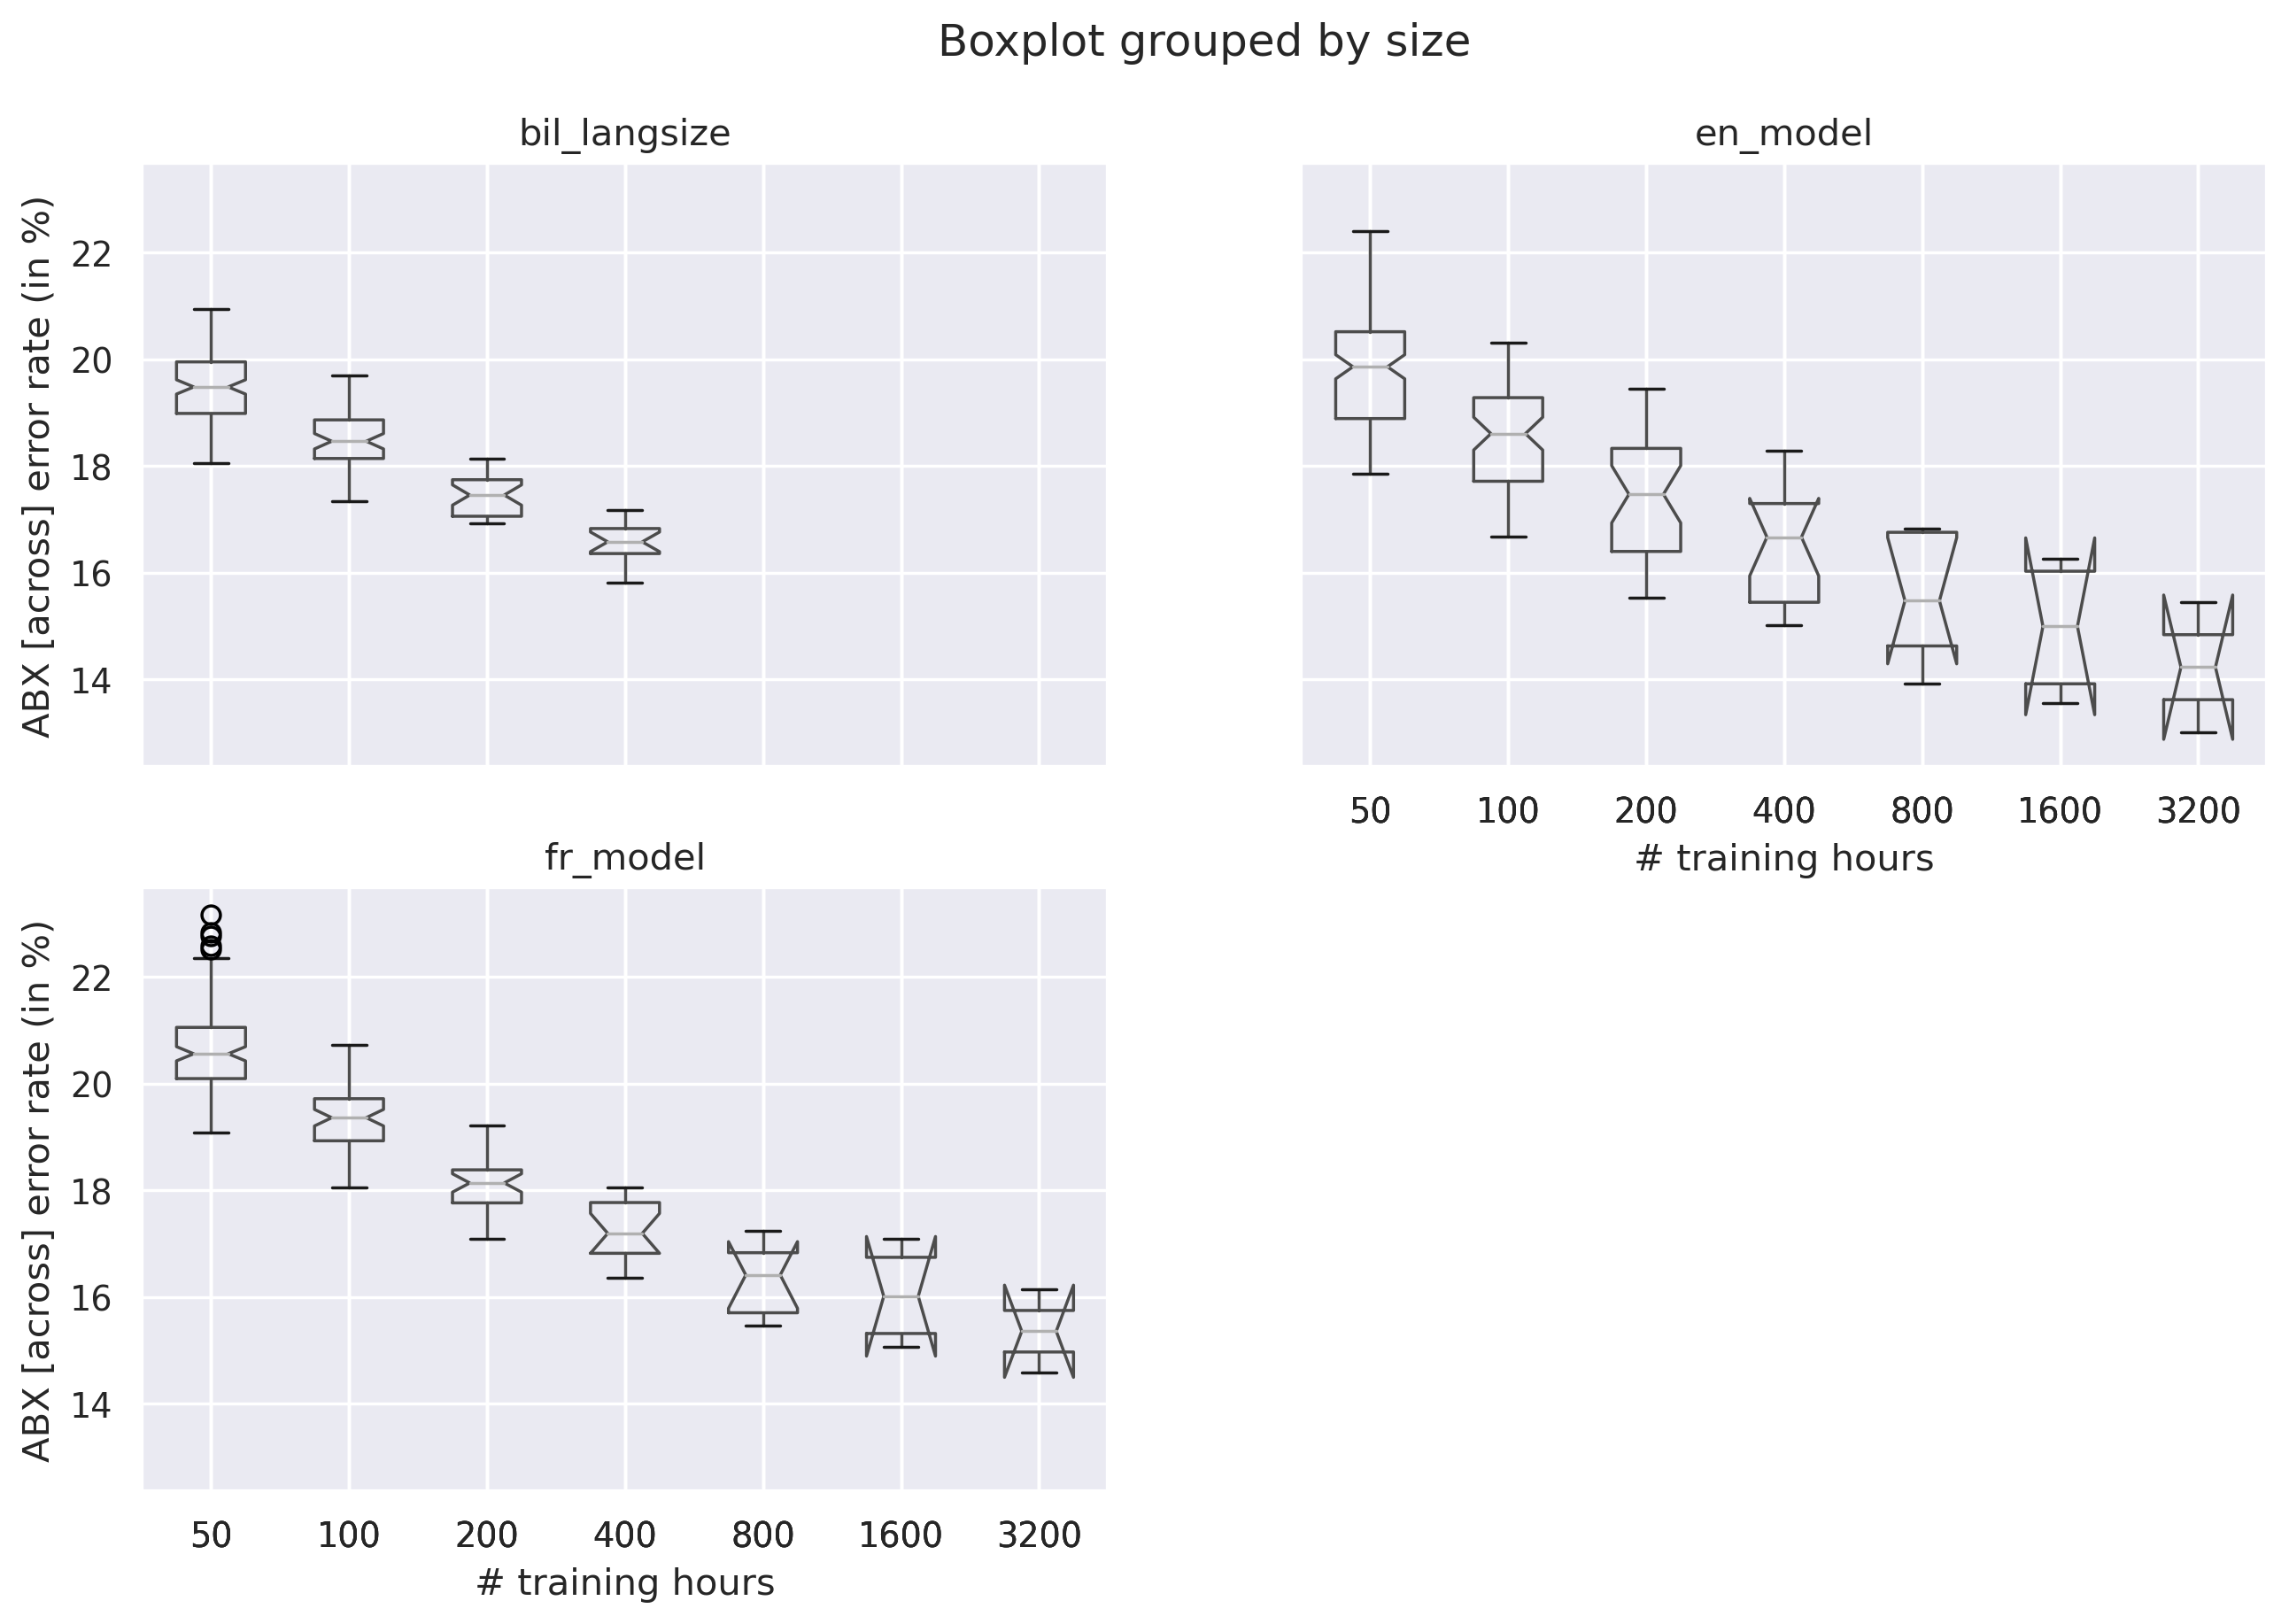

In [5]:
#boxplot = df_across[['size','en_model', 'fr_model',  'eval_lang']].boxplot(notch=True,by='size', return_type='axes')
boxplot = df_across[['size','en_model','bil_langsize', 'fr_model',  'eval_lang']].boxplot(notch=True,by='size', return_type='axes')

for bp in boxplot: 
    bp.set_ylabel('ABX [across] error rate (in %)')
    bp.set_xlabel('# training hours')


Text(0.5, 0, 'test set')

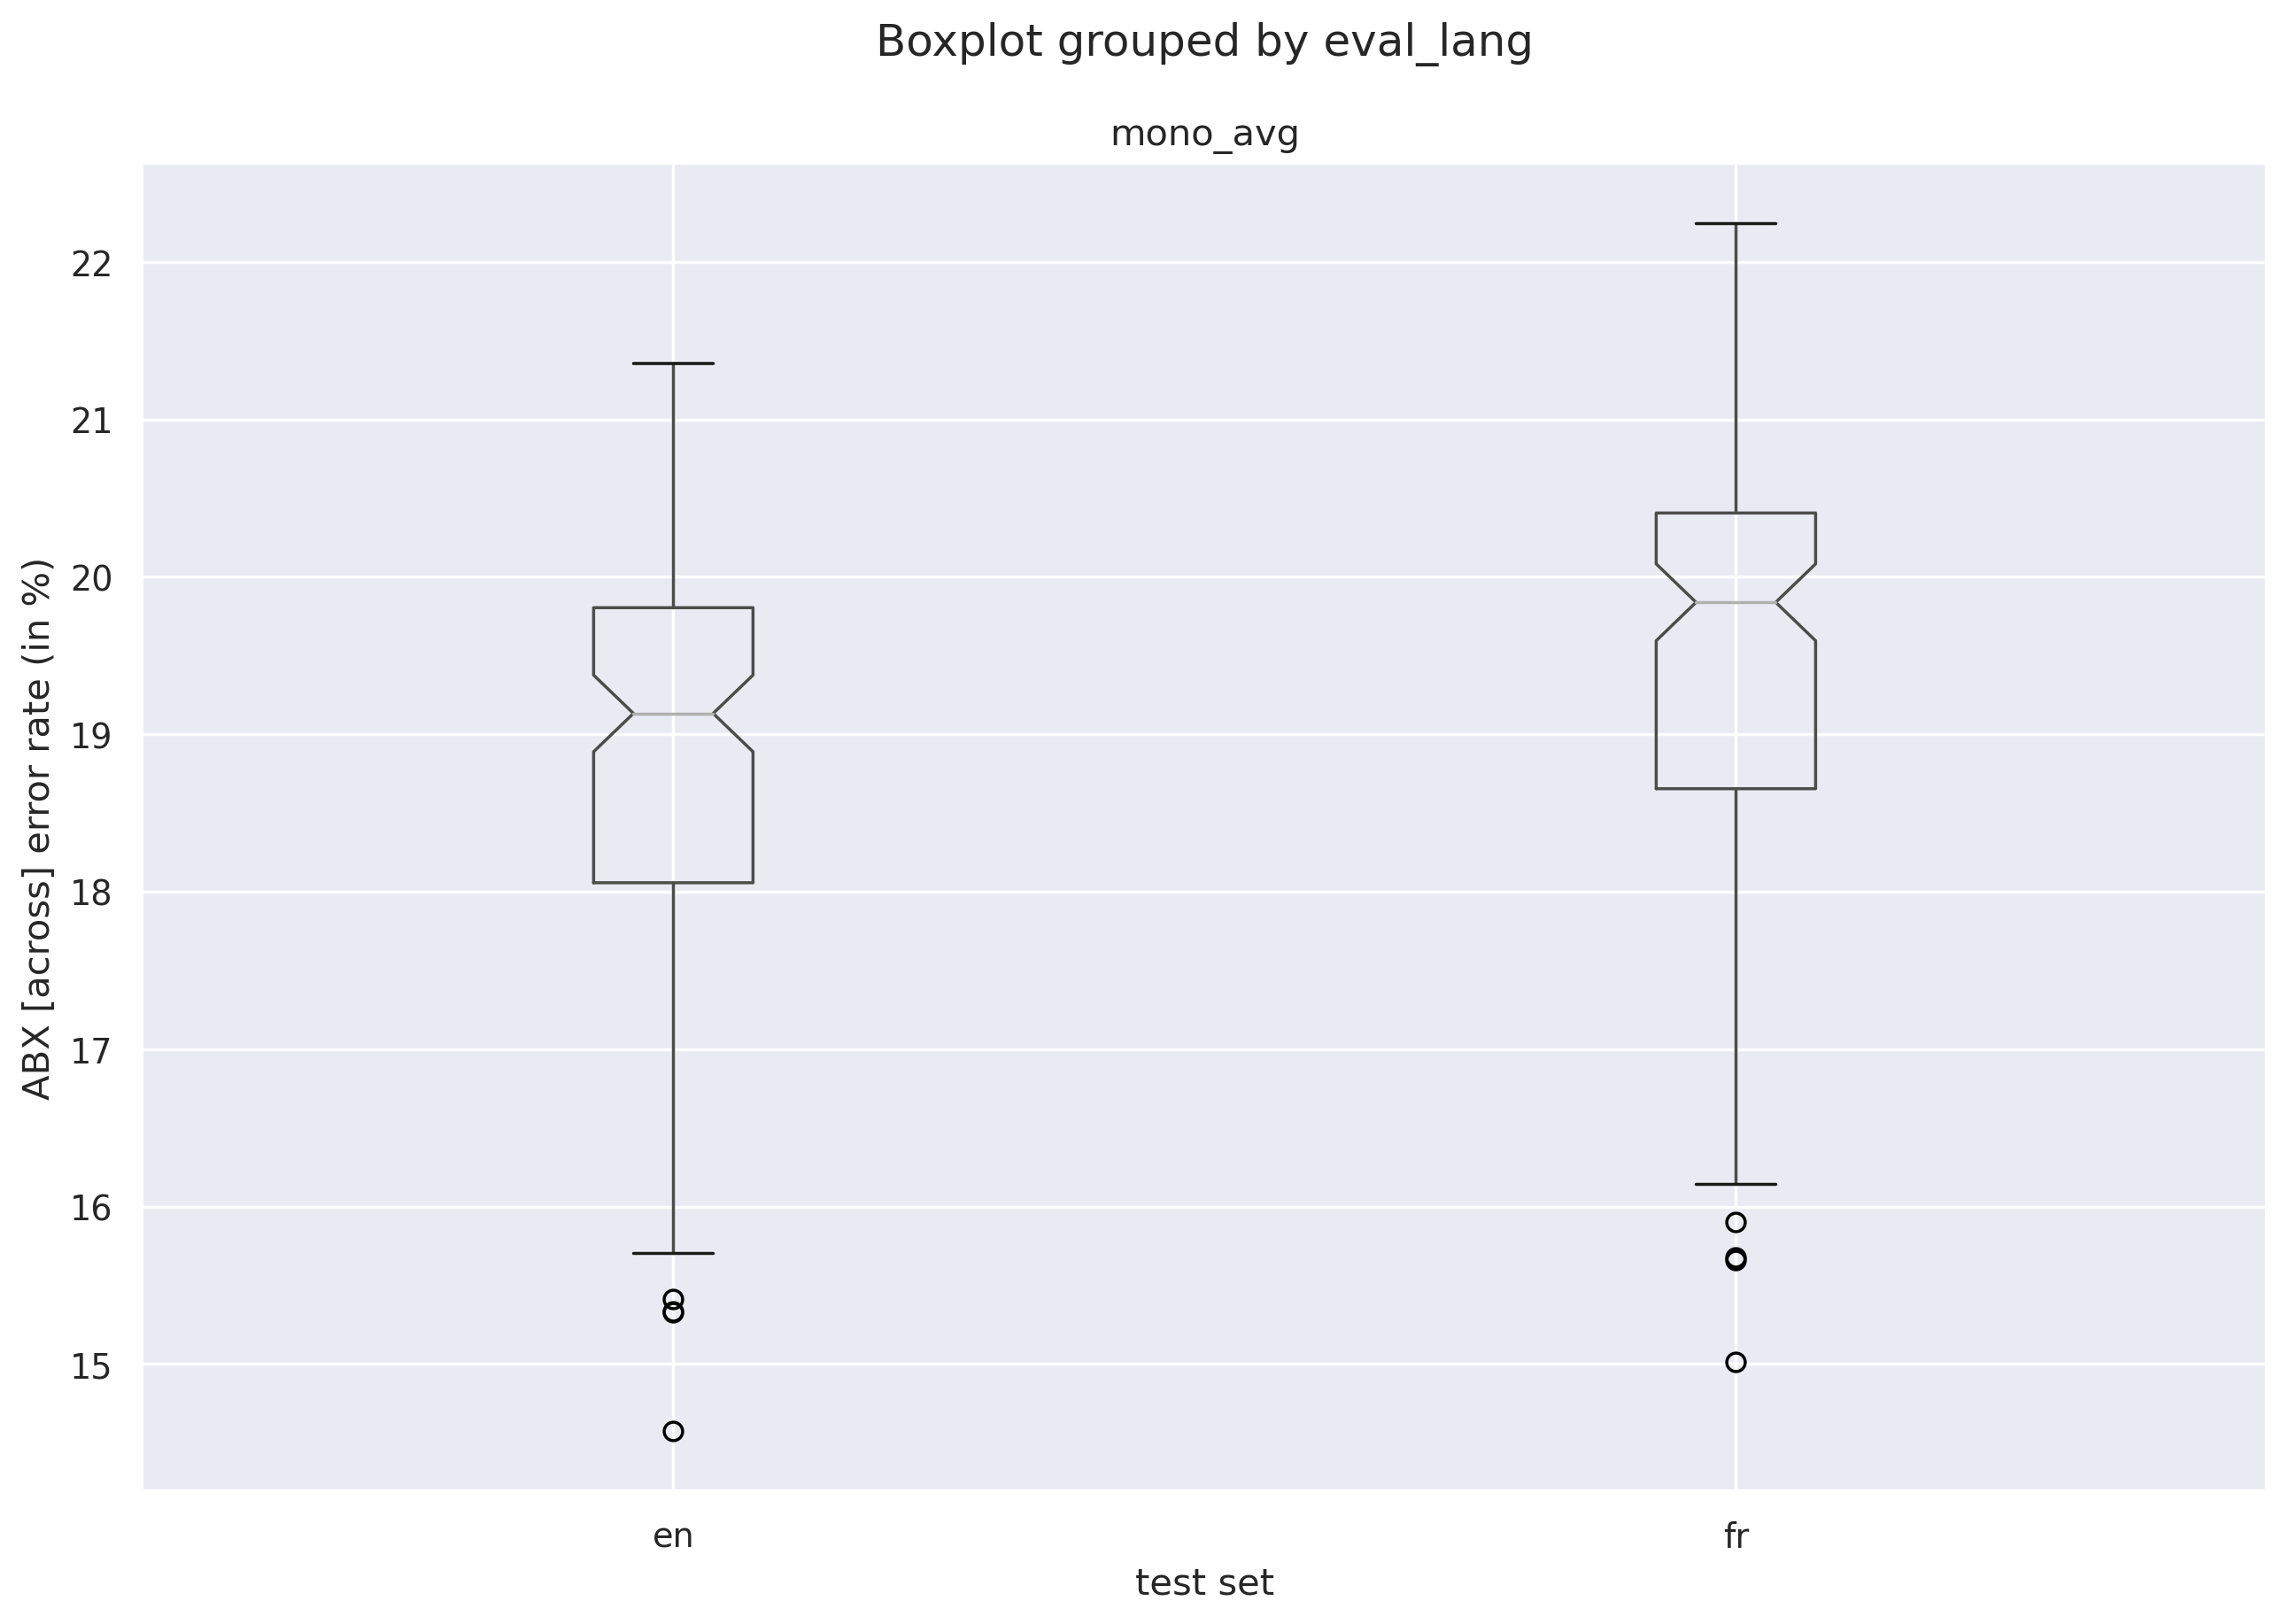

In [6]:
#boxplot = df_across[['size','en_model', 'fr_model',  'eval_lang']].boxplot(notch=True,by='size', return_type='axes')
boxplot = df_across[['mono_avg',  'eval_lang']].boxplot(by="eval_lang",notch=True, return_type='axes')

plt.ylabel('ABX [across] error rate (in %)')
plt.xlabel('test set')


### A2 - ABX within speakers  - original
- Test set : average of French and English
- Df : Original

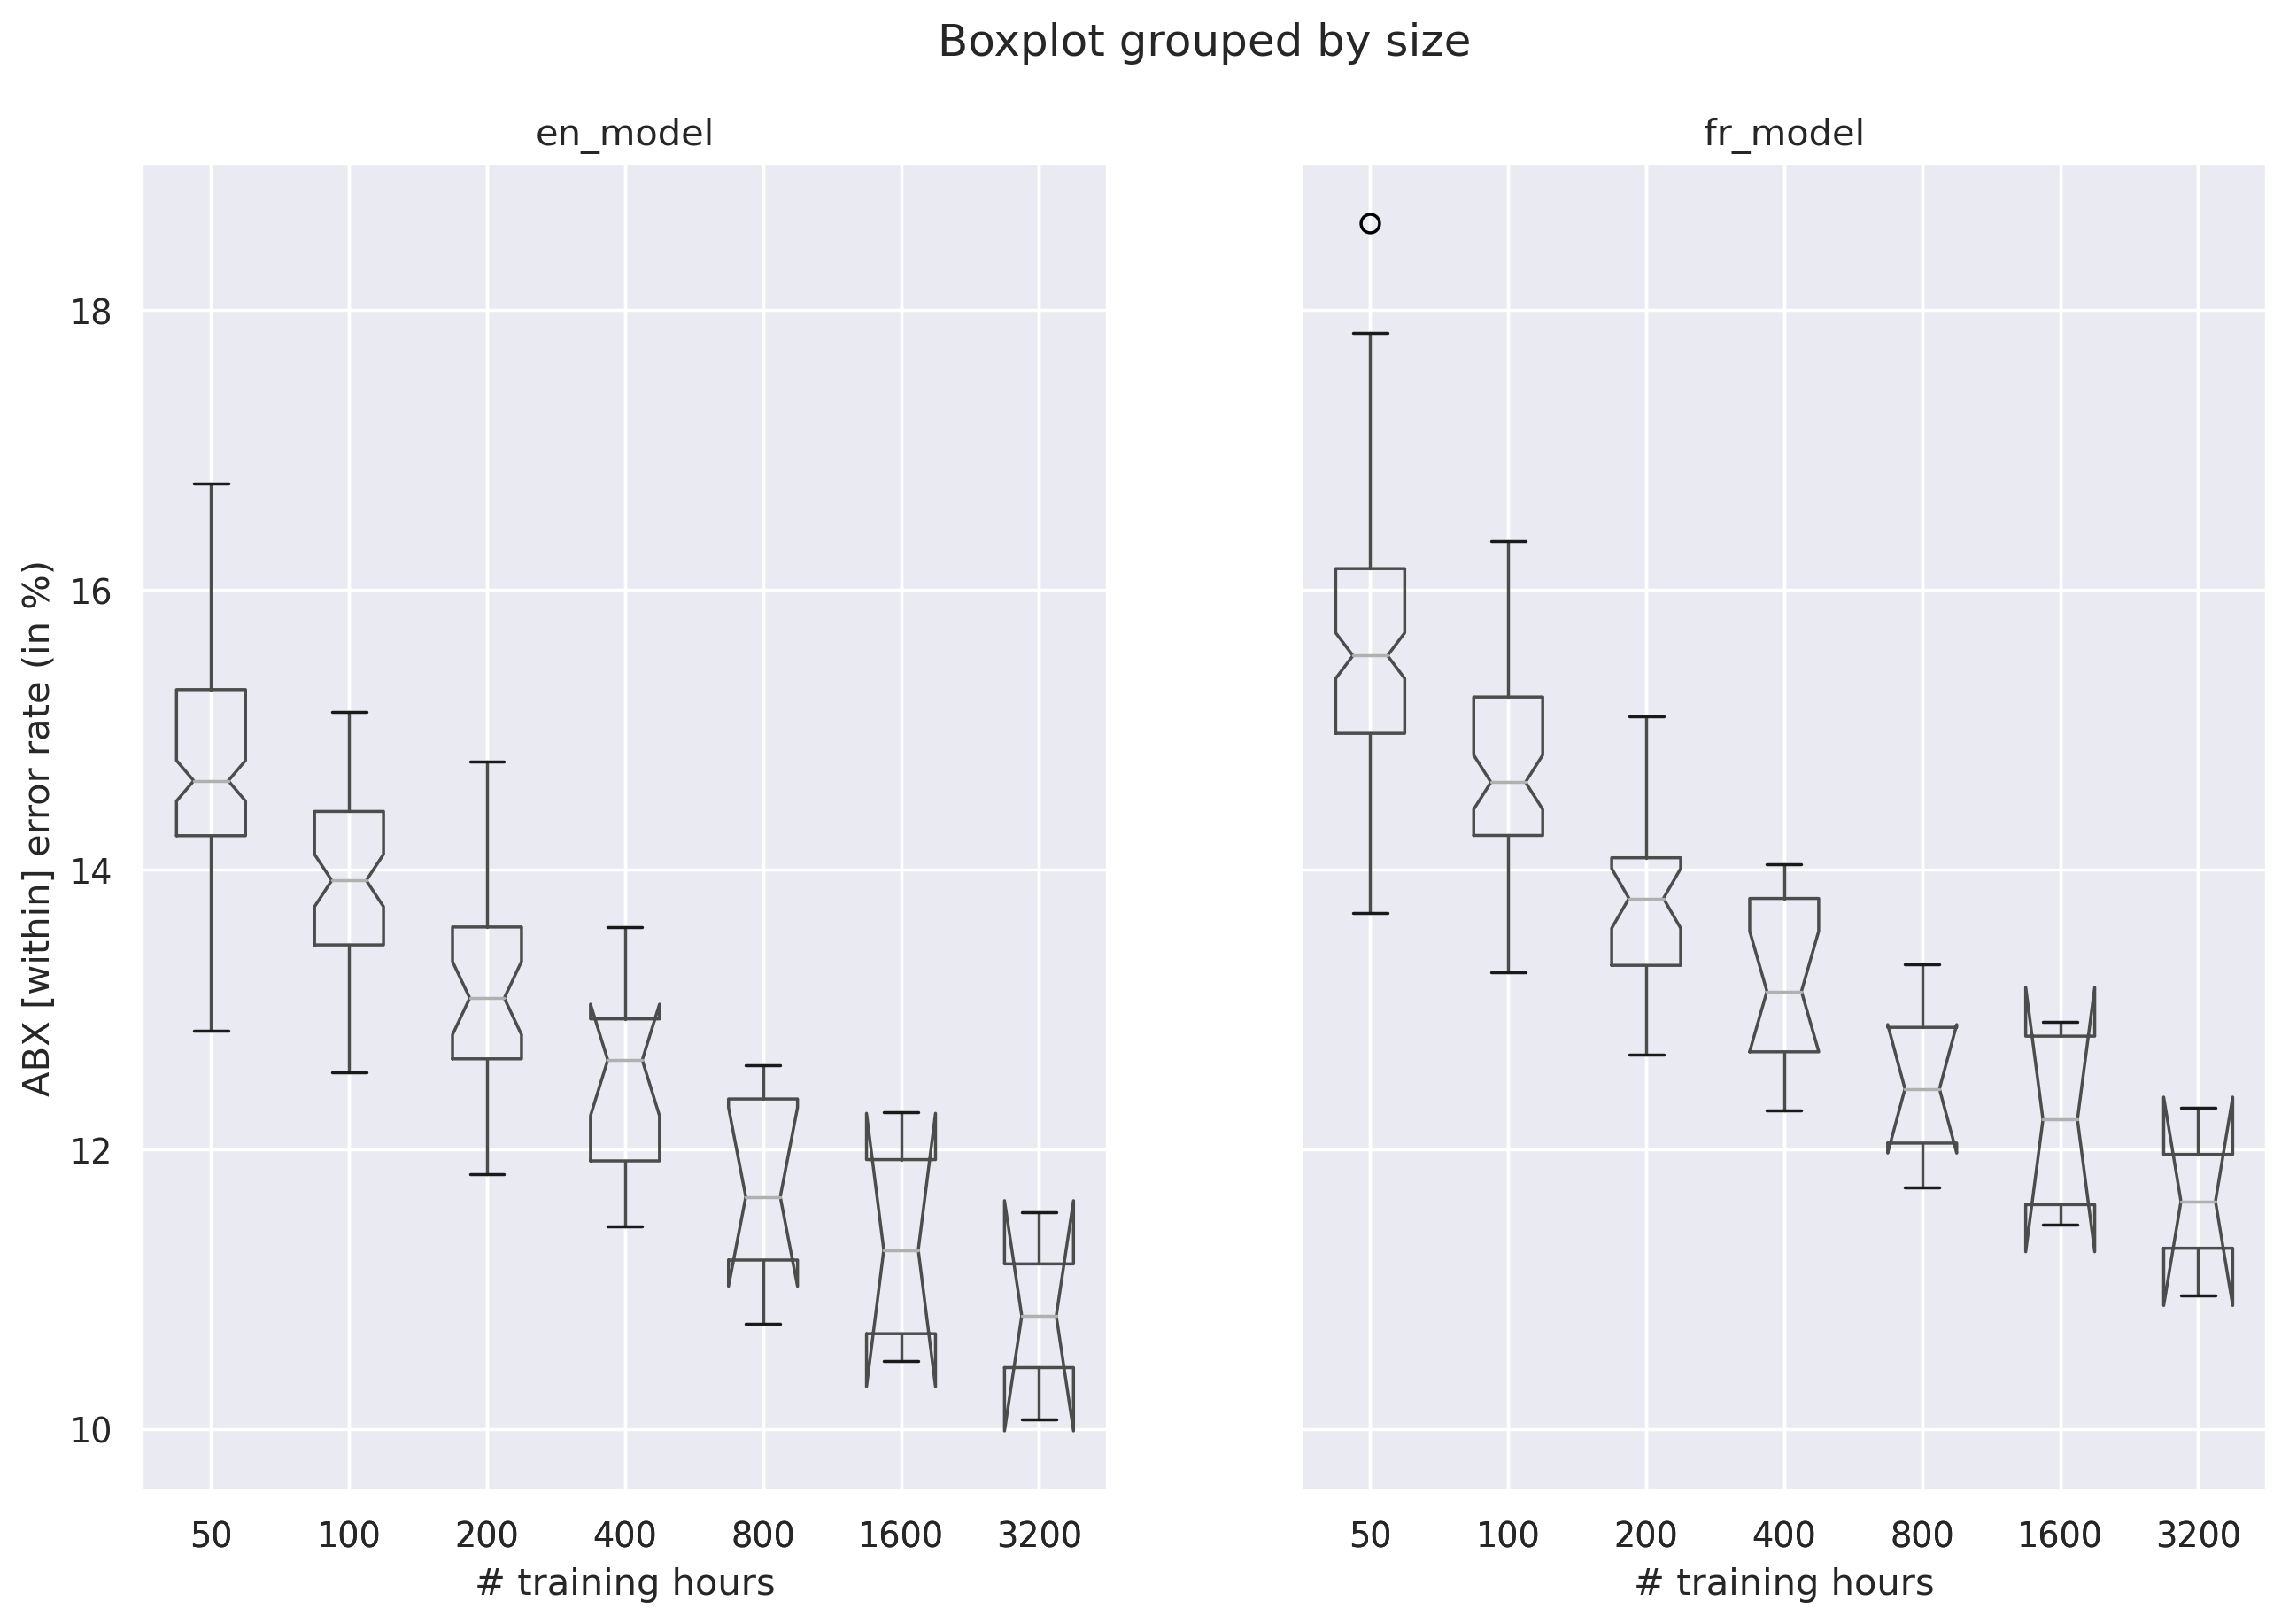

In [7]:
boxplot = df_within[['size','en_model', 'fr_model',  'eval_lang']].boxplot(notch=True,by='size', return_type='axes')
#boxplot = df_across[['size','en_model','bil_langsize', 'fr_model',  'eval_lang']].boxplot(notch=True,by='size', return_type='axes')

for bp in boxplot: 
    bp.set_ylabel('ABX [within] error rate (in %)')
    bp.set_xlabel('# training hours')


Text(0.5, 0, 'test set')

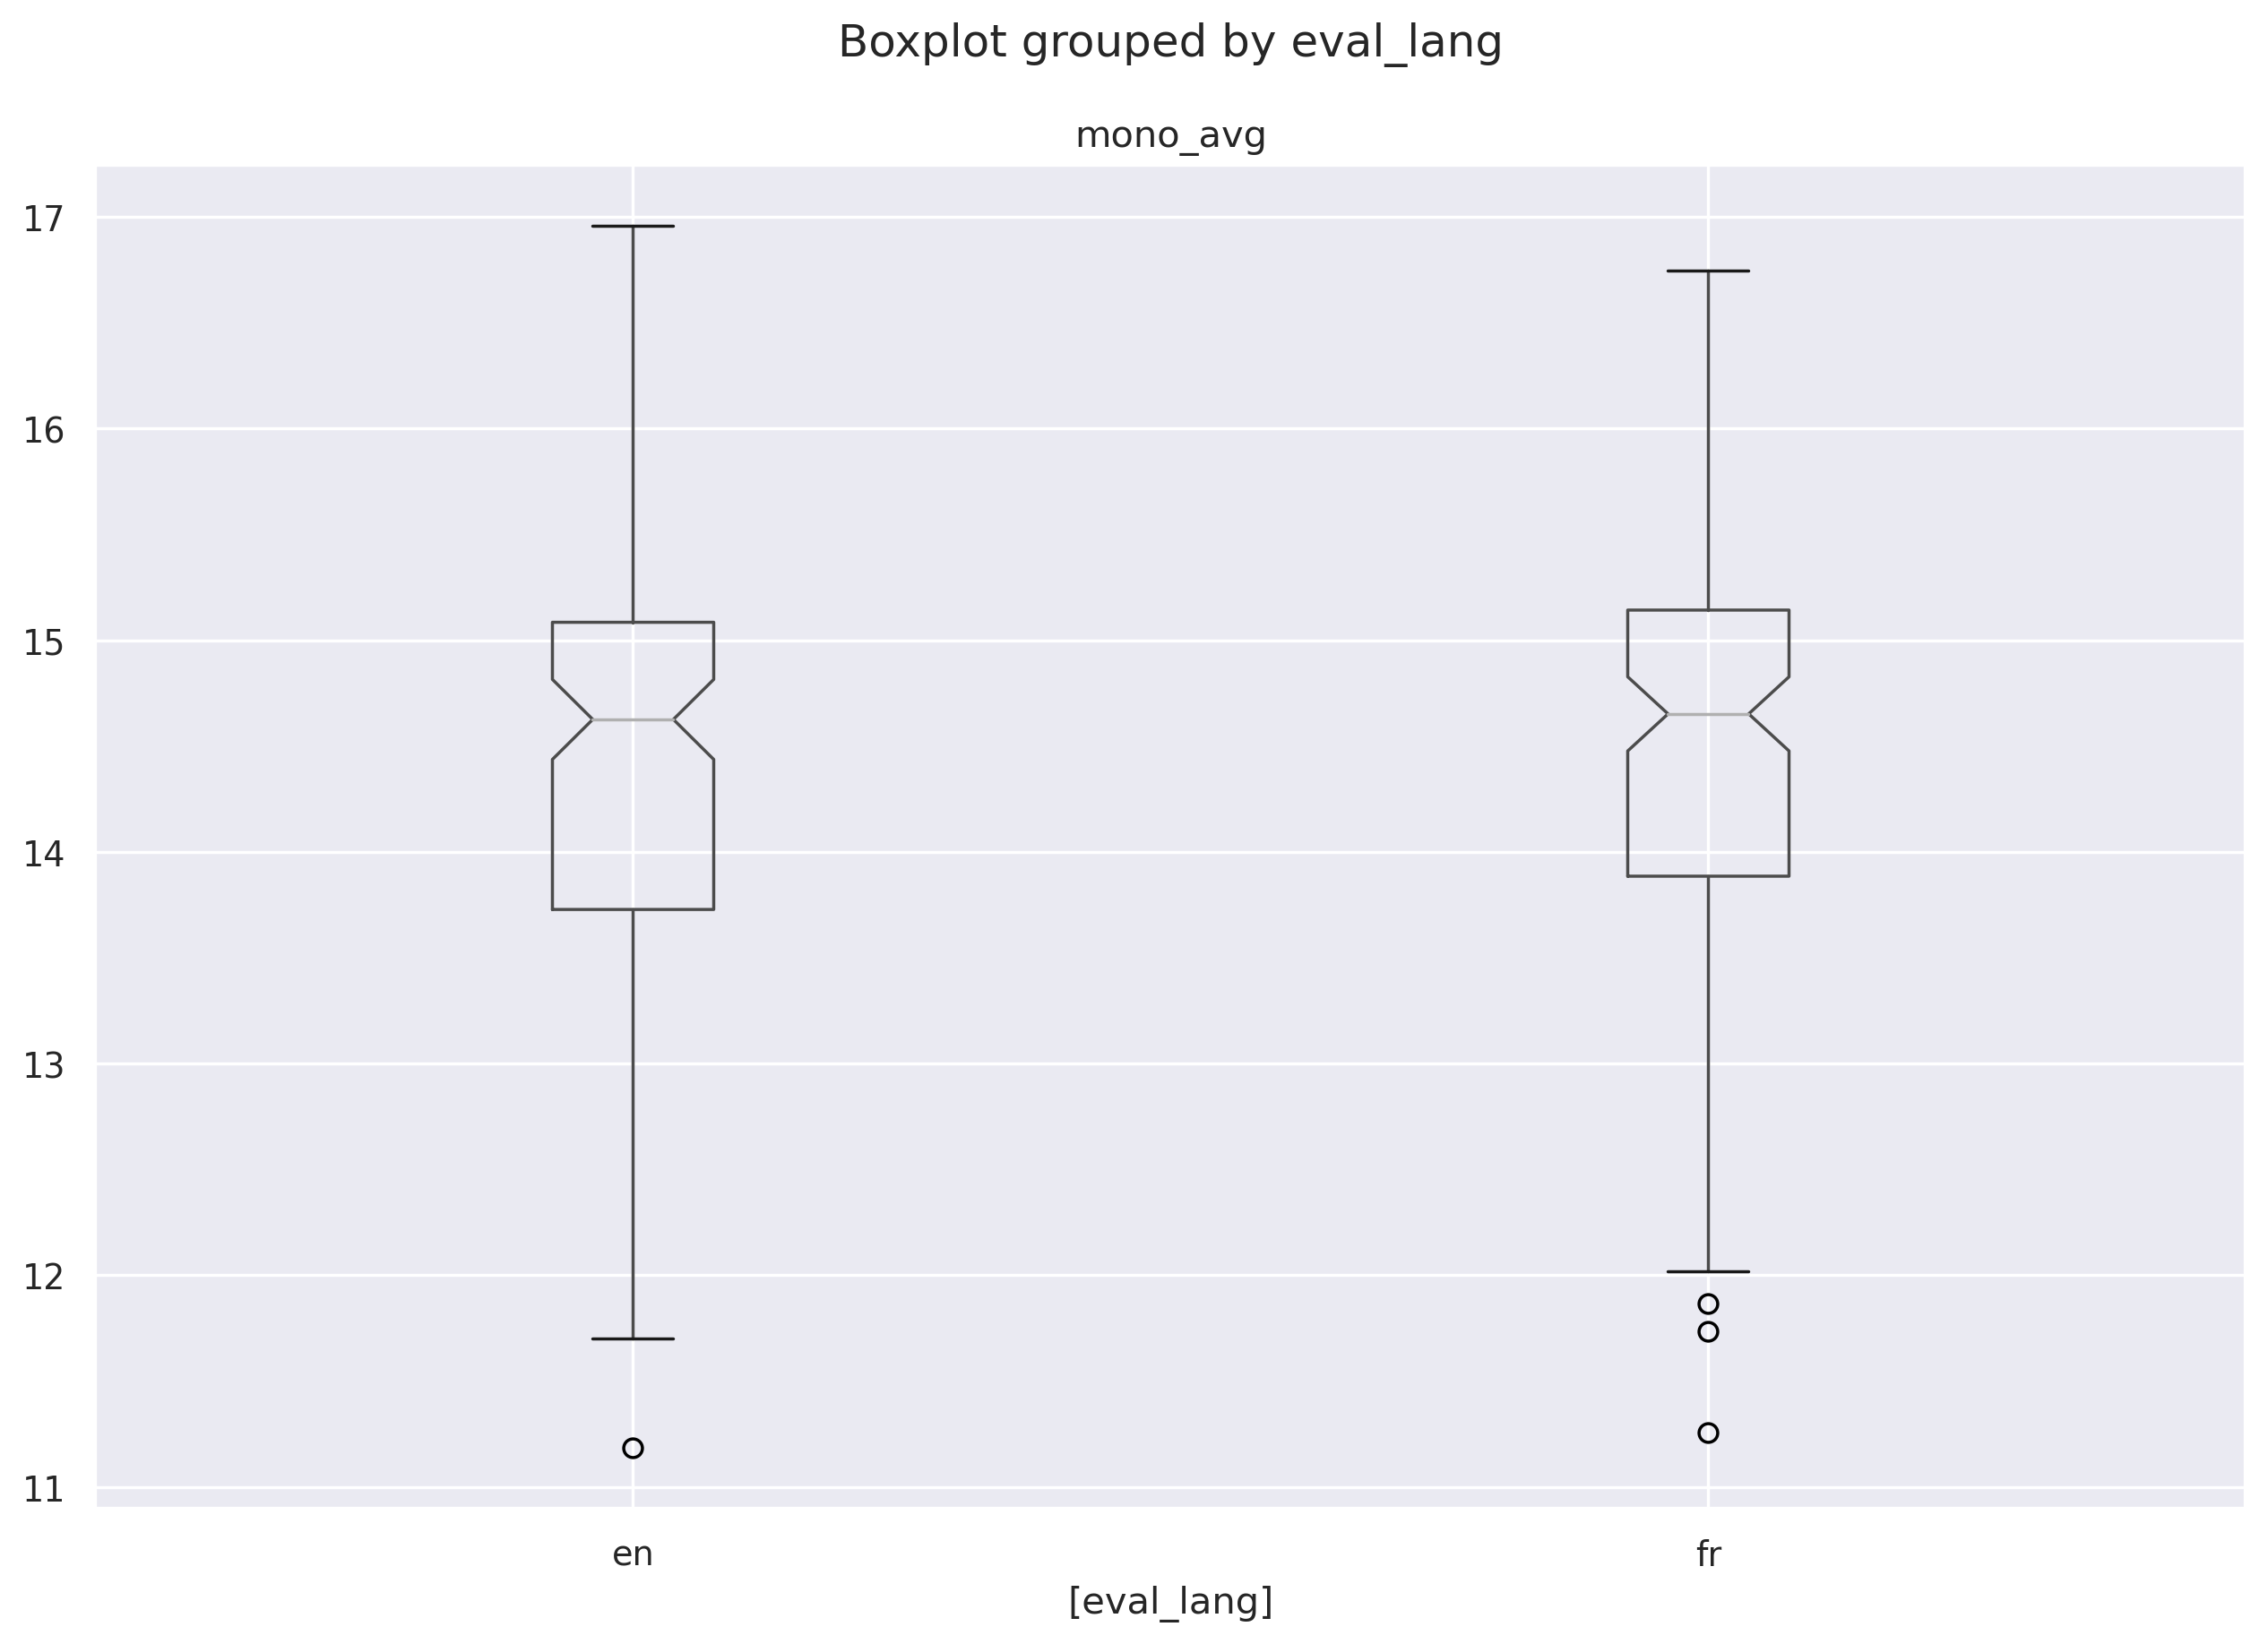

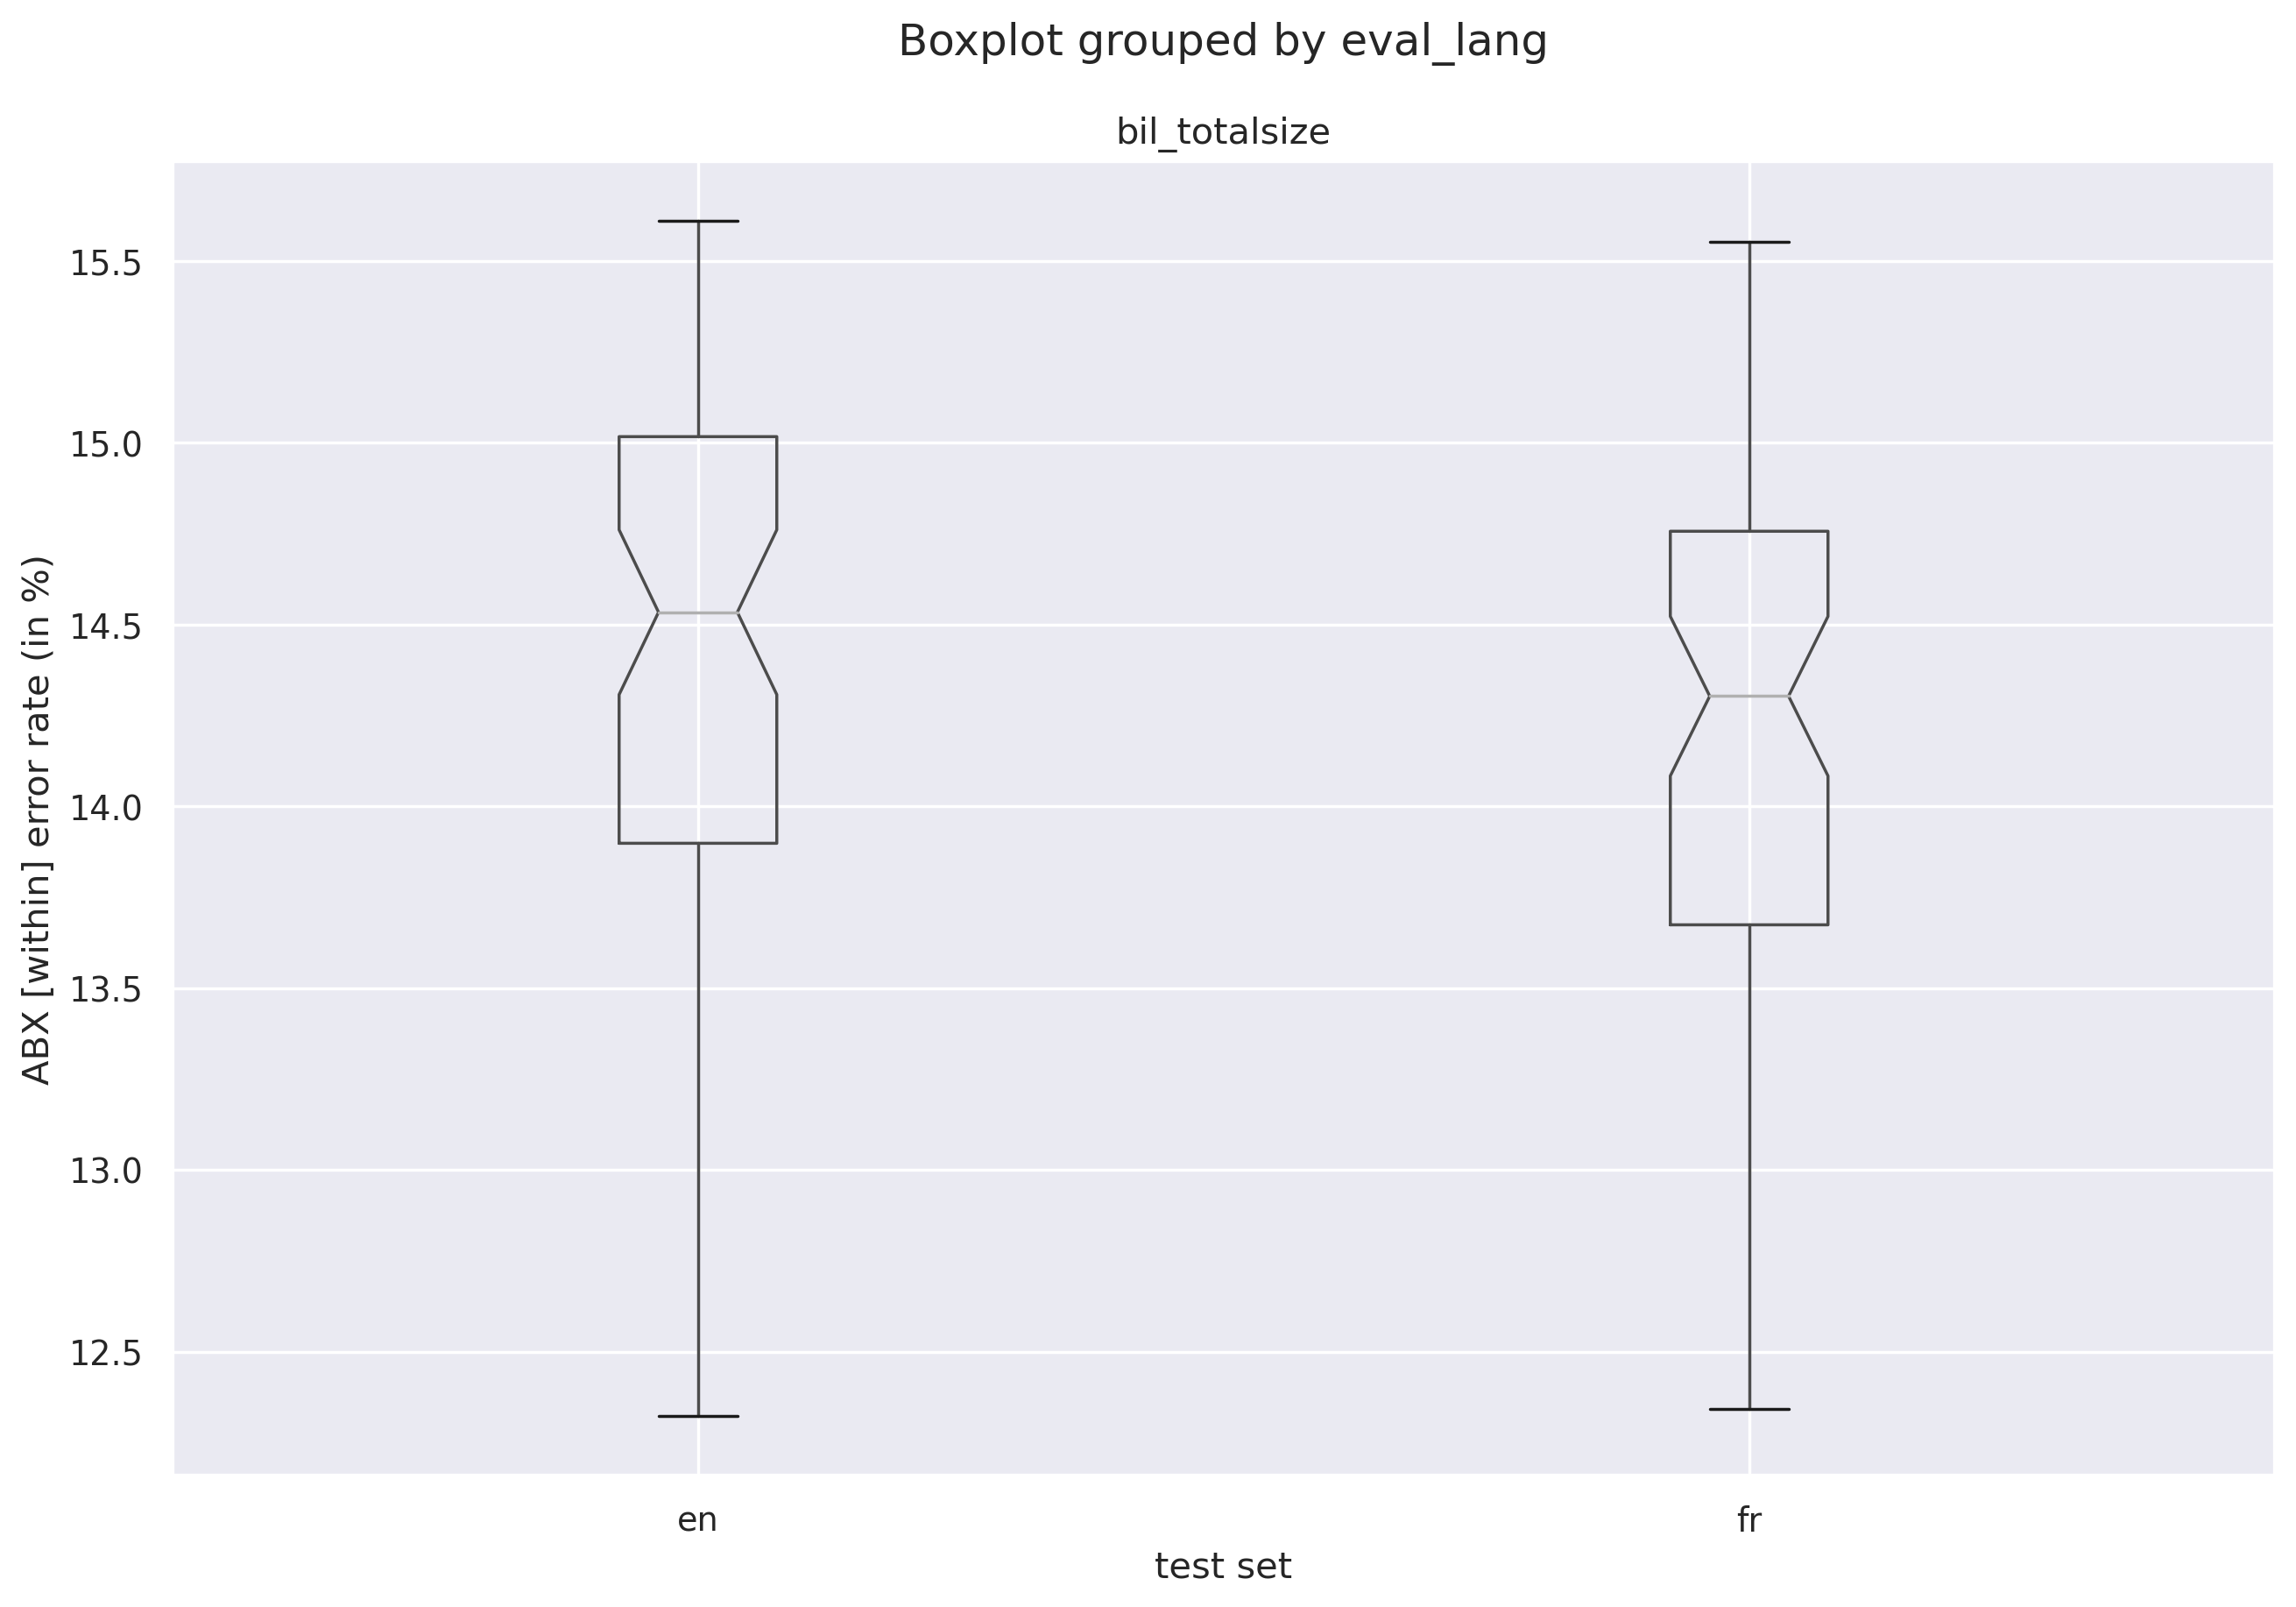

In [8]:
#boxplot = df_across[['size','en_model', 'fr_model',  'eval_lang']].boxplot(notch=True,by='size', return_type='axes')
boxplot = df_within[['mono_avg',  'eval_lang']].boxplot(by="eval_lang",notch=True, return_type='axes')

boxplot = df_within[['bil_totalsize',  'eval_lang']].boxplot(by="eval_lang",notch=True, return_type='axes')

plt.ylabel('ABX [within] error rate (in %)')
plt.xlabel('test set')


## C. Comparing Monolingual vs Bilingual ABX scores 



### C1. French vs English vs Bilingual TotalSize (original)
- ABX : within
- Test set : average English + French
These scores are not calculated on the 50h dataset to ensure reliable comparison

Text(0.5, 1.0, 'ABX [within] error rate calculated on the English and French evaluation sets, using the models trained of 100h, 200h, 400h and 800h')

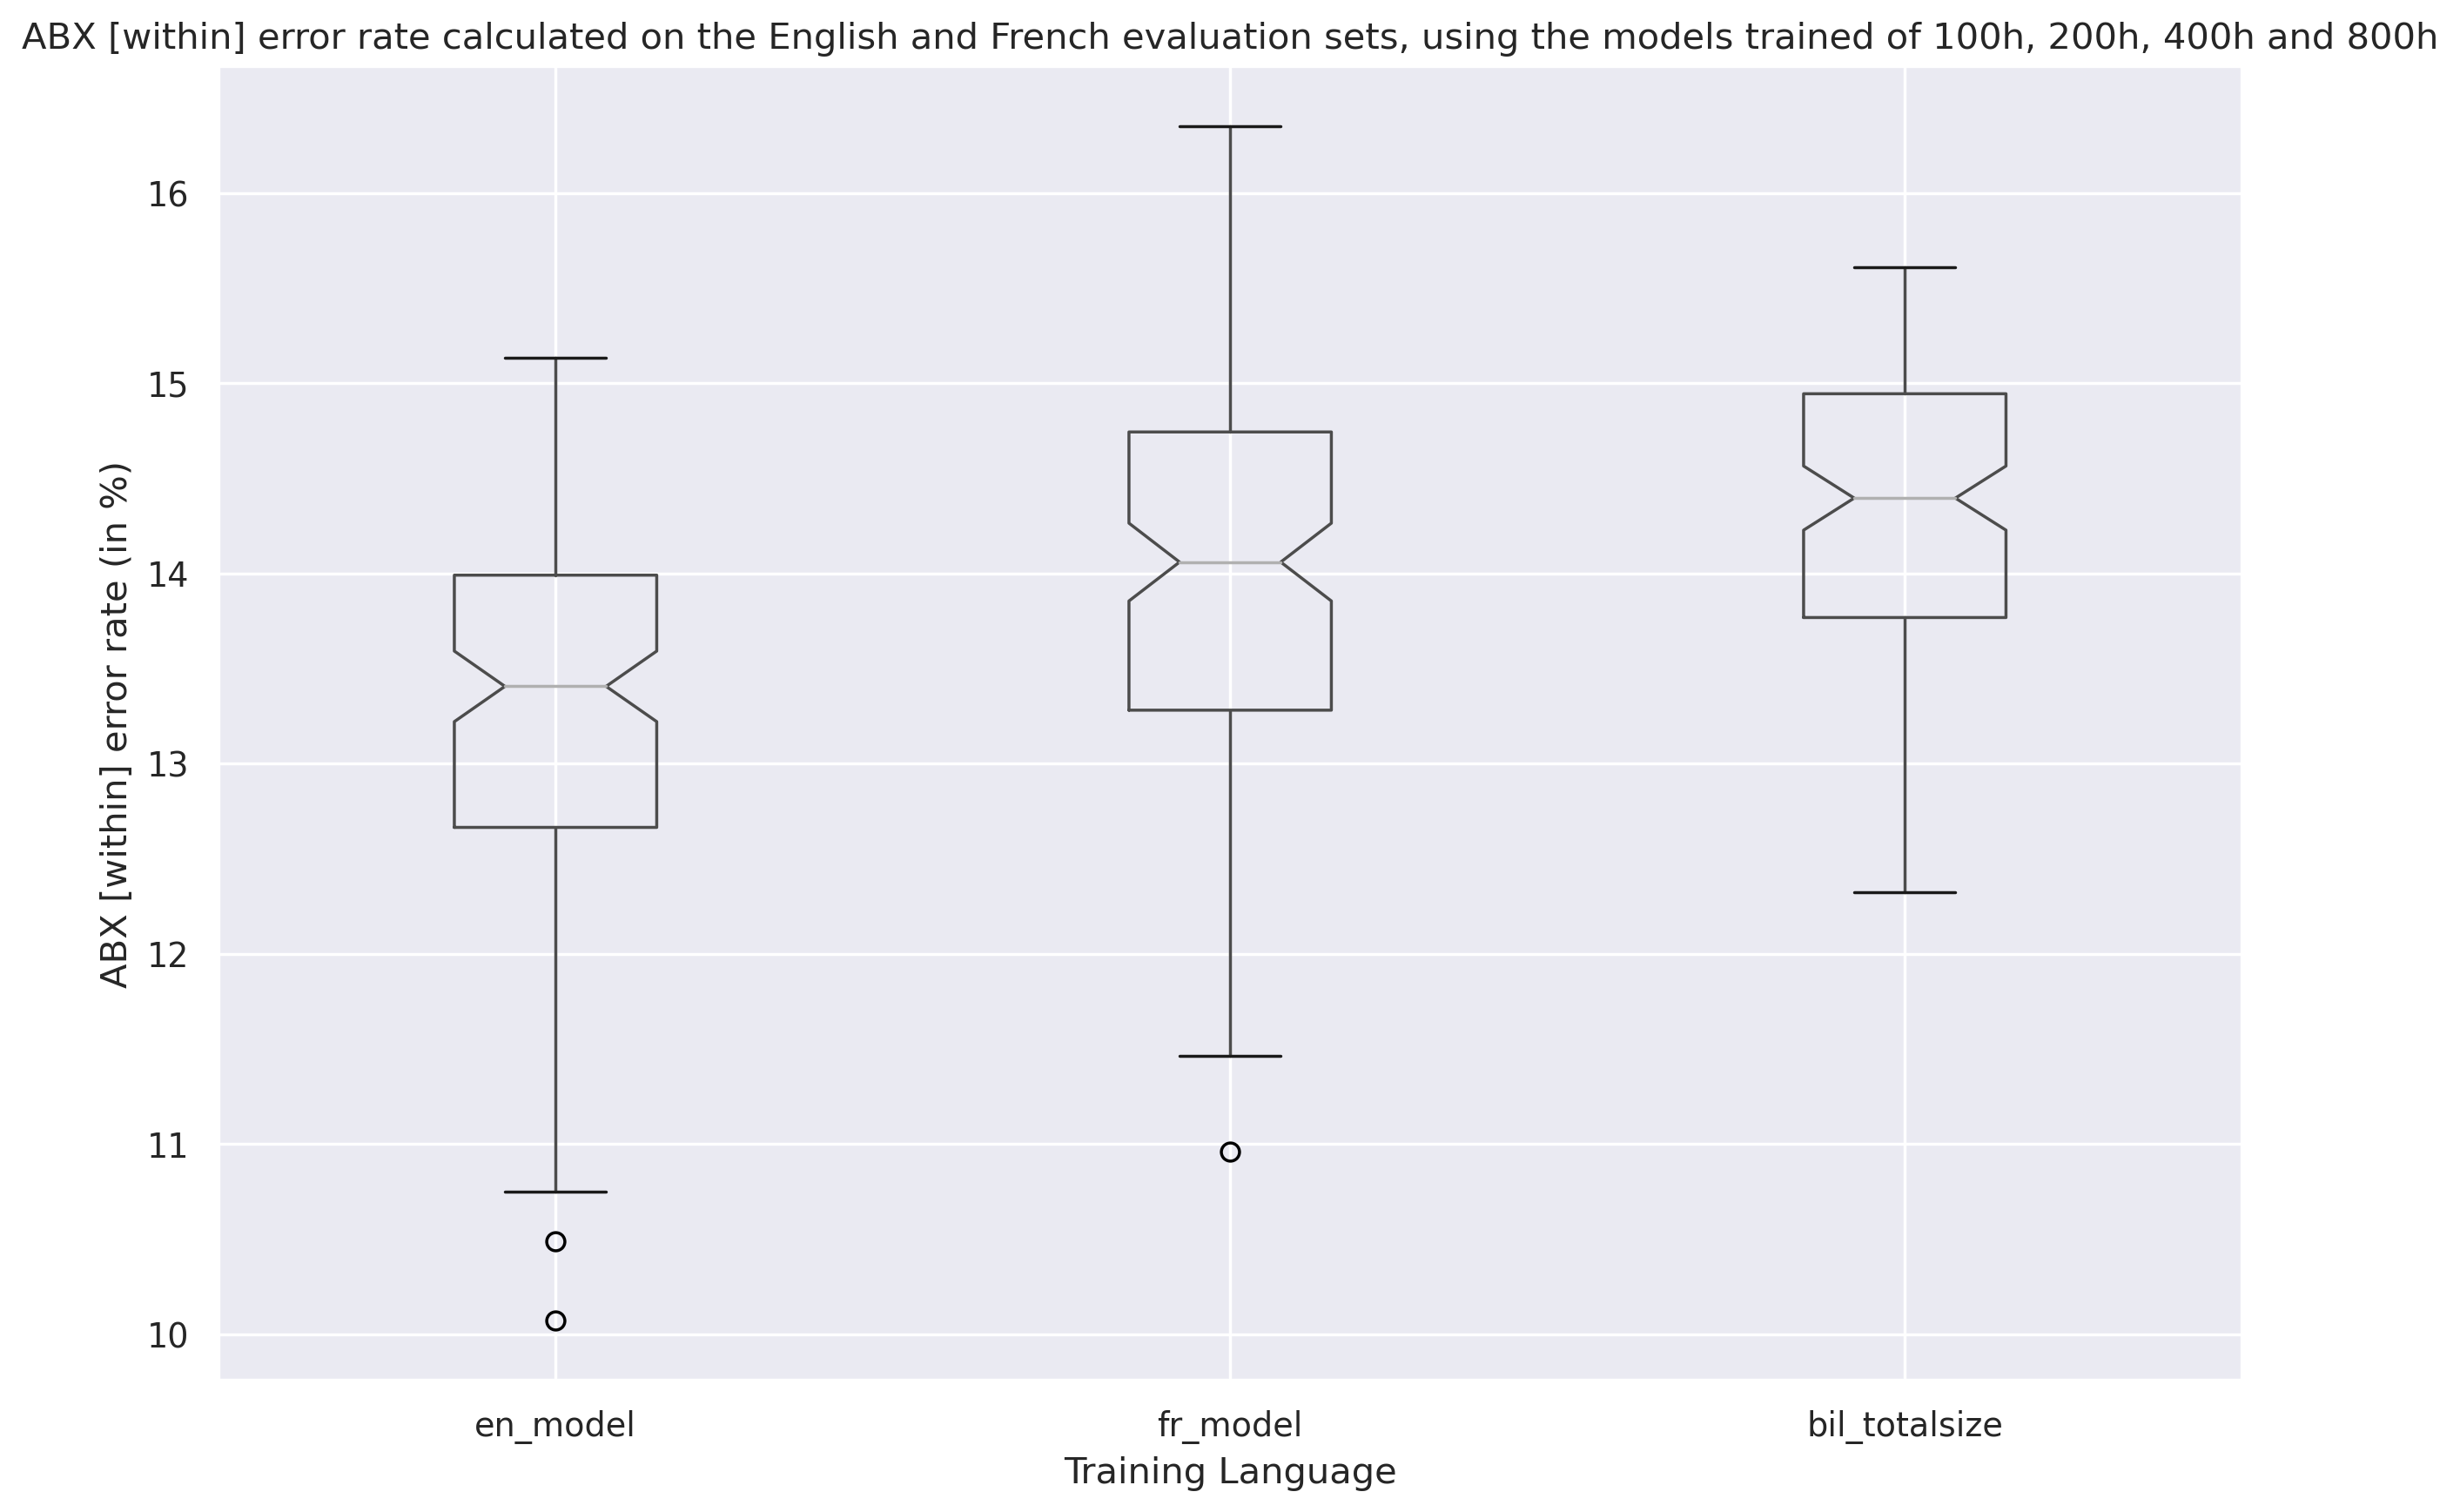

In [9]:
boxplot = df_within[['en_model', 'fr_model', 'bil_totalsize','eval_lang']][df_within["size"] > 50].boxplot(notch=True, return_type='axes')

plt.ylabel('ABX [within] error rate (in %)')
plt.xlabel('Training Language')
plt.title('ABX [within] error rate calculated on the English and French evaluation sets, using the models trained of 100h, 200h, 400h and 800h')



Text(0.5, 1.0, 'ABX [within] error rate calculated on the same and different evaluation sets, using the models trained of 100h, 200h, 400h, 800h, 1600h and 3200h')

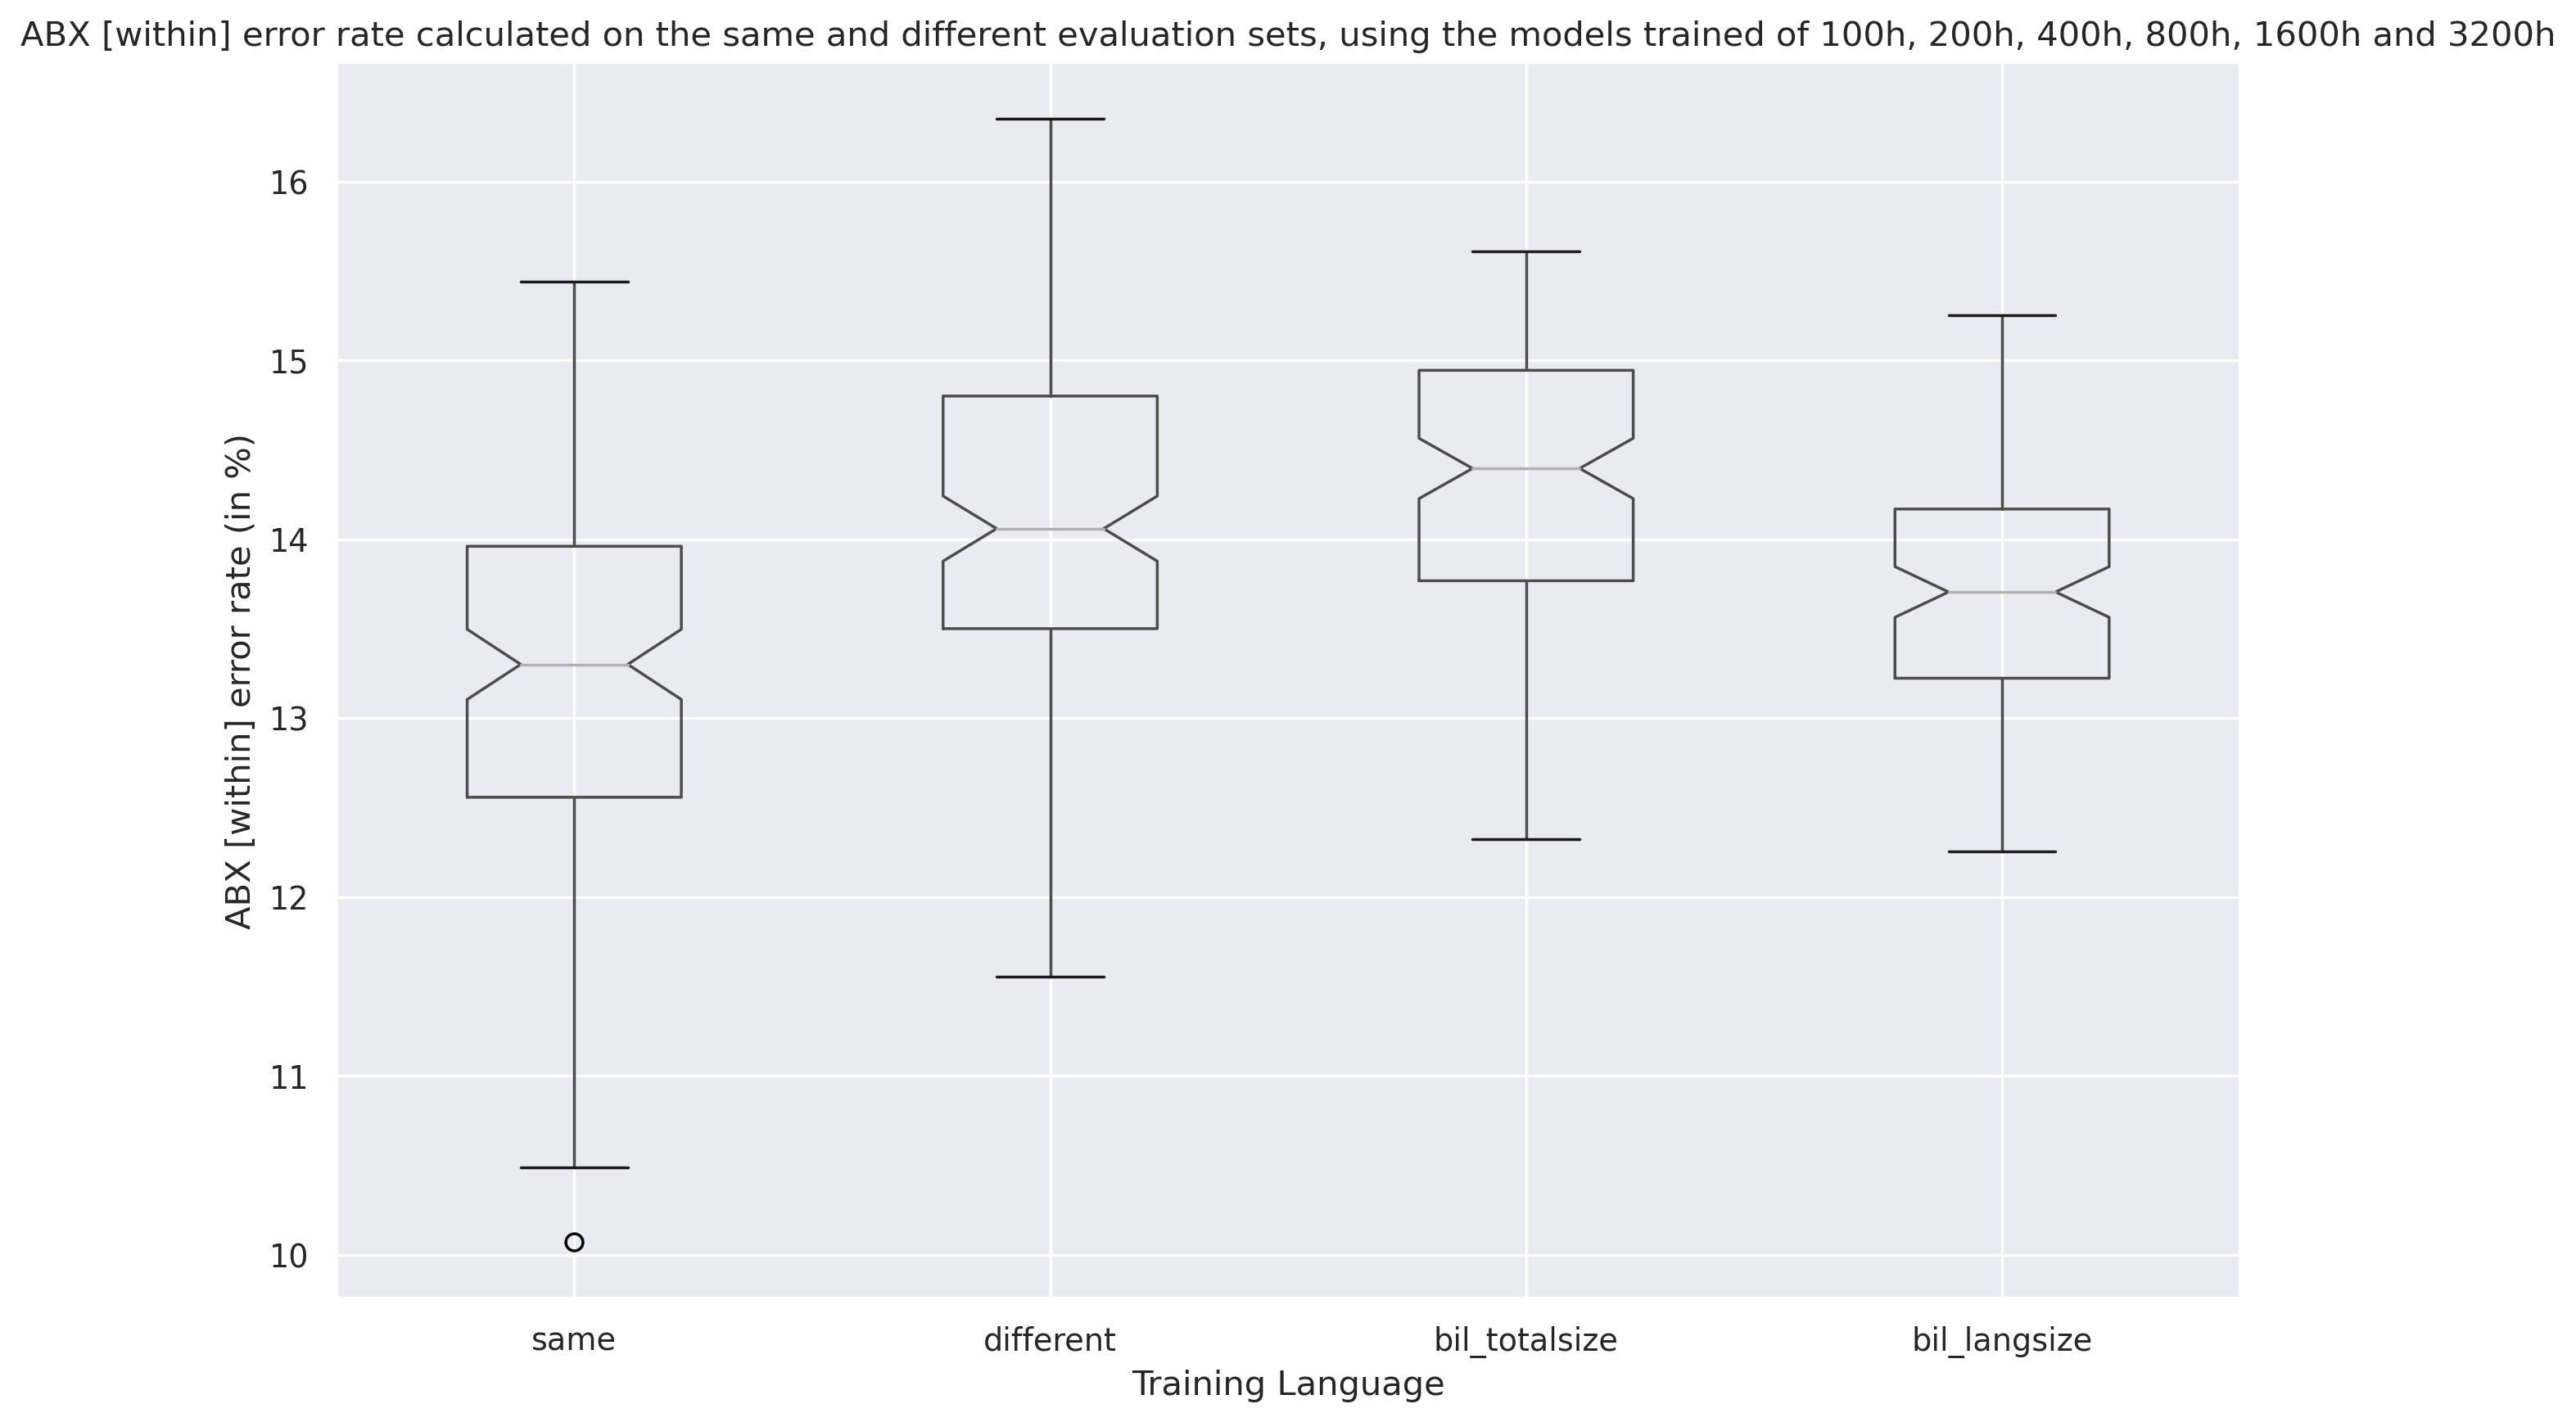

In [10]:
boxplot = df_within[['same', 'different', 'bil_totalsize','bil_langsize','eval_lang']][df_within["size"] > 50].boxplot(notch=True, return_type='axes')

plt.ylabel('ABX [within] error rate (in %)')
plt.xlabel('Training Language')
plt.title('ABX [within] error rate calculated on the same and different evaluation sets, using the models trained of 100h, 200h, 400h, 800h, 1600h and 3200h')



### C2. Monolingual vs Bilingual TotalSize (original)
- ABX : within
- Test set : average English + French
These scores are not calculated on the 50h dataset to ensure reliable comparison

Text(0.5, 1.0, 'ABX [within] error rate calculated on the English and French evaluation sets, using the models trained of 50h, 100h, 200h, 400h and 800h')

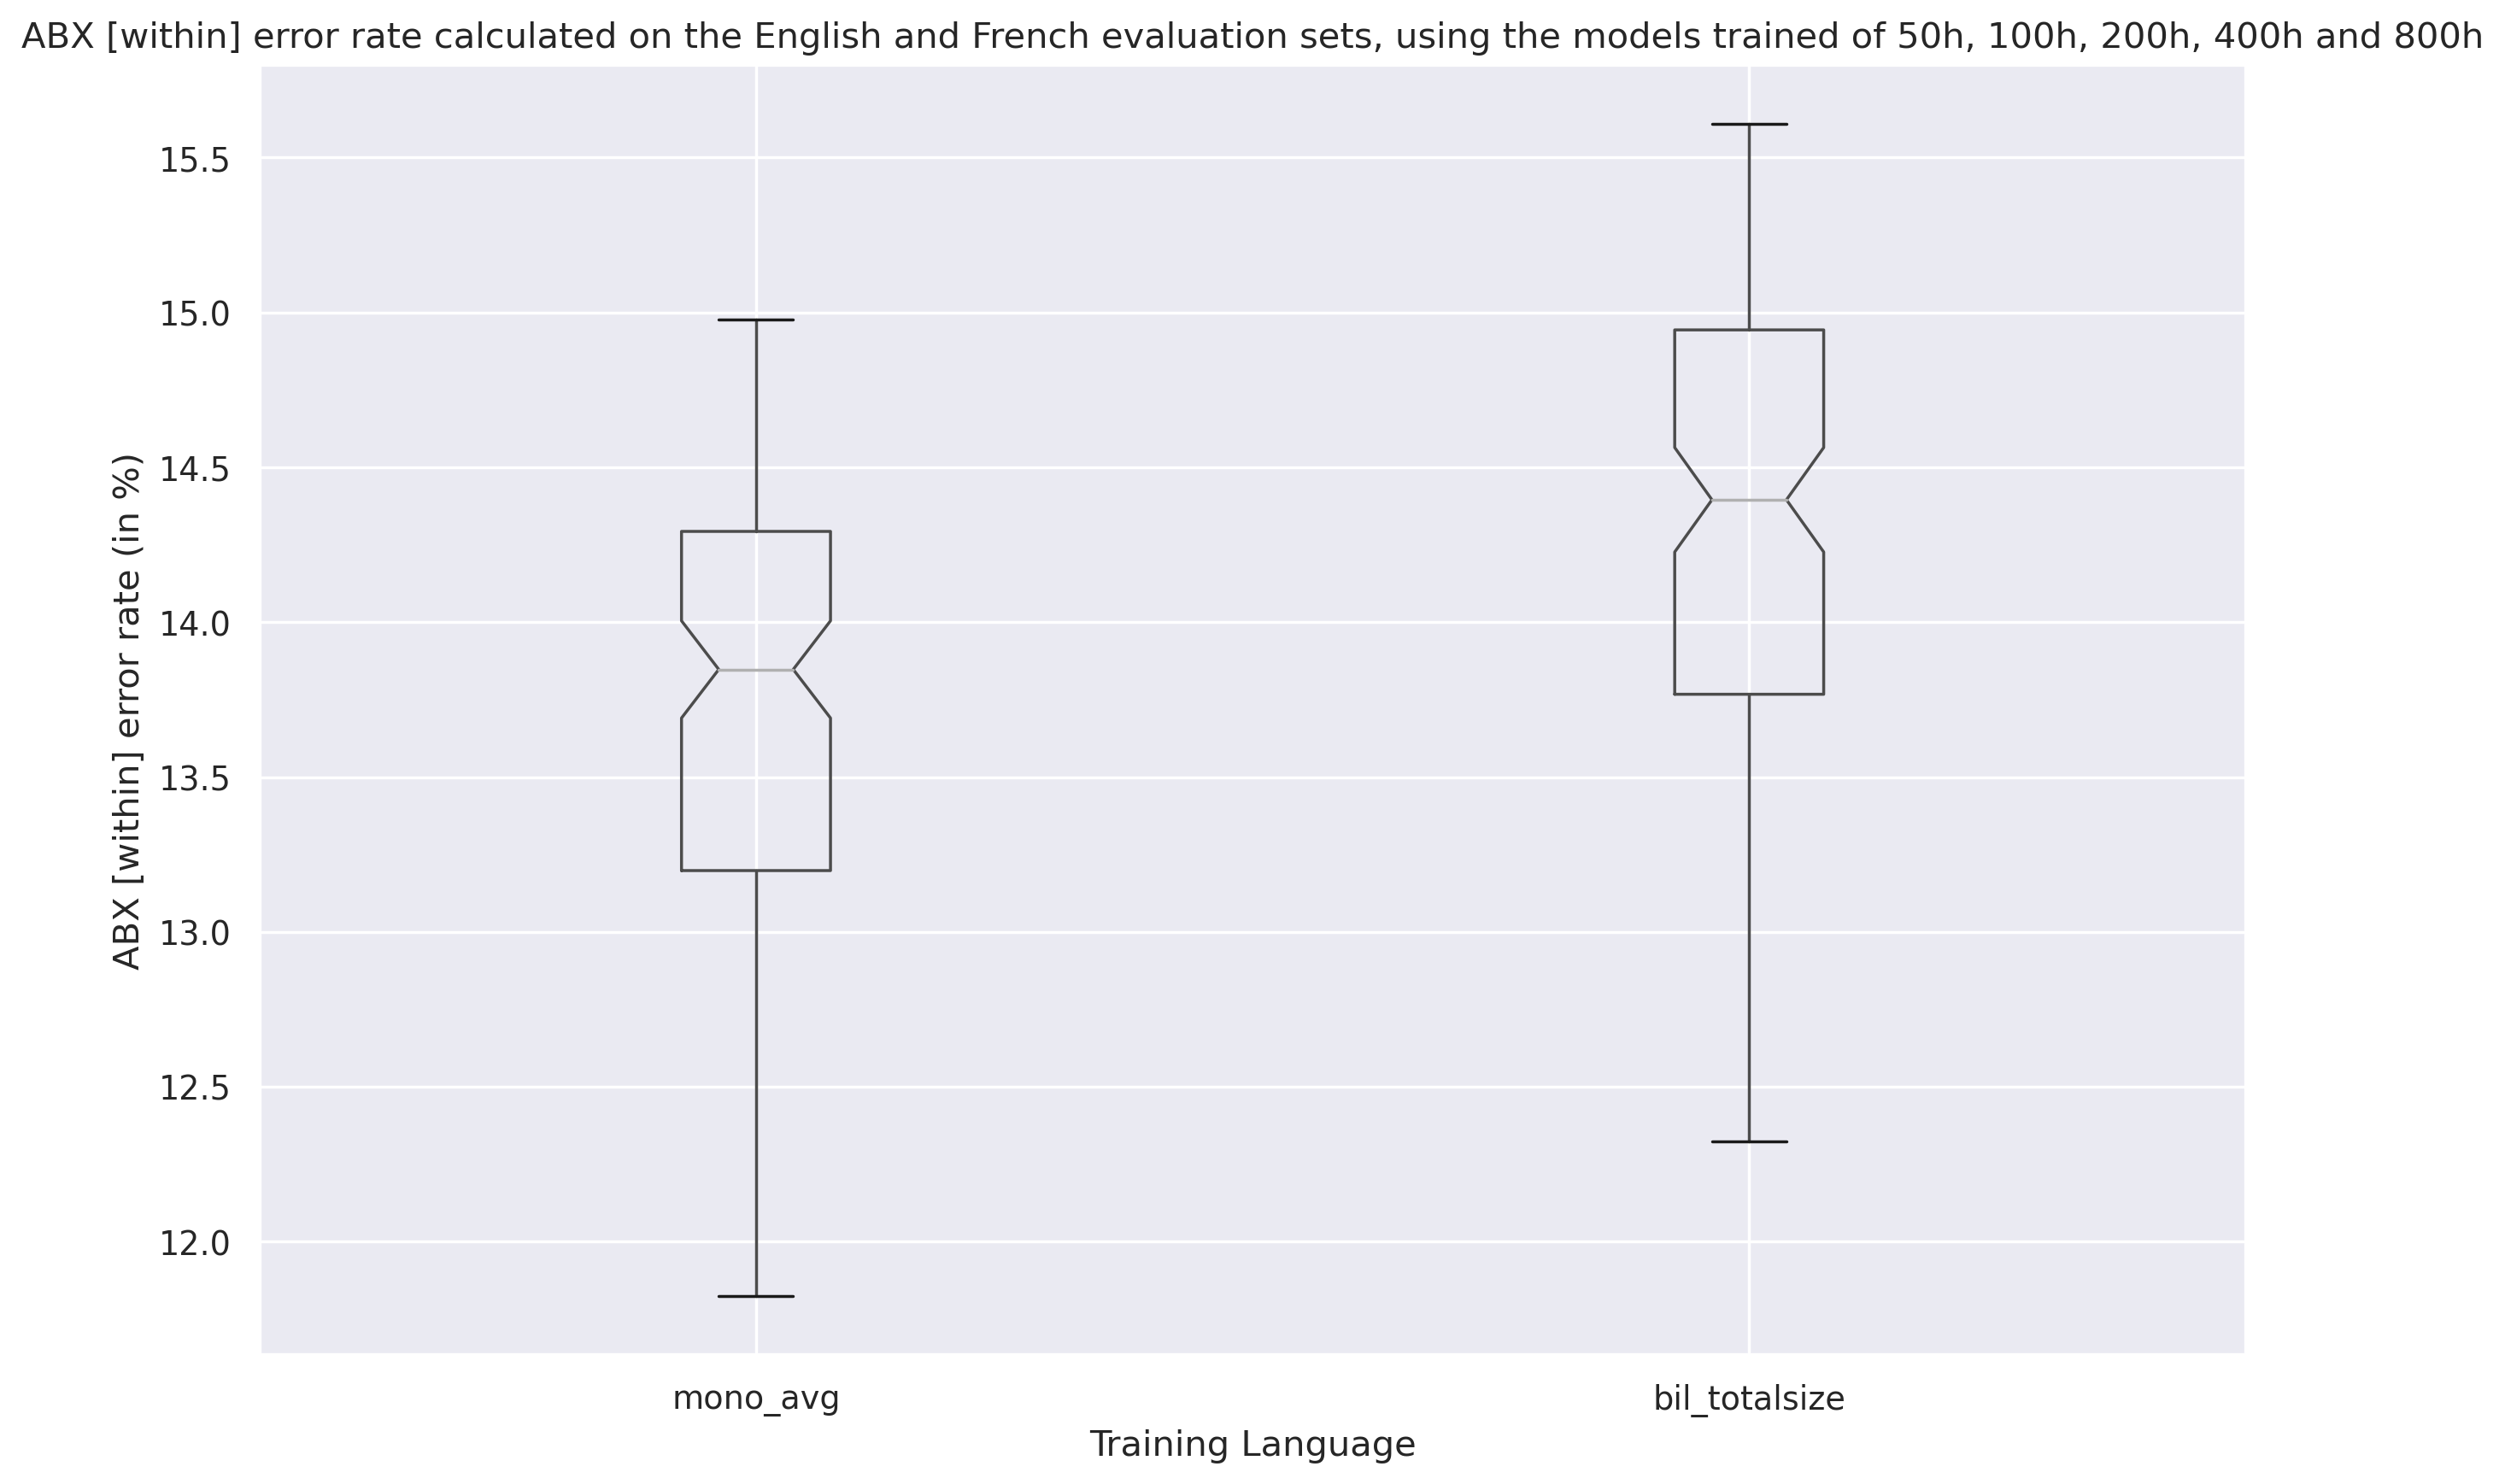

In [11]:
boxplot = df_within[['mono_avg', 'bil_totalsize','eval_lang']].dropna().boxplot(notch=True, return_type='axes')

plt.ylabel('ABX [within] error rate (in %)')
plt.xlabel('Training Language')
plt.title('ABX [within] error rate calculated on the English and French evaluation sets, using the models trained of 50h, 100h, 200h, 400h and 800h')



### C3. Monolingual vs Bilingual LangSize (original)
- ABX : within
- Test set : average English + French
These scores are not calculated on the largest dataset to ensure reliable comparison

Text(0.5, 1.0, 'ABX [within] error rate calculated on the English and French evaluation sets, using the models trained of 50h, 100h, 200h, 400h')

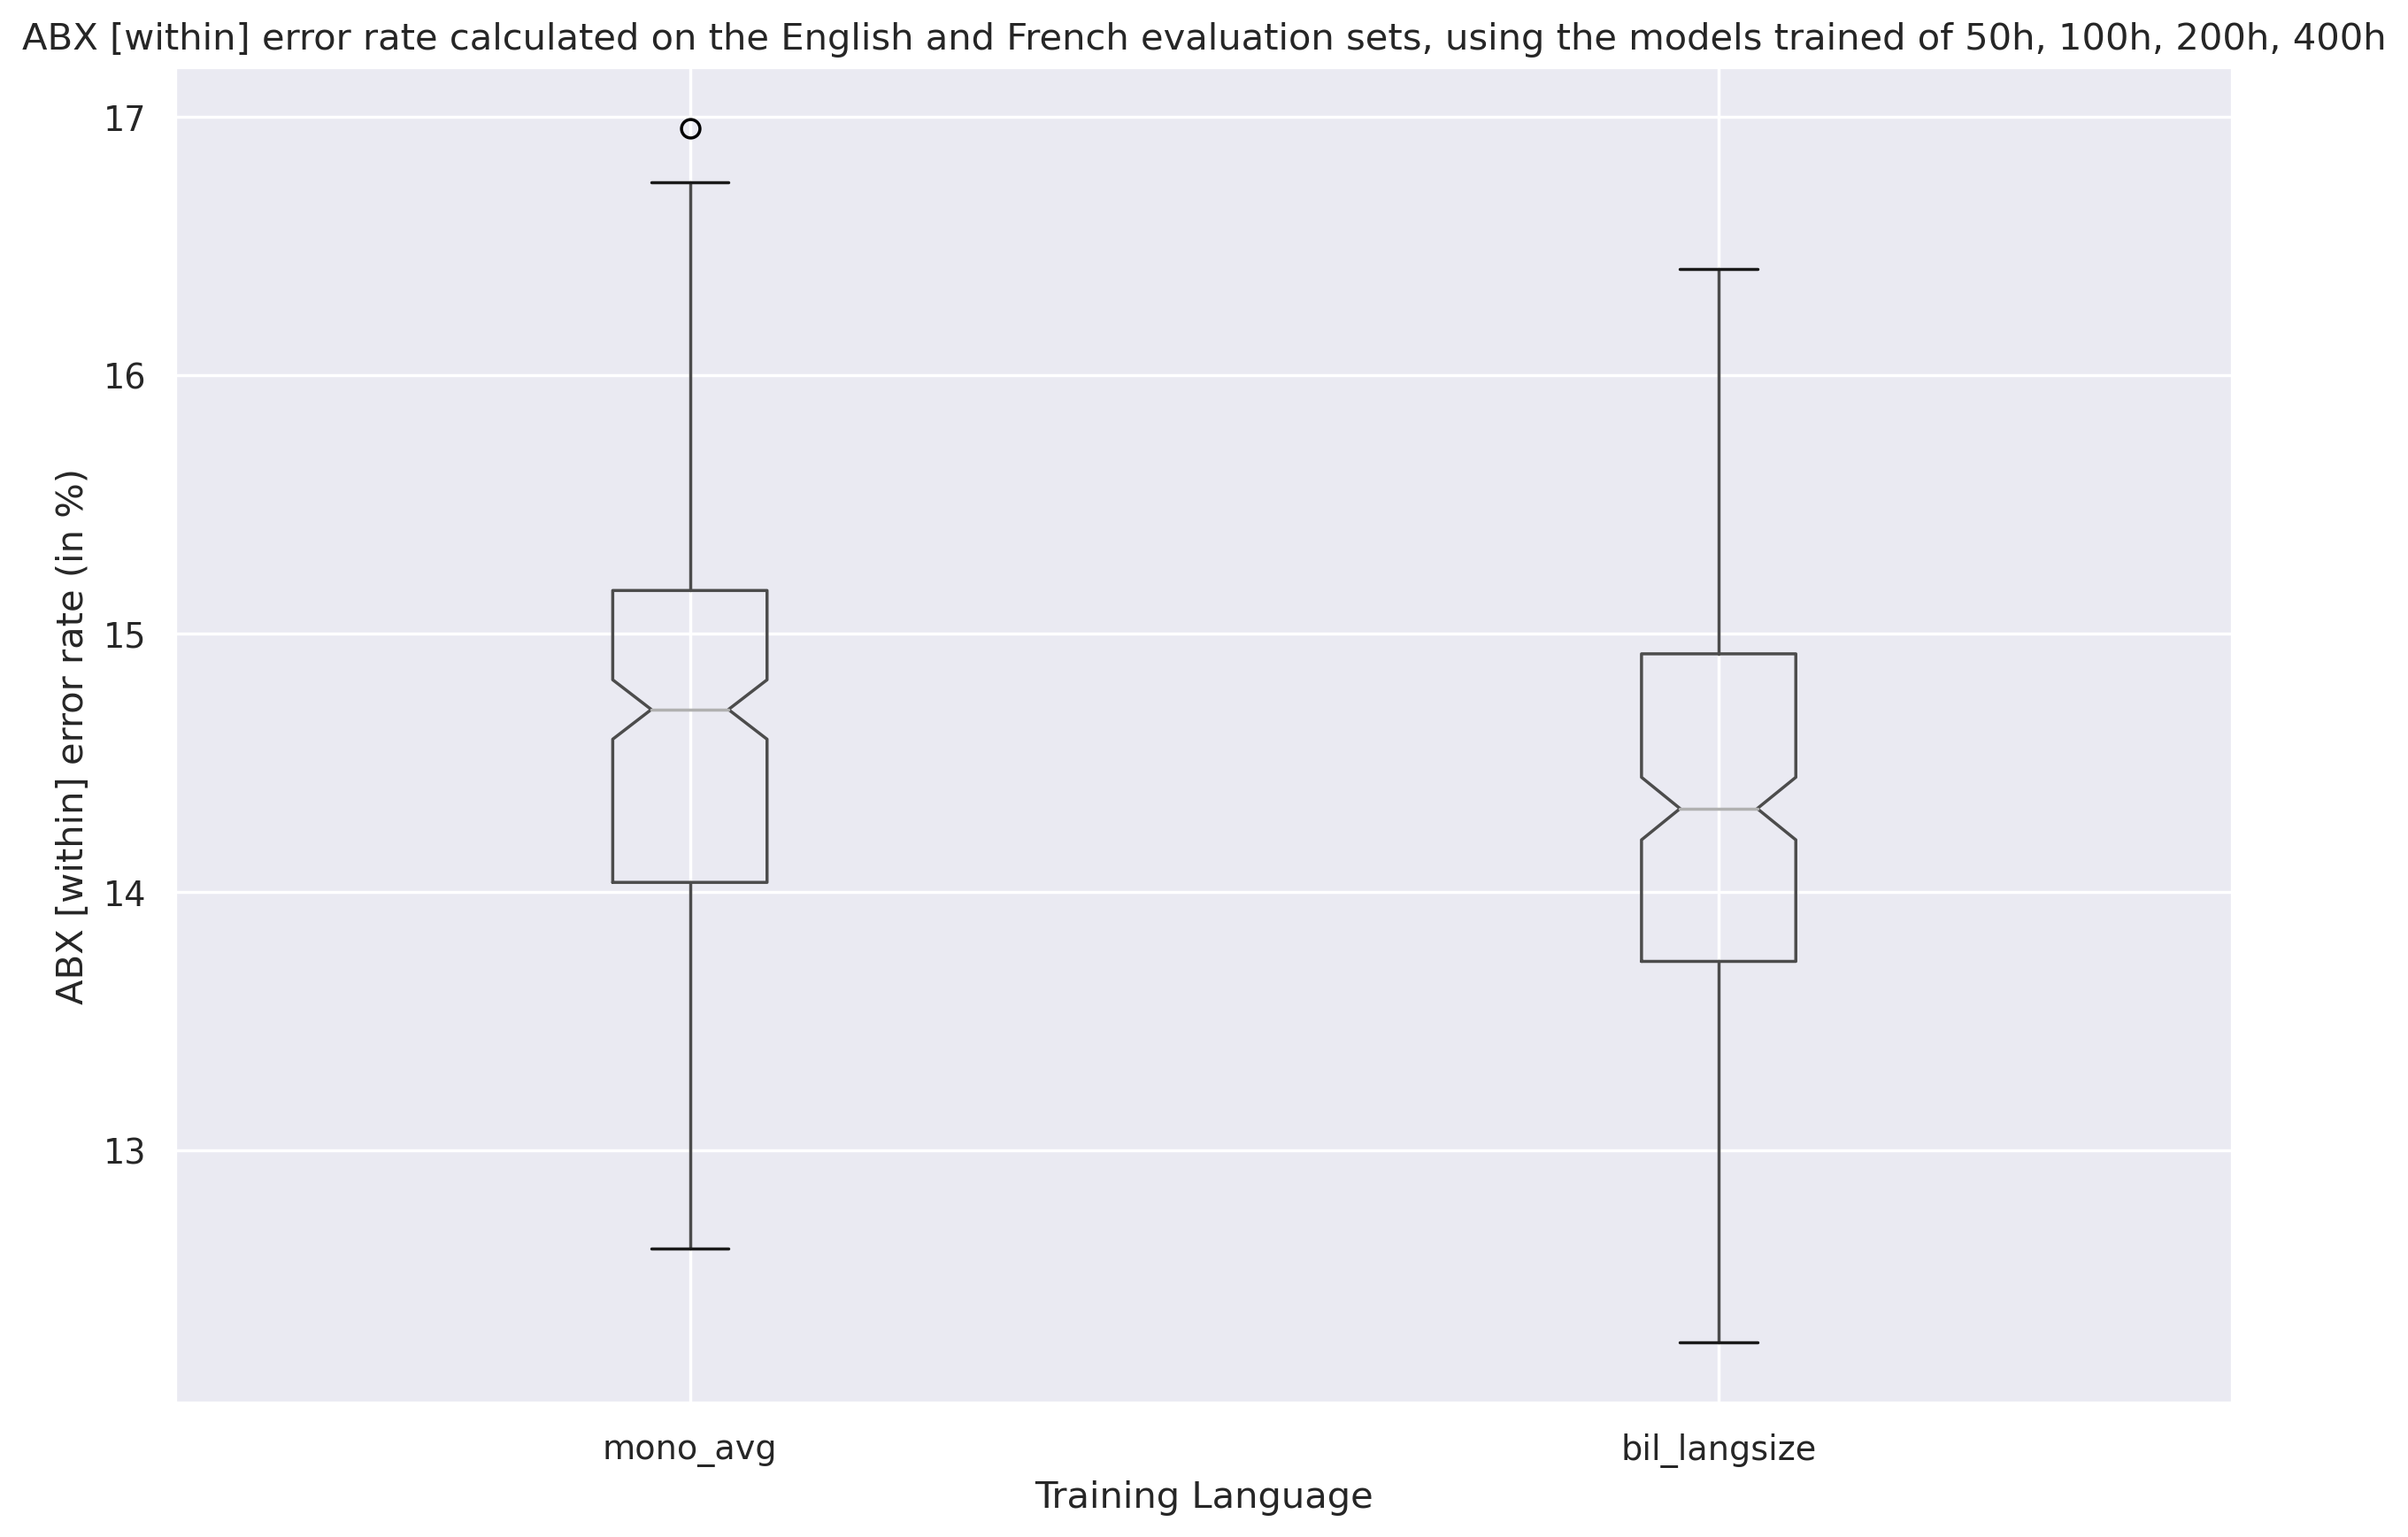

In [12]:
boxplot = df_within[['mono_avg', 'bil_langsize','eval_lang']].dropna().boxplot(notch=True, return_type='axes')

plt.ylabel('ABX [within] error rate (in %)')
plt.xlabel('Training Language')
plt.title('ABX [within] error rate calculated on the English and French evaluation sets, using the models trained of 50h, 100h, 200h, 400h')



## D. Developmental graphs

In [13]:
style_dict =  {'same': 'go-', 'different': 'ro-', 'bil_totalsize': 'bo:', 'bil_langsize':'co:', 'en_model' : 'go--', 'fr_model' : 'ro--', 'mono_avg':'wo-.'}


### D1. Developmental [within] ABX  on both test sets (original)

(10.0, 21.0)

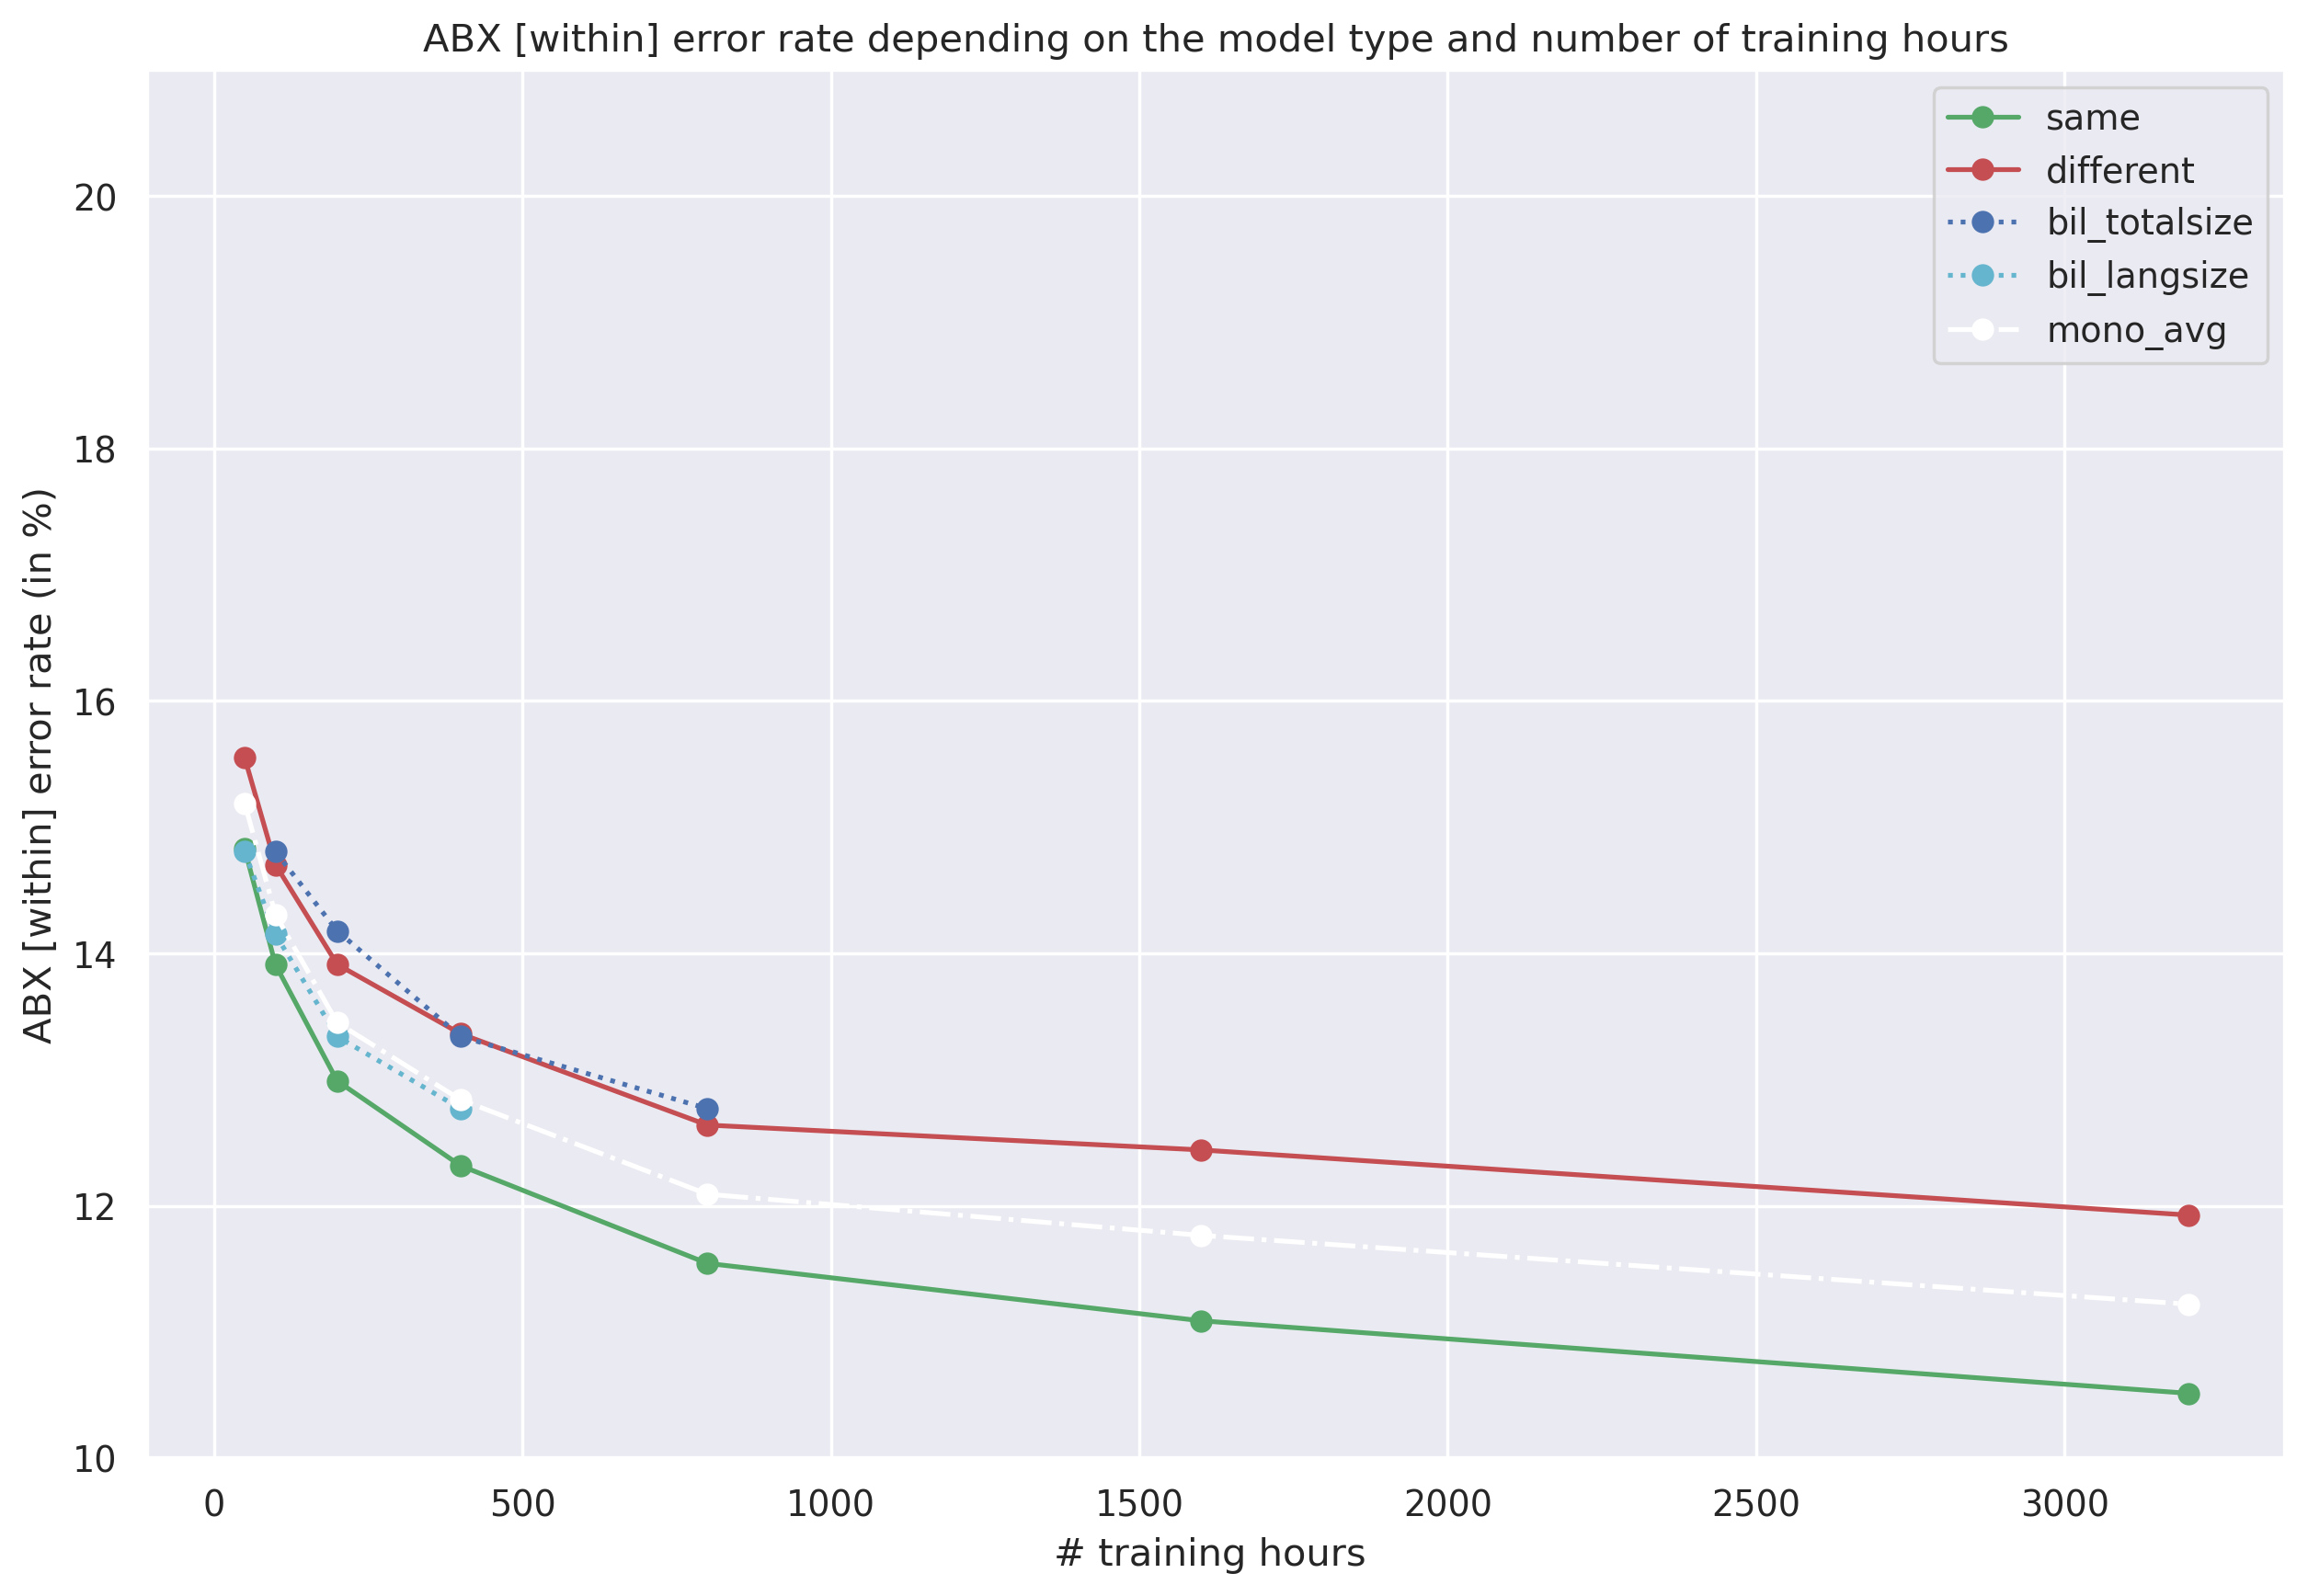

In [14]:
df_within_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
#df_within_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, yerr=err_within[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']])

#df_within_size[['same', 'different']].plot(style = style_dict)

plt.xlabel('# training hours ')
plt.ylabel("ABX [within] error rate (in %)")
plt.title("ABX [within] error rate depending on the model type and number of training hours")
plt.ylim([10,21])

(10.0, 21.0)

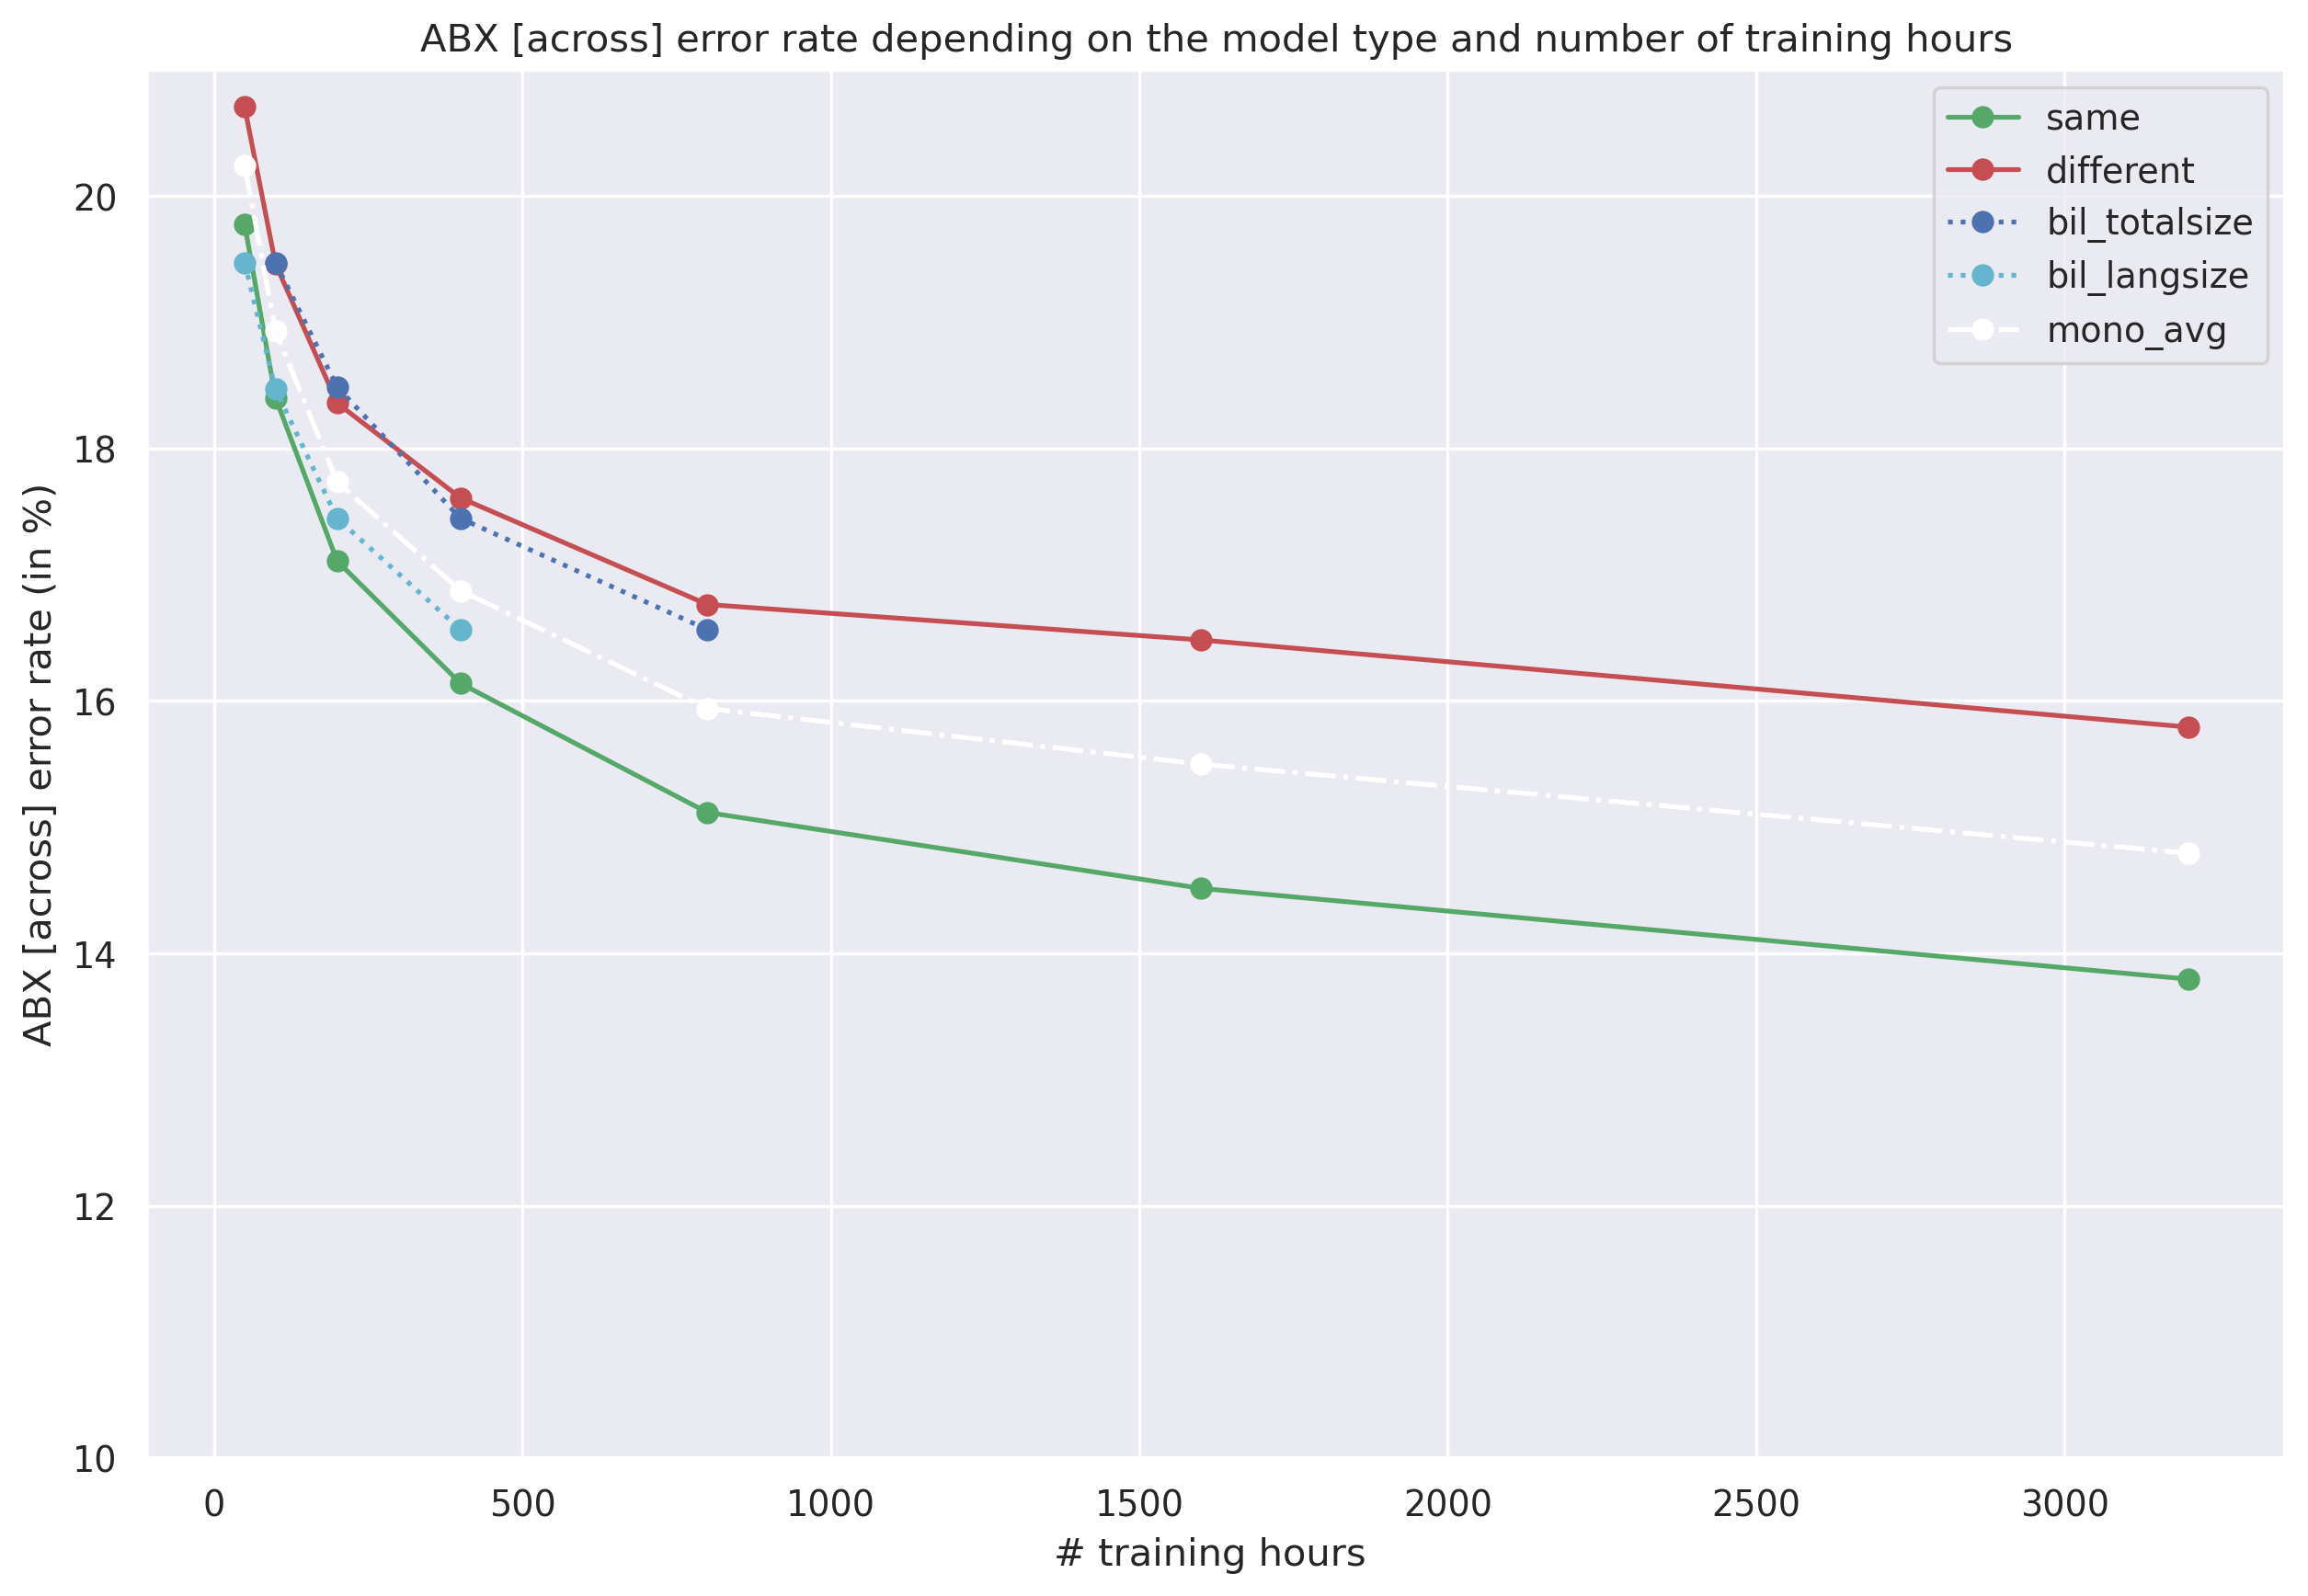

In [15]:
df_across_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
#df_within_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, yerr=err_within[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']])

#df_within_size[['same', 'different']].plot(style = style_dict)

plt.xlabel('# training hours ')
plt.ylabel("ABX [across] error rate (in %)")
plt.title("ABX [across] error rate depending on the model type and number of training hours")
plt.ylim([10,21])

In [16]:
err_within[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']]

same  different  bil_totalsize  bil_langsize  mono_avg
size                                                            
50    0.877175   0.894854            NaN      0.626584  0.539525
100   0.678156   0.659250       0.456857      0.548280  0.376270
200   0.582534   0.608518       0.480027      0.364740  0.362071
400   0.471578   0.472301       0.255184      0.412447  0.130723
800   0.501621   0.417259       0.409340           NaN  0.151586
1600  0.558177   0.502919            NaN           NaN  0.070244
3200  0.628515   0.528725            NaN           NaN  0.049895

In [17]:
df_within.groupby('size').std()


en_model  fr_model  bil_totalsize_A  bil_totalsize_B      same  \
size                                                                   
50    0.777269  0.909418              NaN              NaN  0.877175   
100   0.664324  0.670661         0.621776         0.632656  0.678156   
200   0.707428  0.663255         0.539616         0.566325  0.582534   
400   0.646980  0.628009         0.337577         0.389417  0.471578   
800   0.693796  0.567314         0.439392         0.409945  0.501621   
1600  0.847338  0.748767              NaN              NaN  0.558177   
3200  1.048624  0.948834              NaN              NaN  0.628515   

      different  bil_langsize  bil_totalsize  mono_avg  
size                                                    
50     0.894854      0.626584            NaN  0.539525  
100    0.659250      0.548280       0.456857  0.376270  
200    0.608518      0.364740       0.480027  0.362071  
400    0.472301      0.412447       0.255184  0.130723  
800    0.417259           NaN       0.409340  0.151586  
1600   0.502919           NaN            NaN  0.070244  
3200   0.528725           NaN            NaN  0.049895

Text(0.5, 1.0, 'ABX [within] error rate depending on the model type and number of training hours')

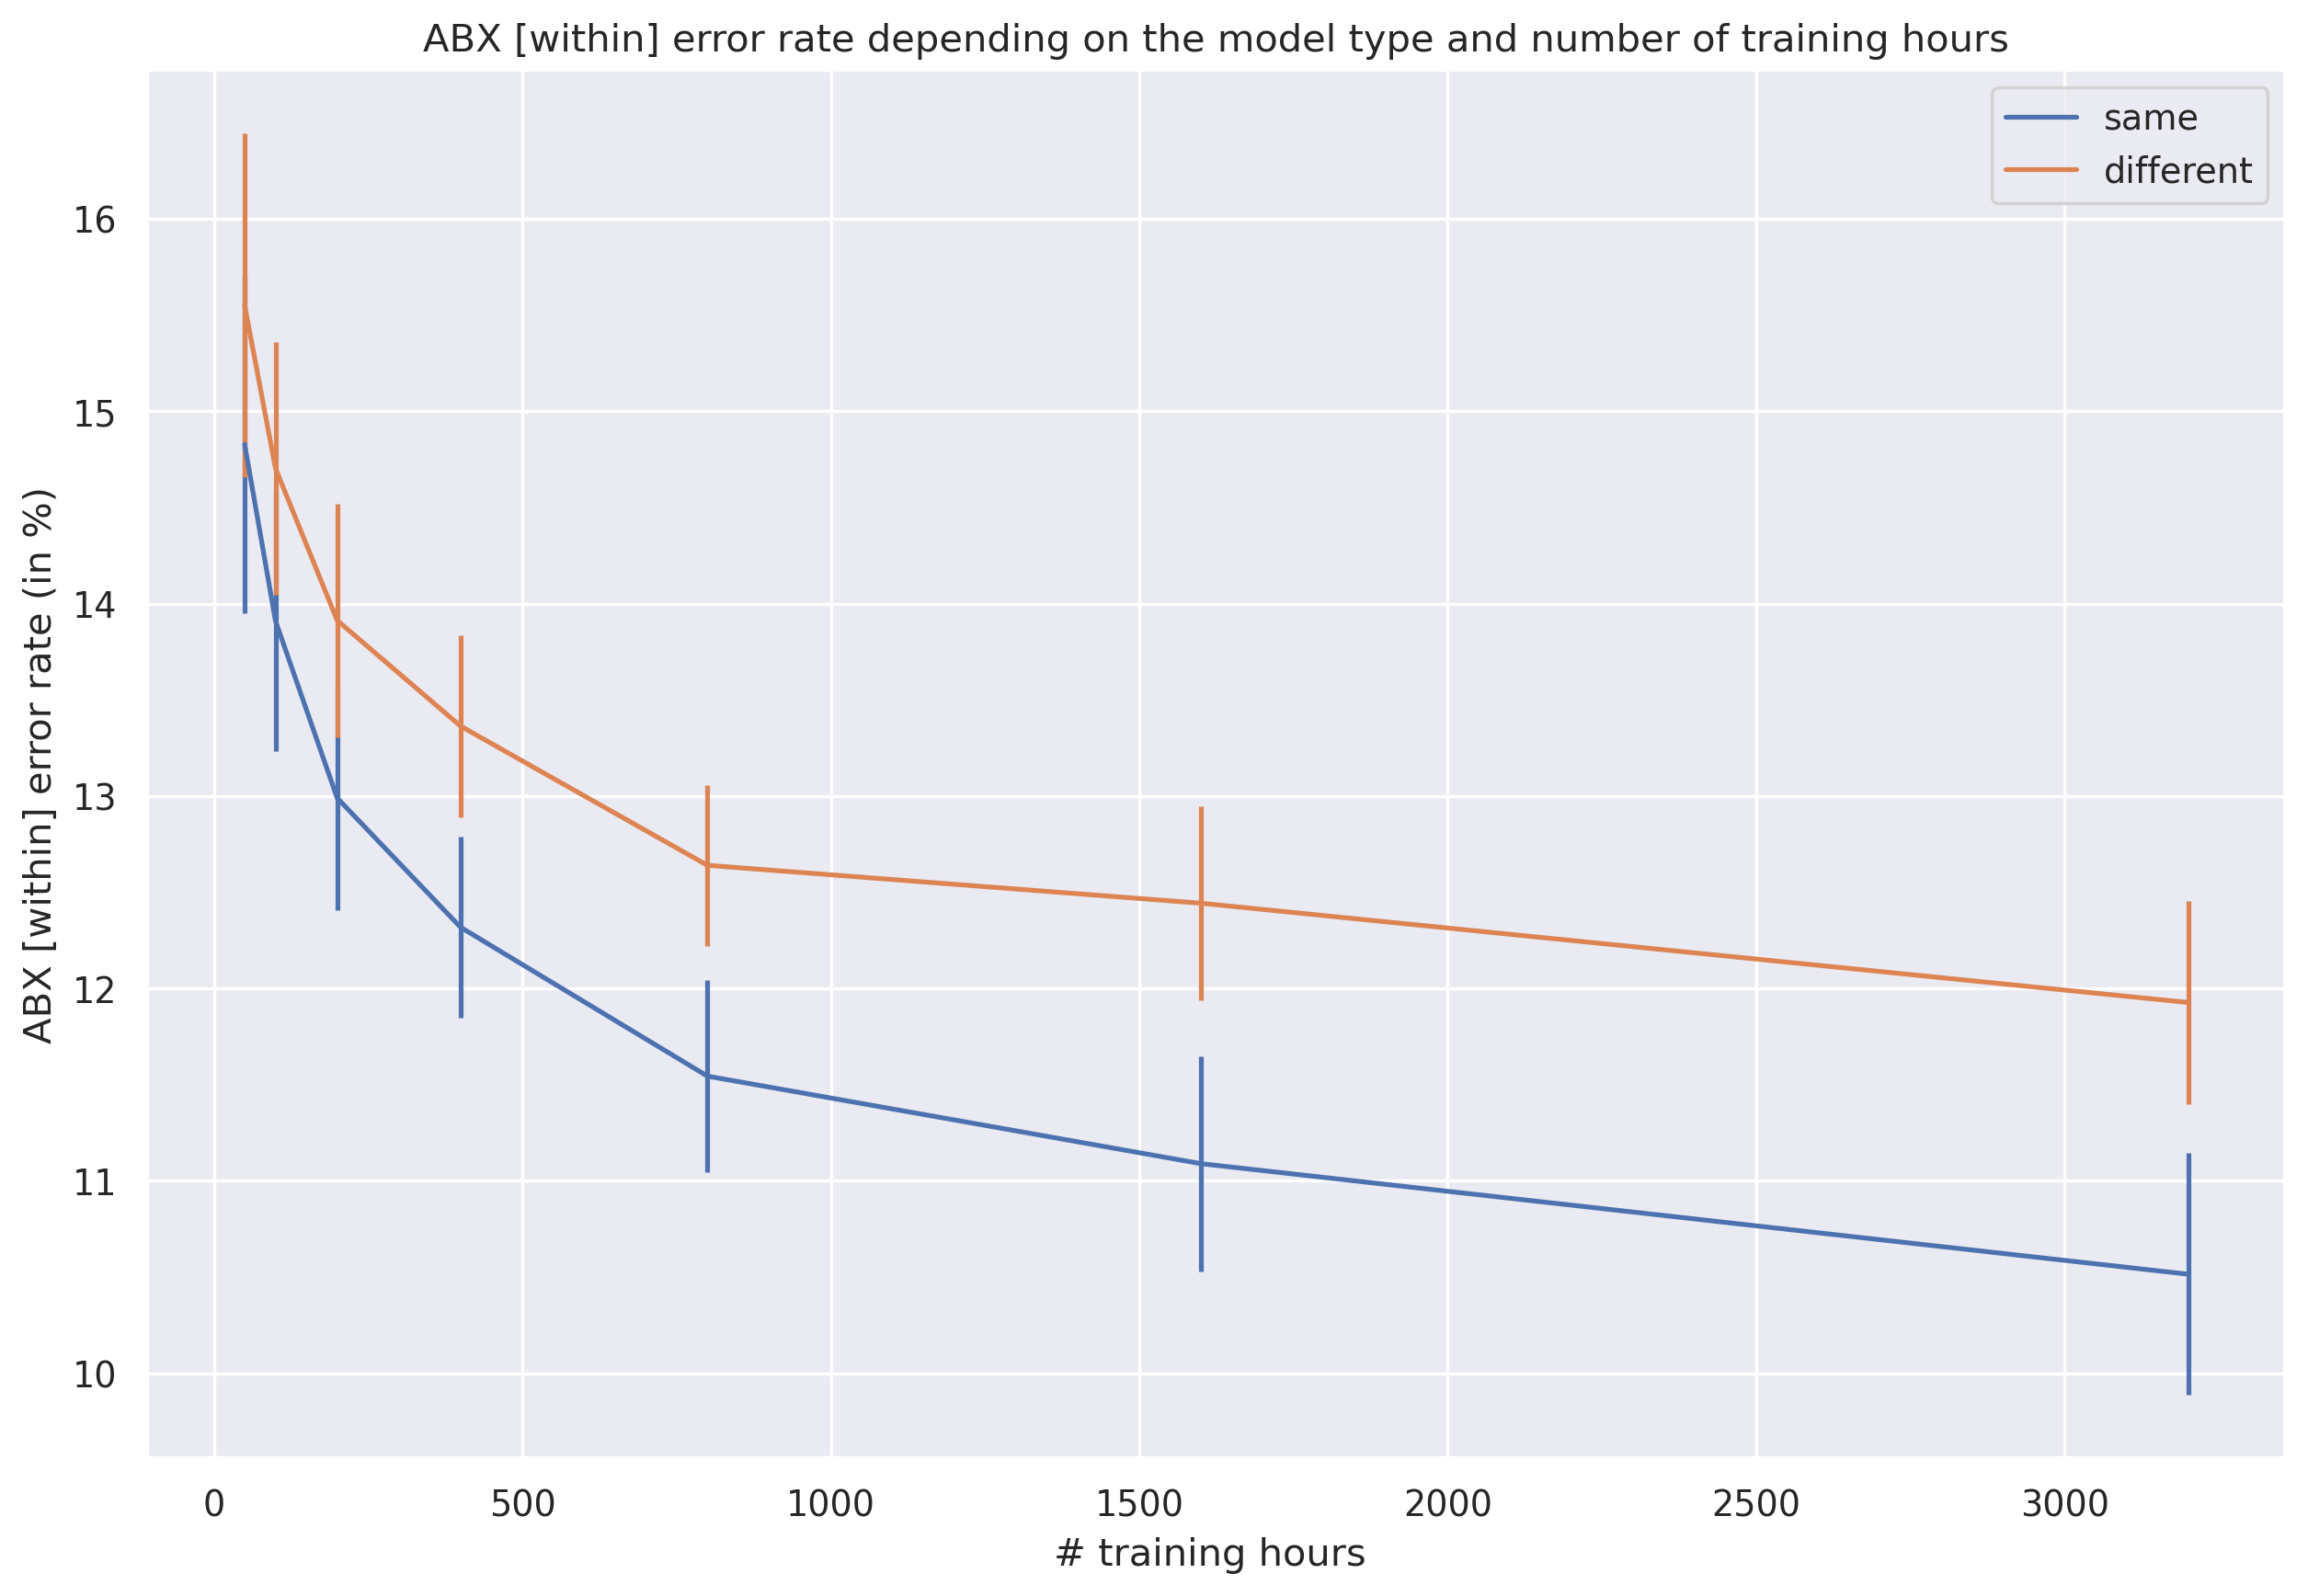

In [18]:
#doesn't work as this is not split by same vs different?

#df_within_size[['bil_totalsize']].plot(style = style_dict)
df_within_size[['same', 'different']].plot(style = style_dict, yerr=err_within[['same', 'different']])


plt.xlabel('# training hours ')
plt.ylabel("ABX [within] error rate (in %)")
plt.title("ABX [within] error rate depending on the model type and number of training hours")


(10, 21)

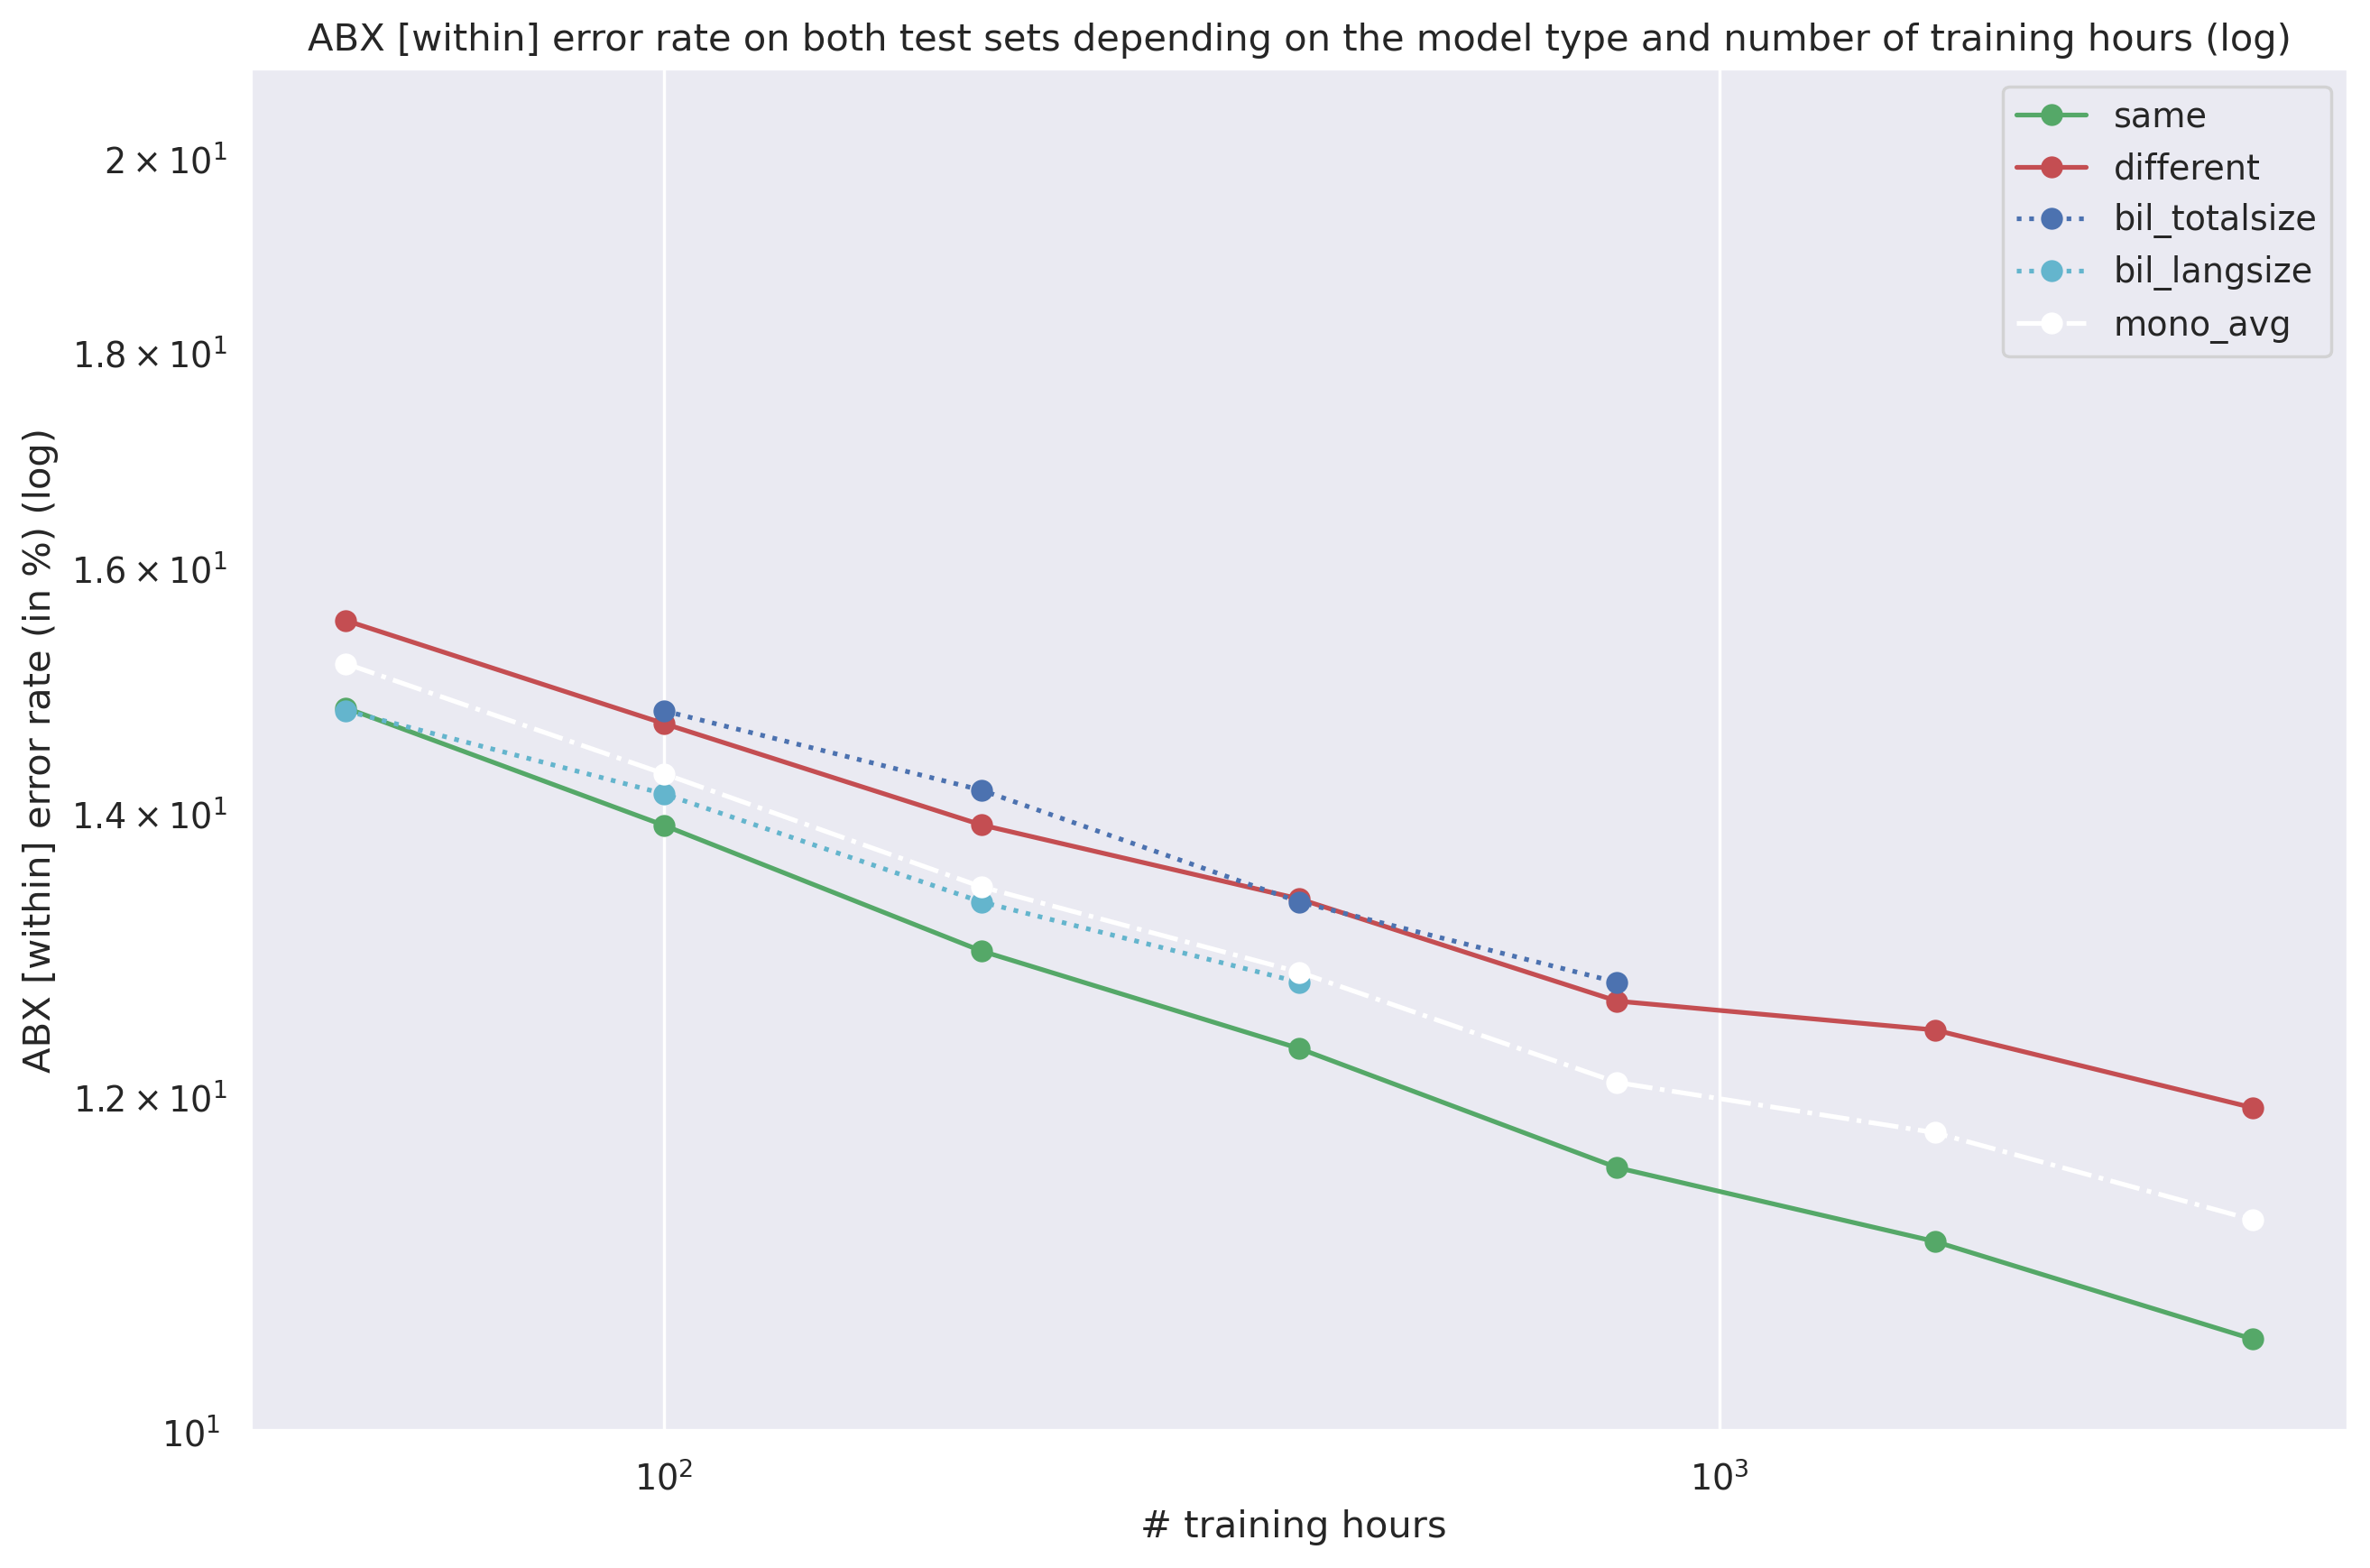

In [19]:
df_within_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
#df_within_size[['same', 'different']].plot(style = style_dict, loglog=True)

plt.xlabel('# training hours ')
plt.ylabel("ABX [within] error rate (in %) (log)")
plt.title("ABX [within] error rate on both test sets depending on the model type and number of training hours (log)")
plt.ylim([10,21])

(10, 21)

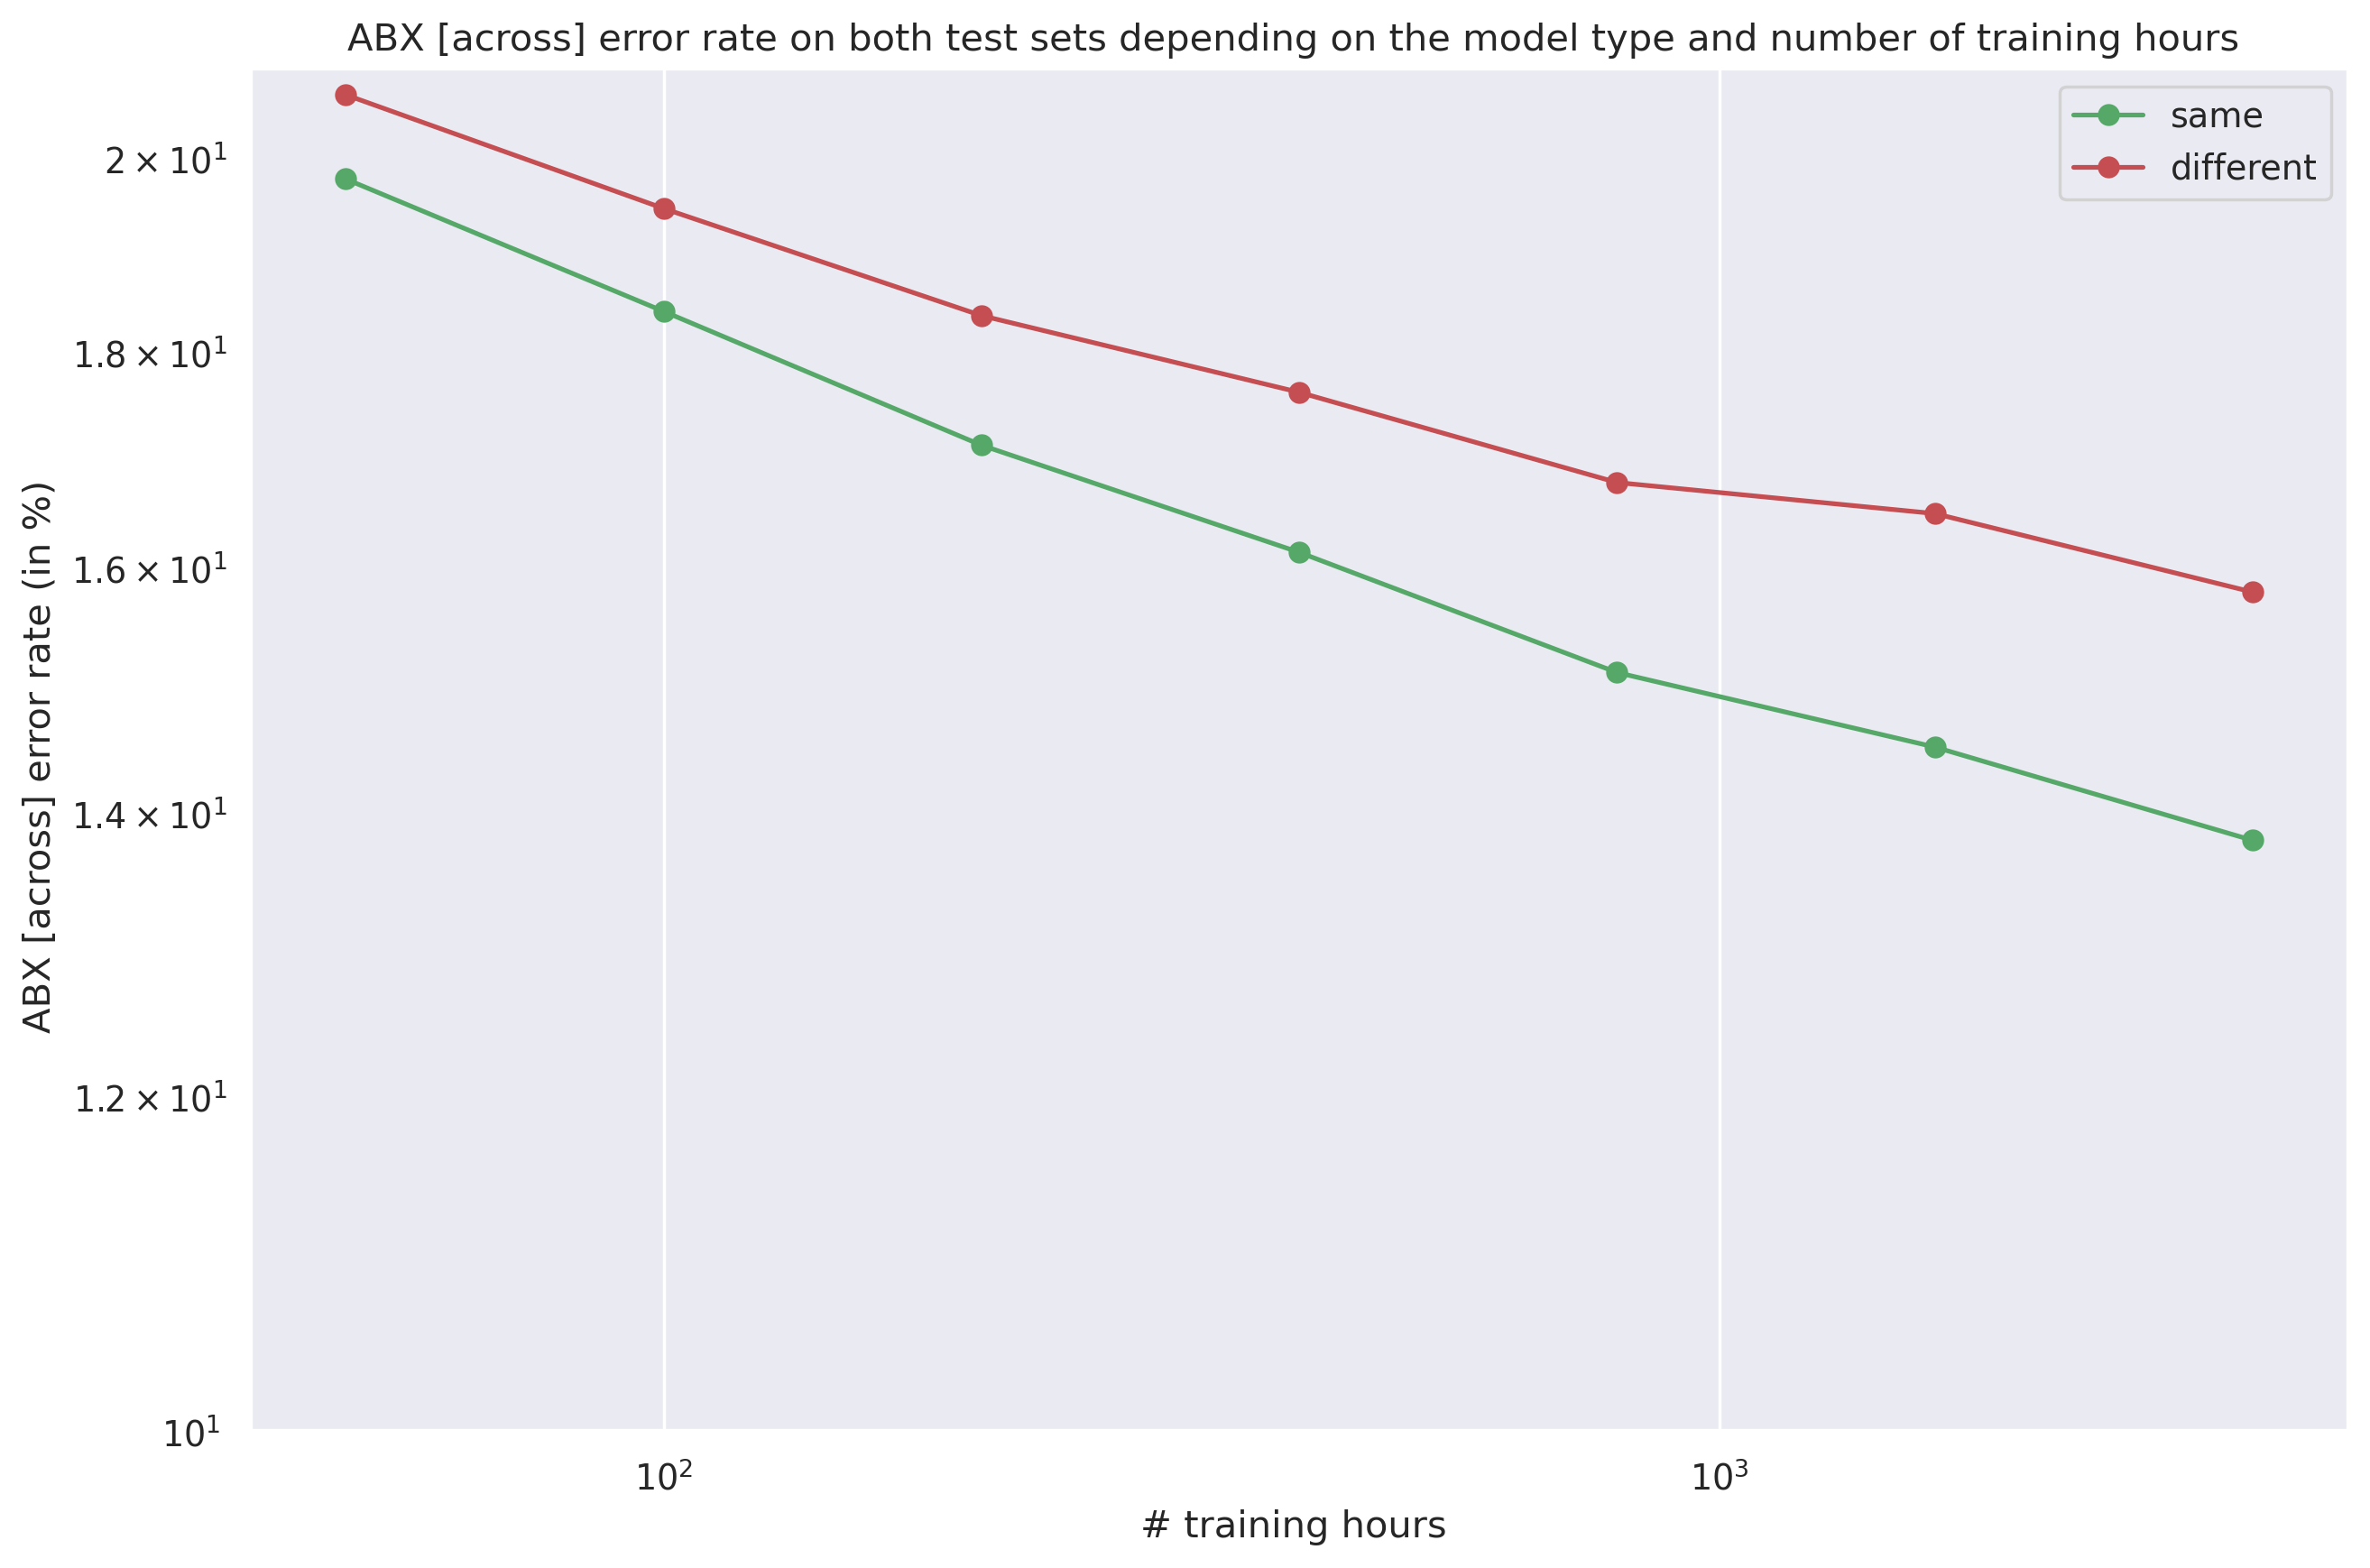

In [20]:
#df_across_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
df_across_size[['same', 'different']].plot(style = style_dict, loglog=True)

plt.xlabel('# training hours ')
plt.ylabel("ABX [across] error rate (in %) ")
plt.title("ABX [across] error rate on both test sets depending on the model type and number of training hours ")
plt.ylim([10,21])

(10, 21)

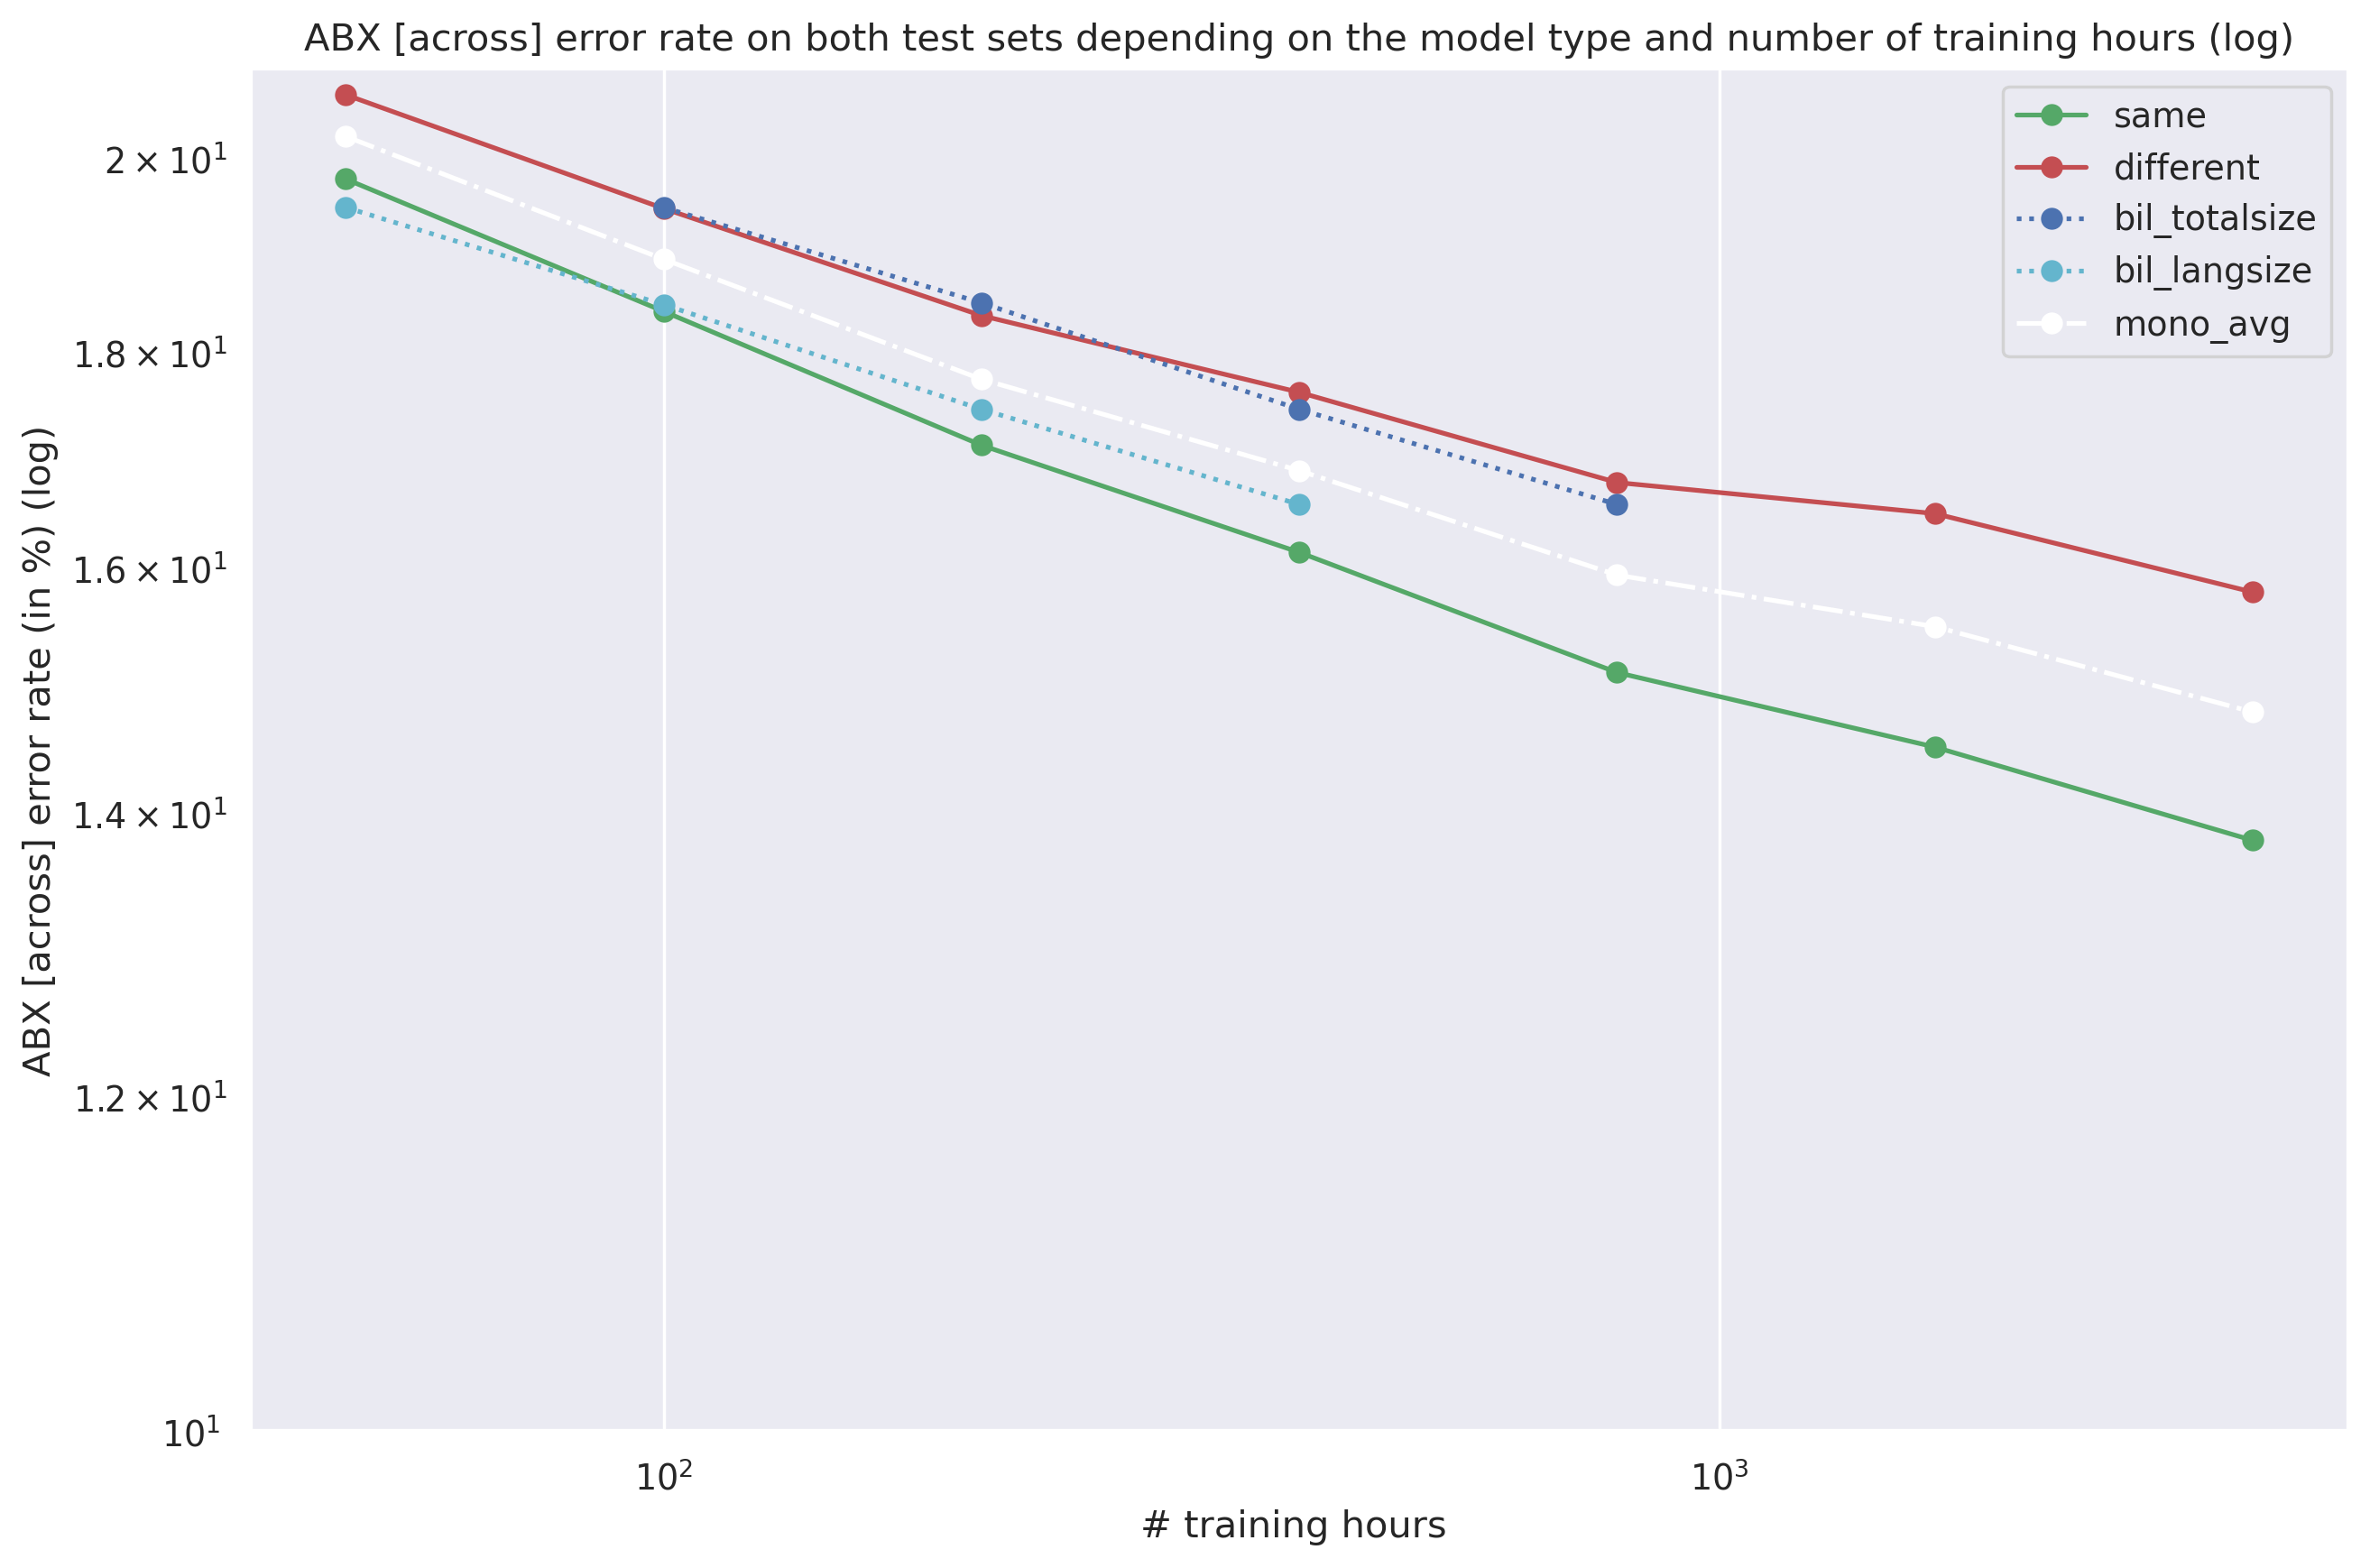

In [21]:
df_across_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
#df_across_size[['same', 'different']].plot(style = style_dict, loglog=True)

plt.xlabel('# training hours ')
plt.ylabel("ABX [across] error rate (in %) (log)")
plt.title("ABX [across] error rate on both test sets depending on the model type and number of training hours (log)")
plt.ylim([10,21])

### D3a. Developmental [within] ABX  on the French test set 

Text(0.5, 1.0, 'ABX [within] error rate on the FRENCH evaluation set')

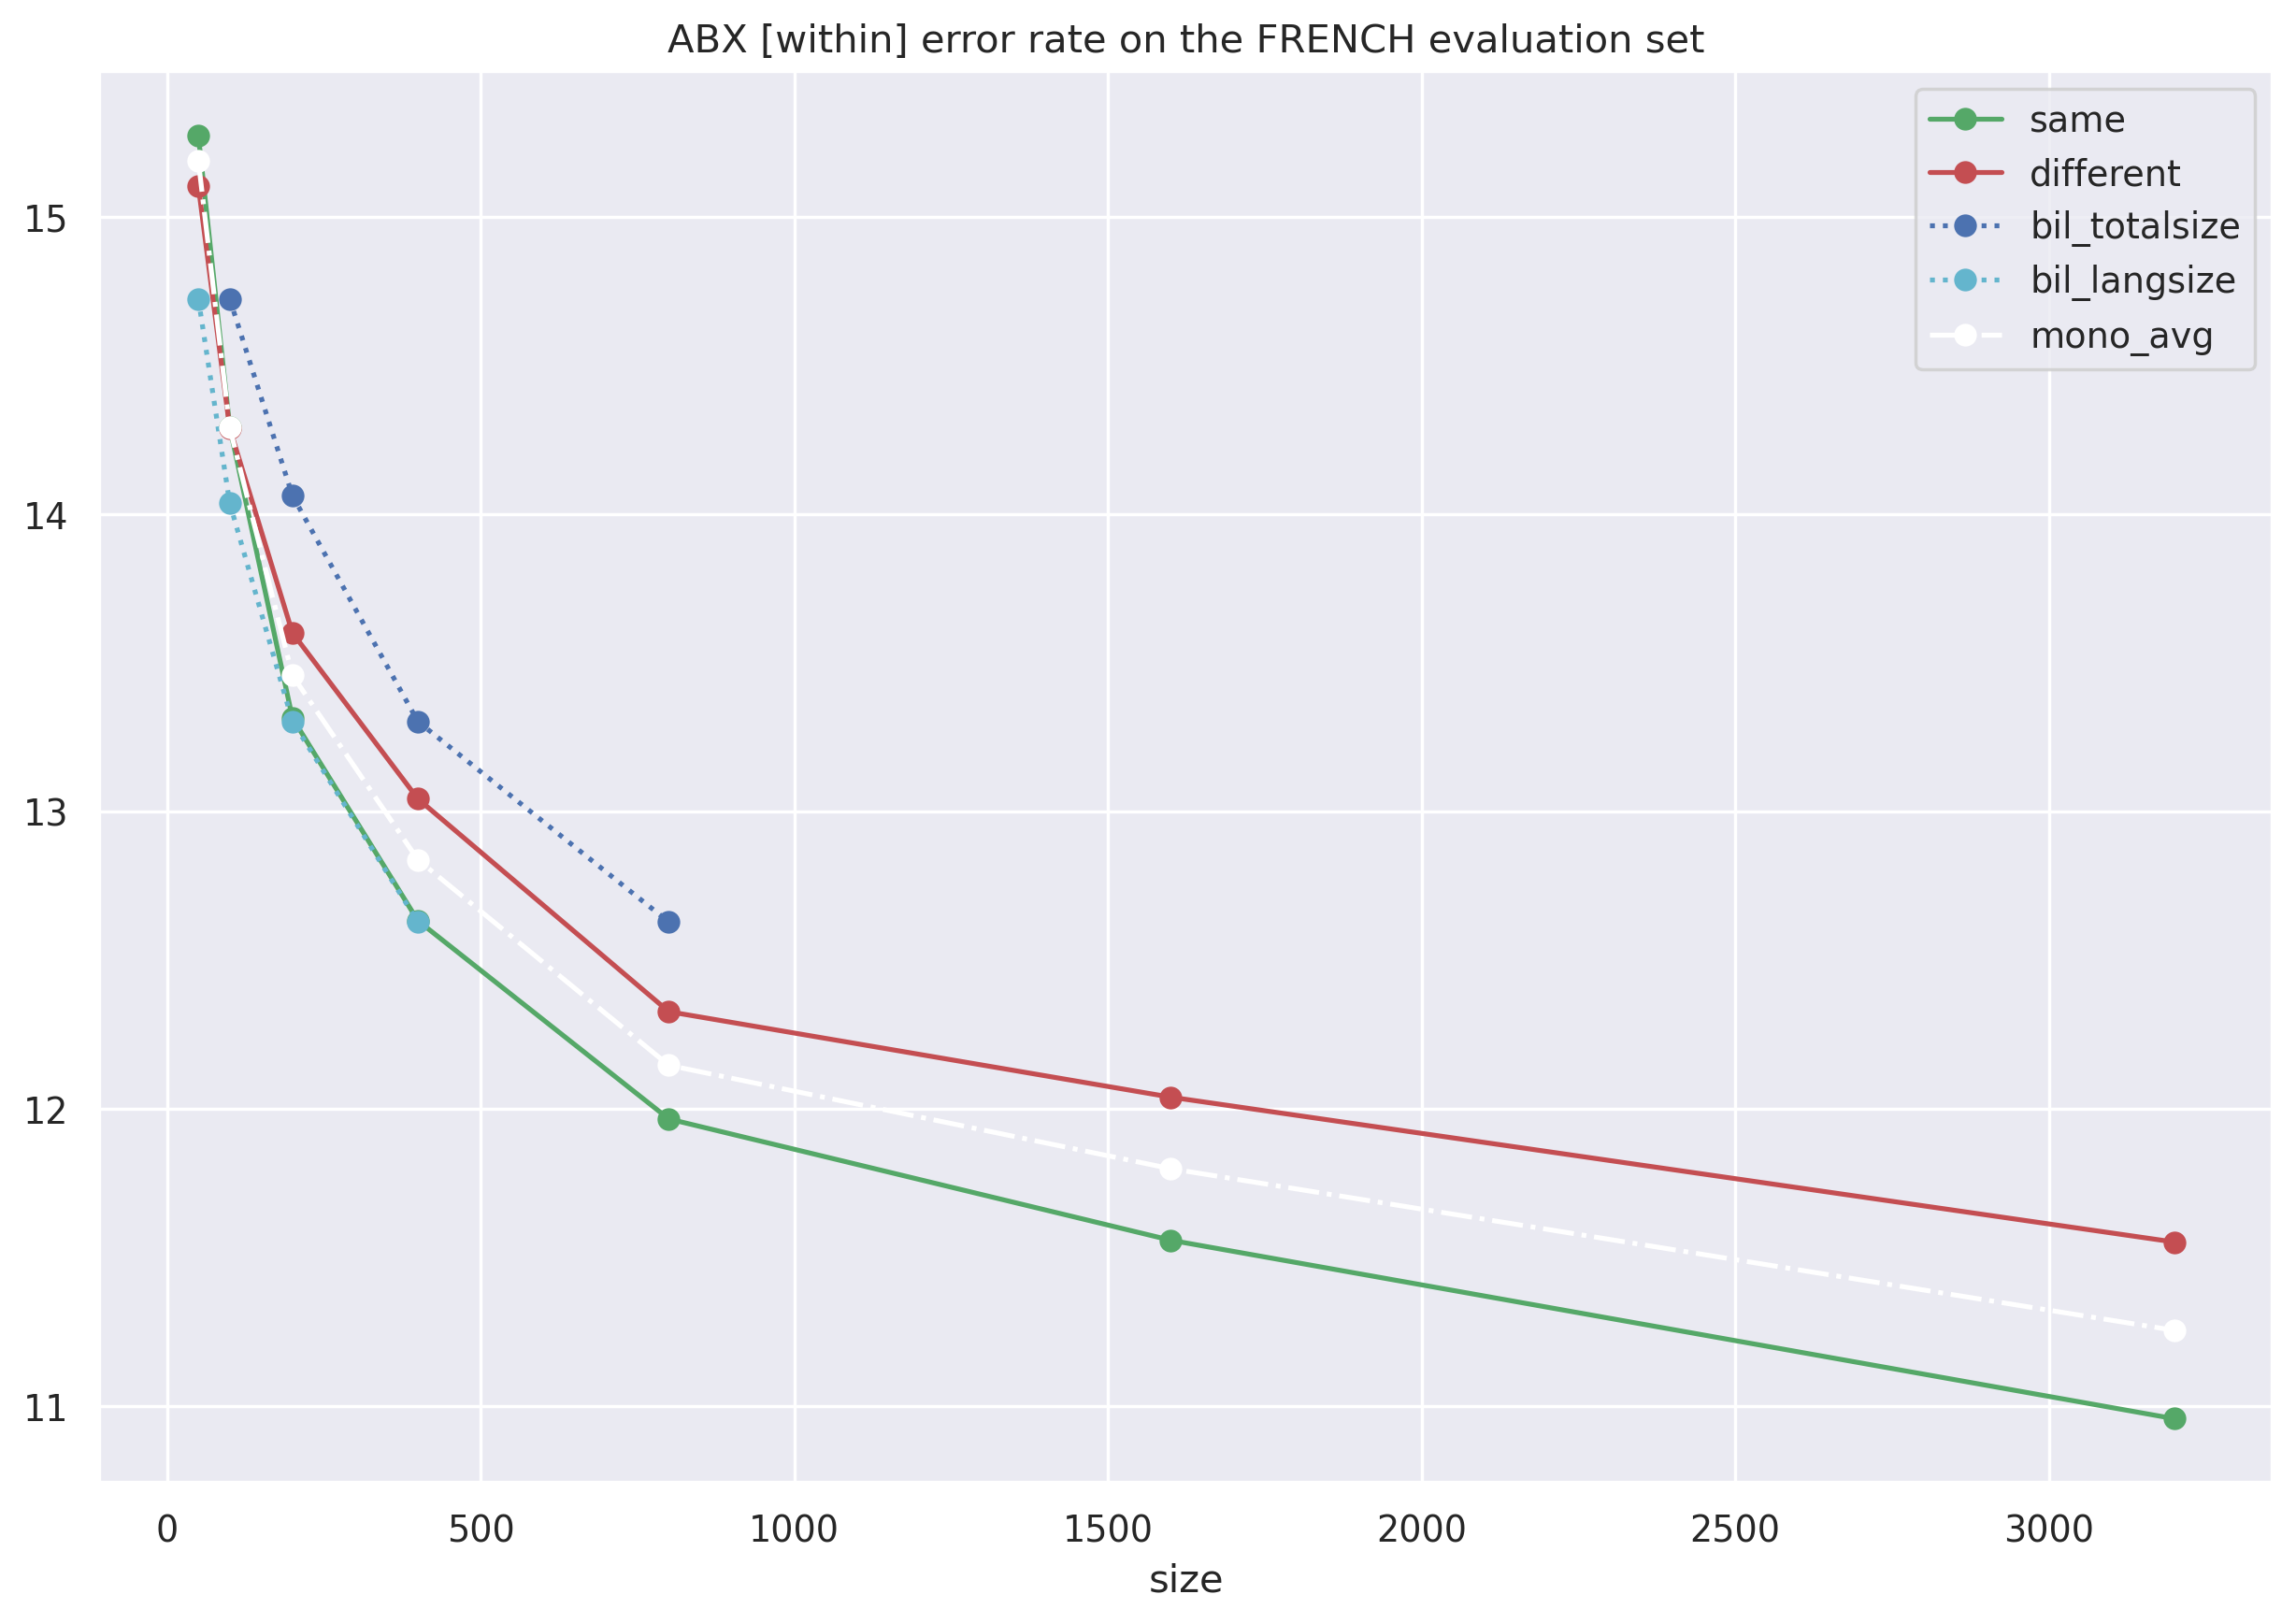

In [22]:
l="fr"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
plt.title("ABX [within] error rate on the FRENCH evaluation set")


### D3c. Developmental [within] ABX  on the French test set - Loglog scale

(10, 17)

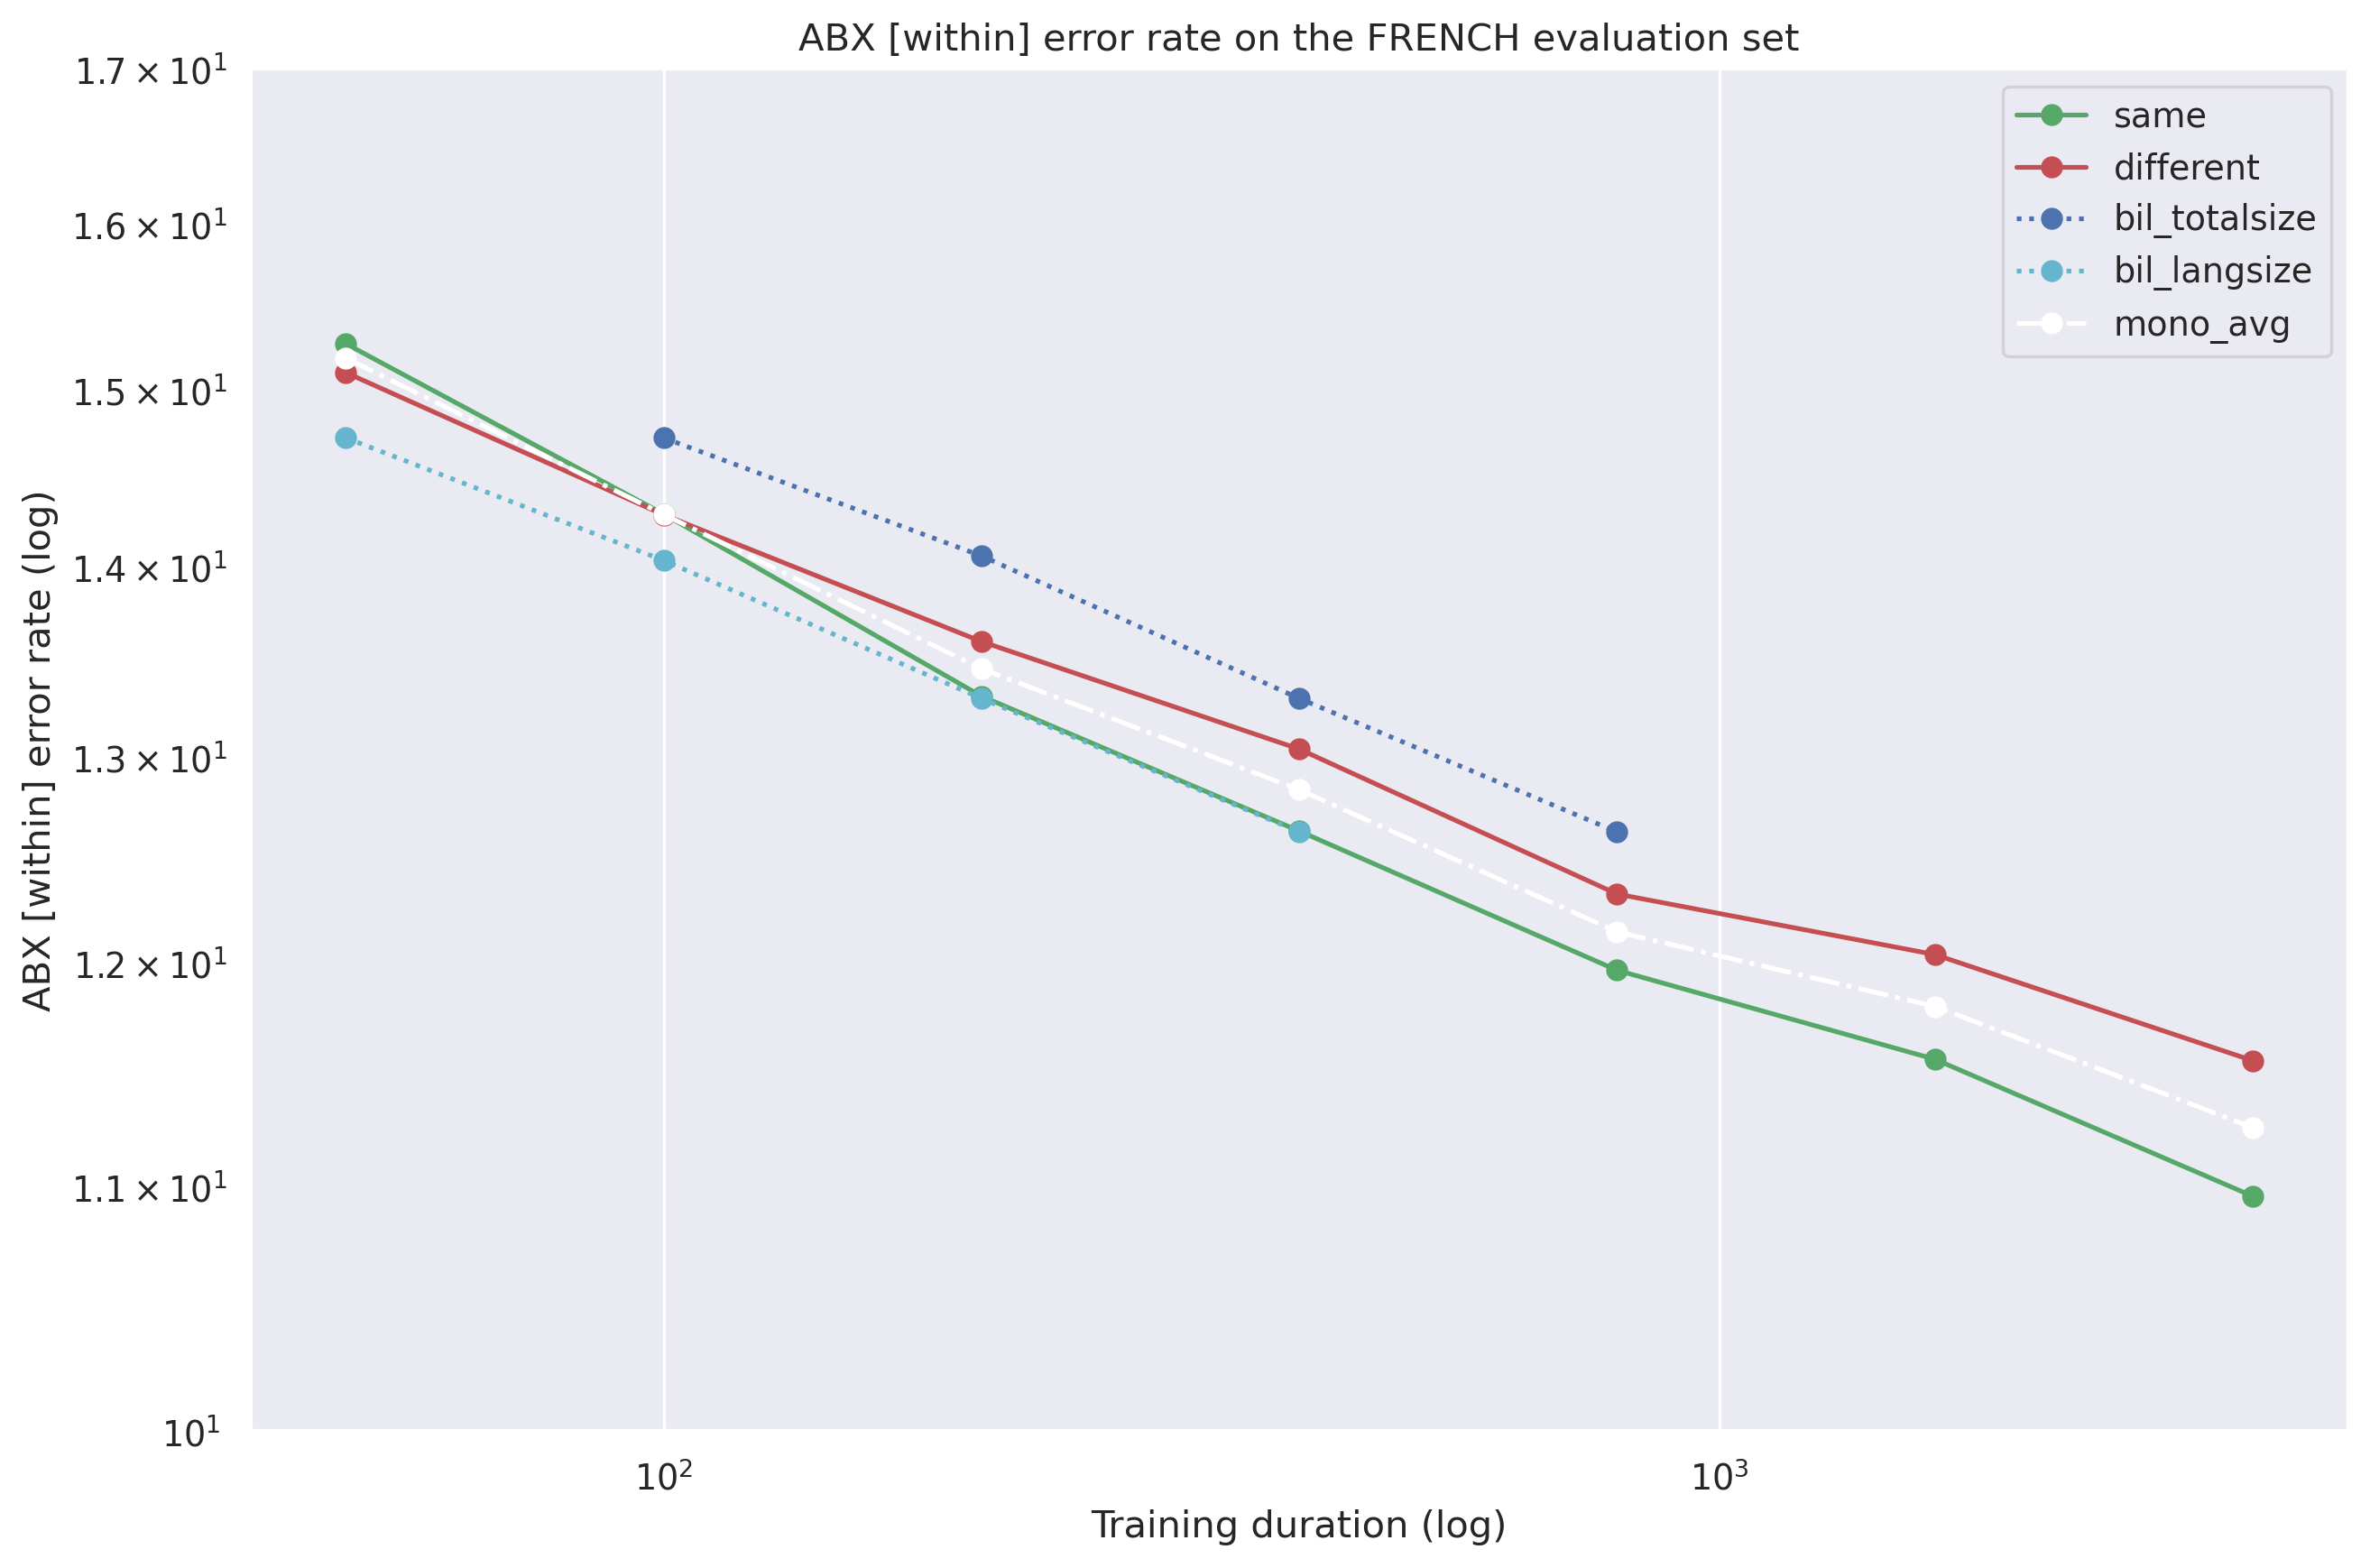

In [23]:
#log

l="fr"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
#df_tmp = df_tmp[['same', 'different']].plot(style = style_dict, loglog=True)

plt.title("ABX [within] error rate on the FRENCH evaluation set")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate (log)")
plt.ylim([10,17])

### D4a. Developmental [within] ABX on the English test set

(10.0, 17.0)

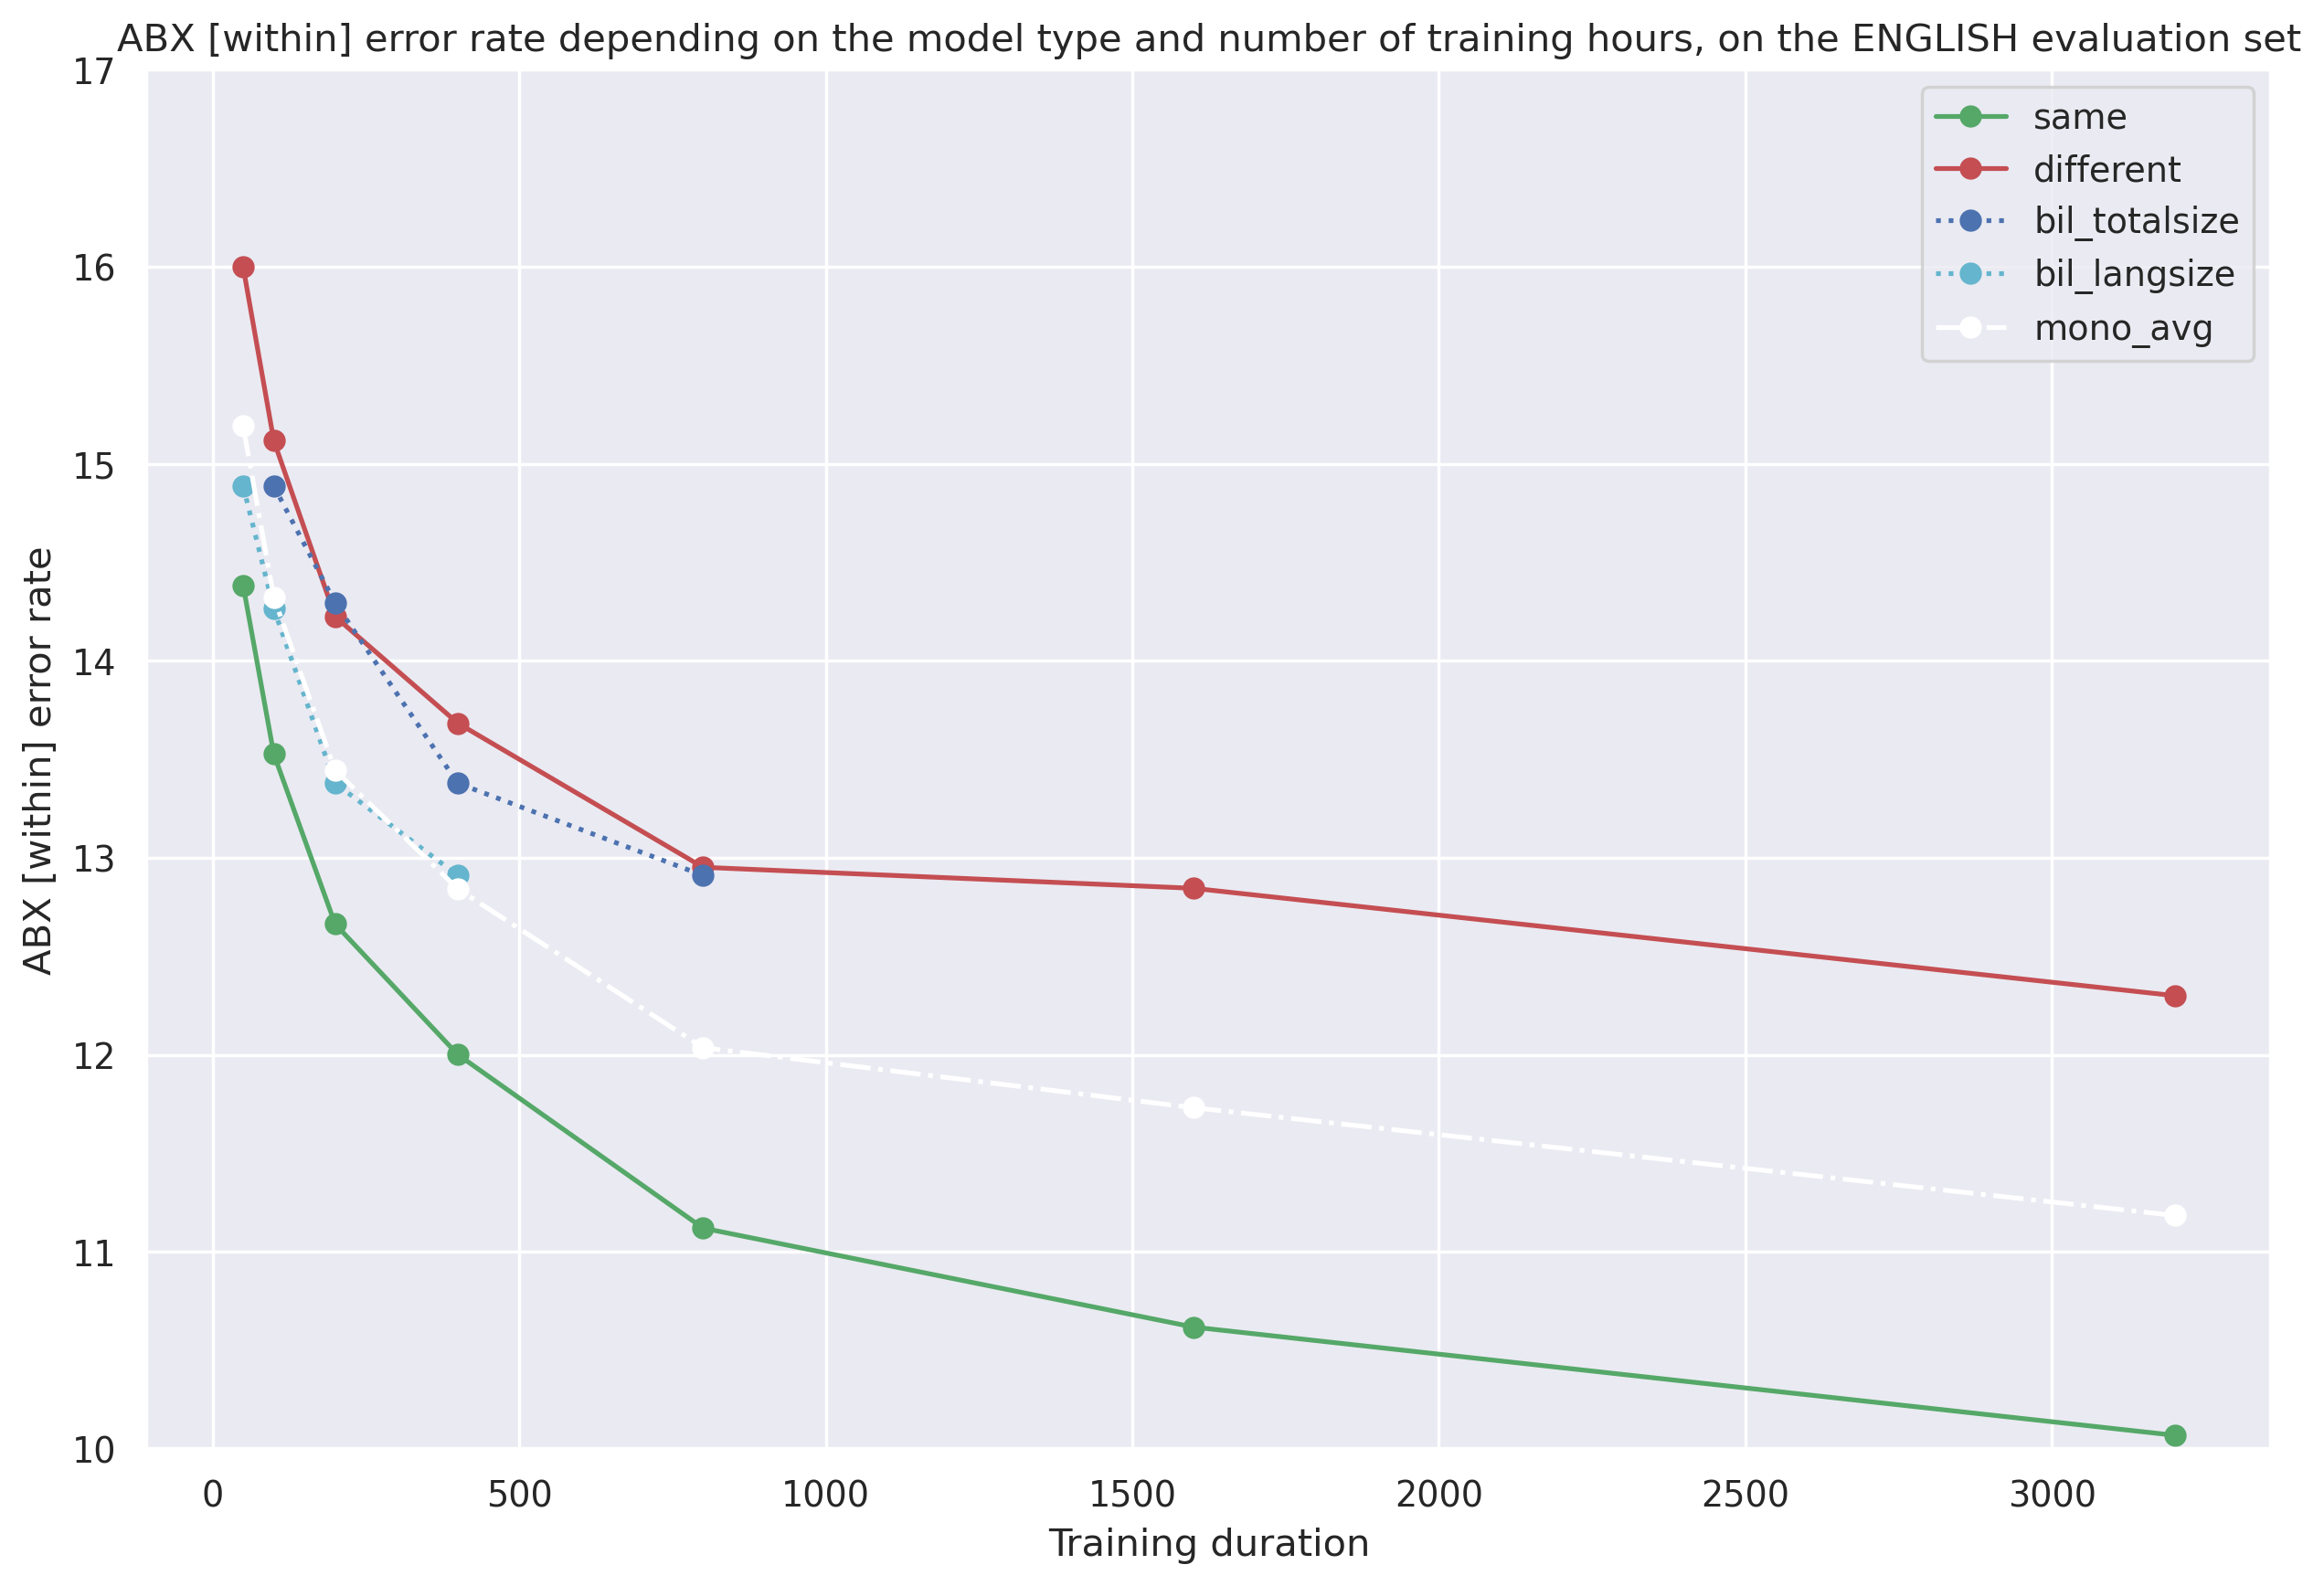

In [24]:
l="en"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
plt.title("ABX [within] error rate depending on the model type and number of training hours, on the ENGLISH evaluation set")
plt.xlabel("Training duration")
plt.ylabel("ABX [within] error rate")
plt.ylim([10,17])

### D4a. Developmental [within] ABX on the English test set - loglog scale

(10, 17)

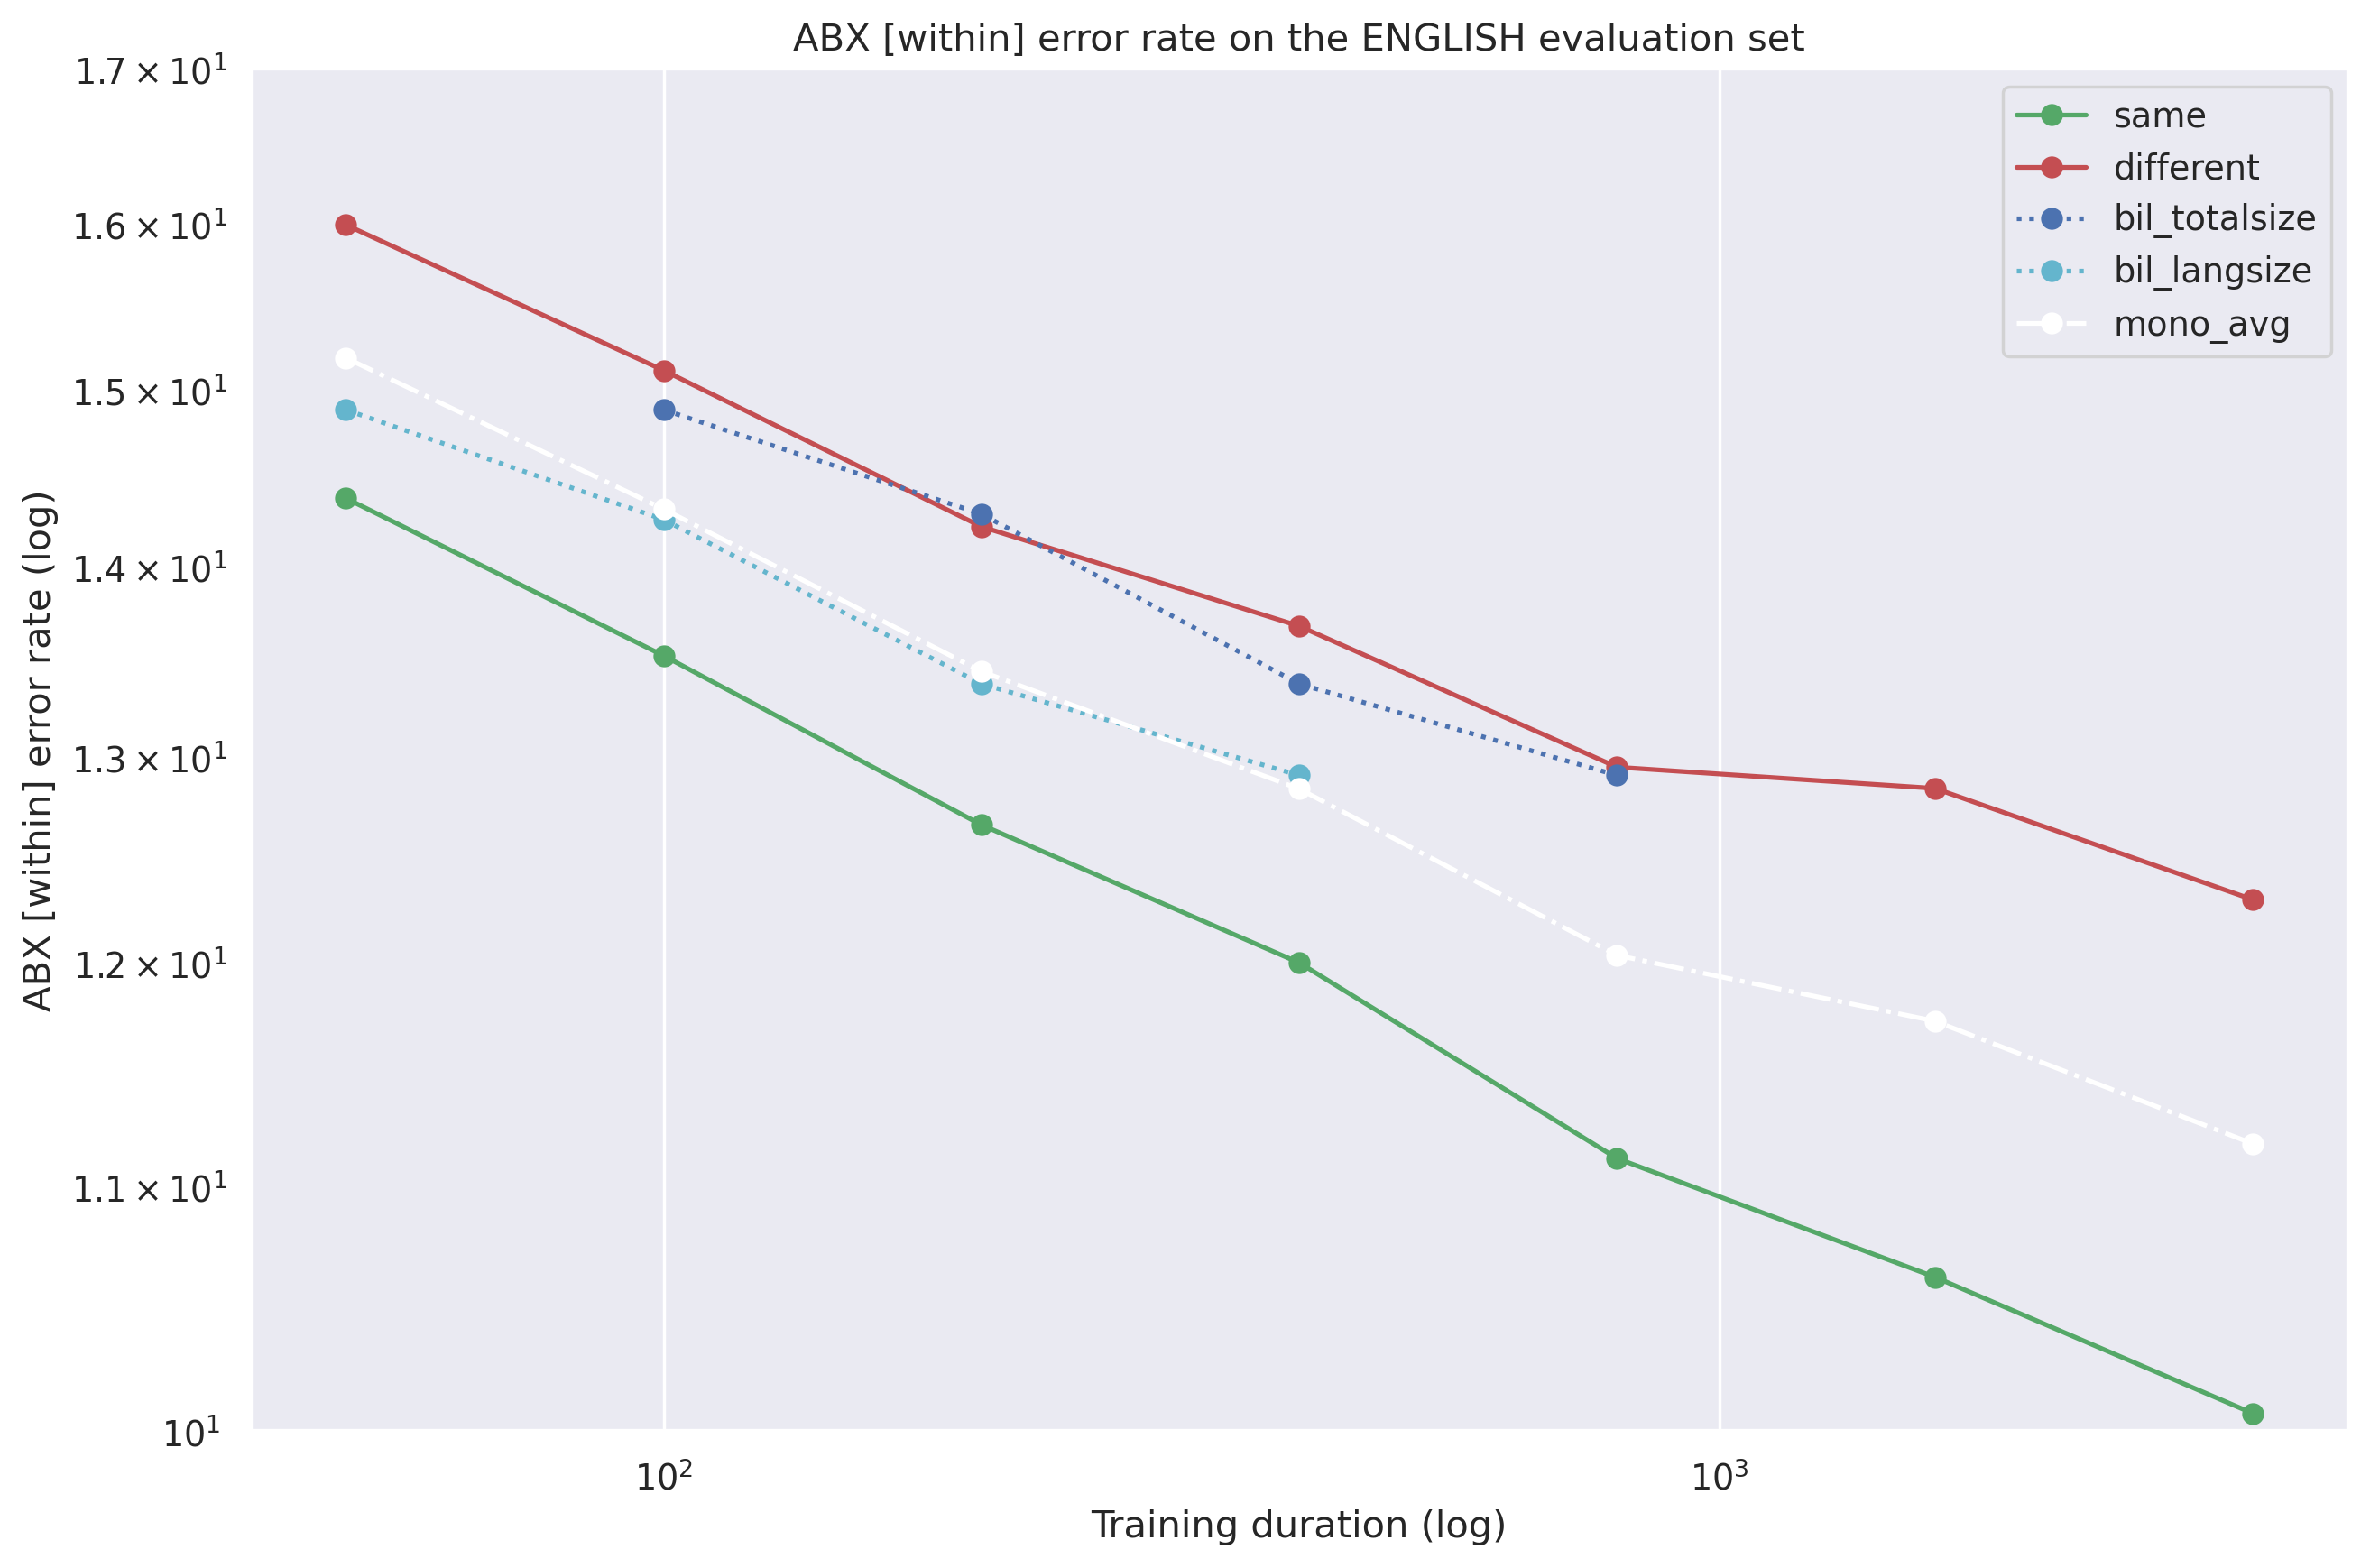

In [25]:
l="en"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
#df_tmp = df_tmp[['same', 'different']].plot(style = style_dict, loglog=True)

plt.title("ABX [within] error rate on the ENGLISH evaluation set")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate (log)")
plt.ylim([10,17])

### D5. Developmental [across] ABX  on the French test set (original and QuickFix) - LogLog

(12, 21)

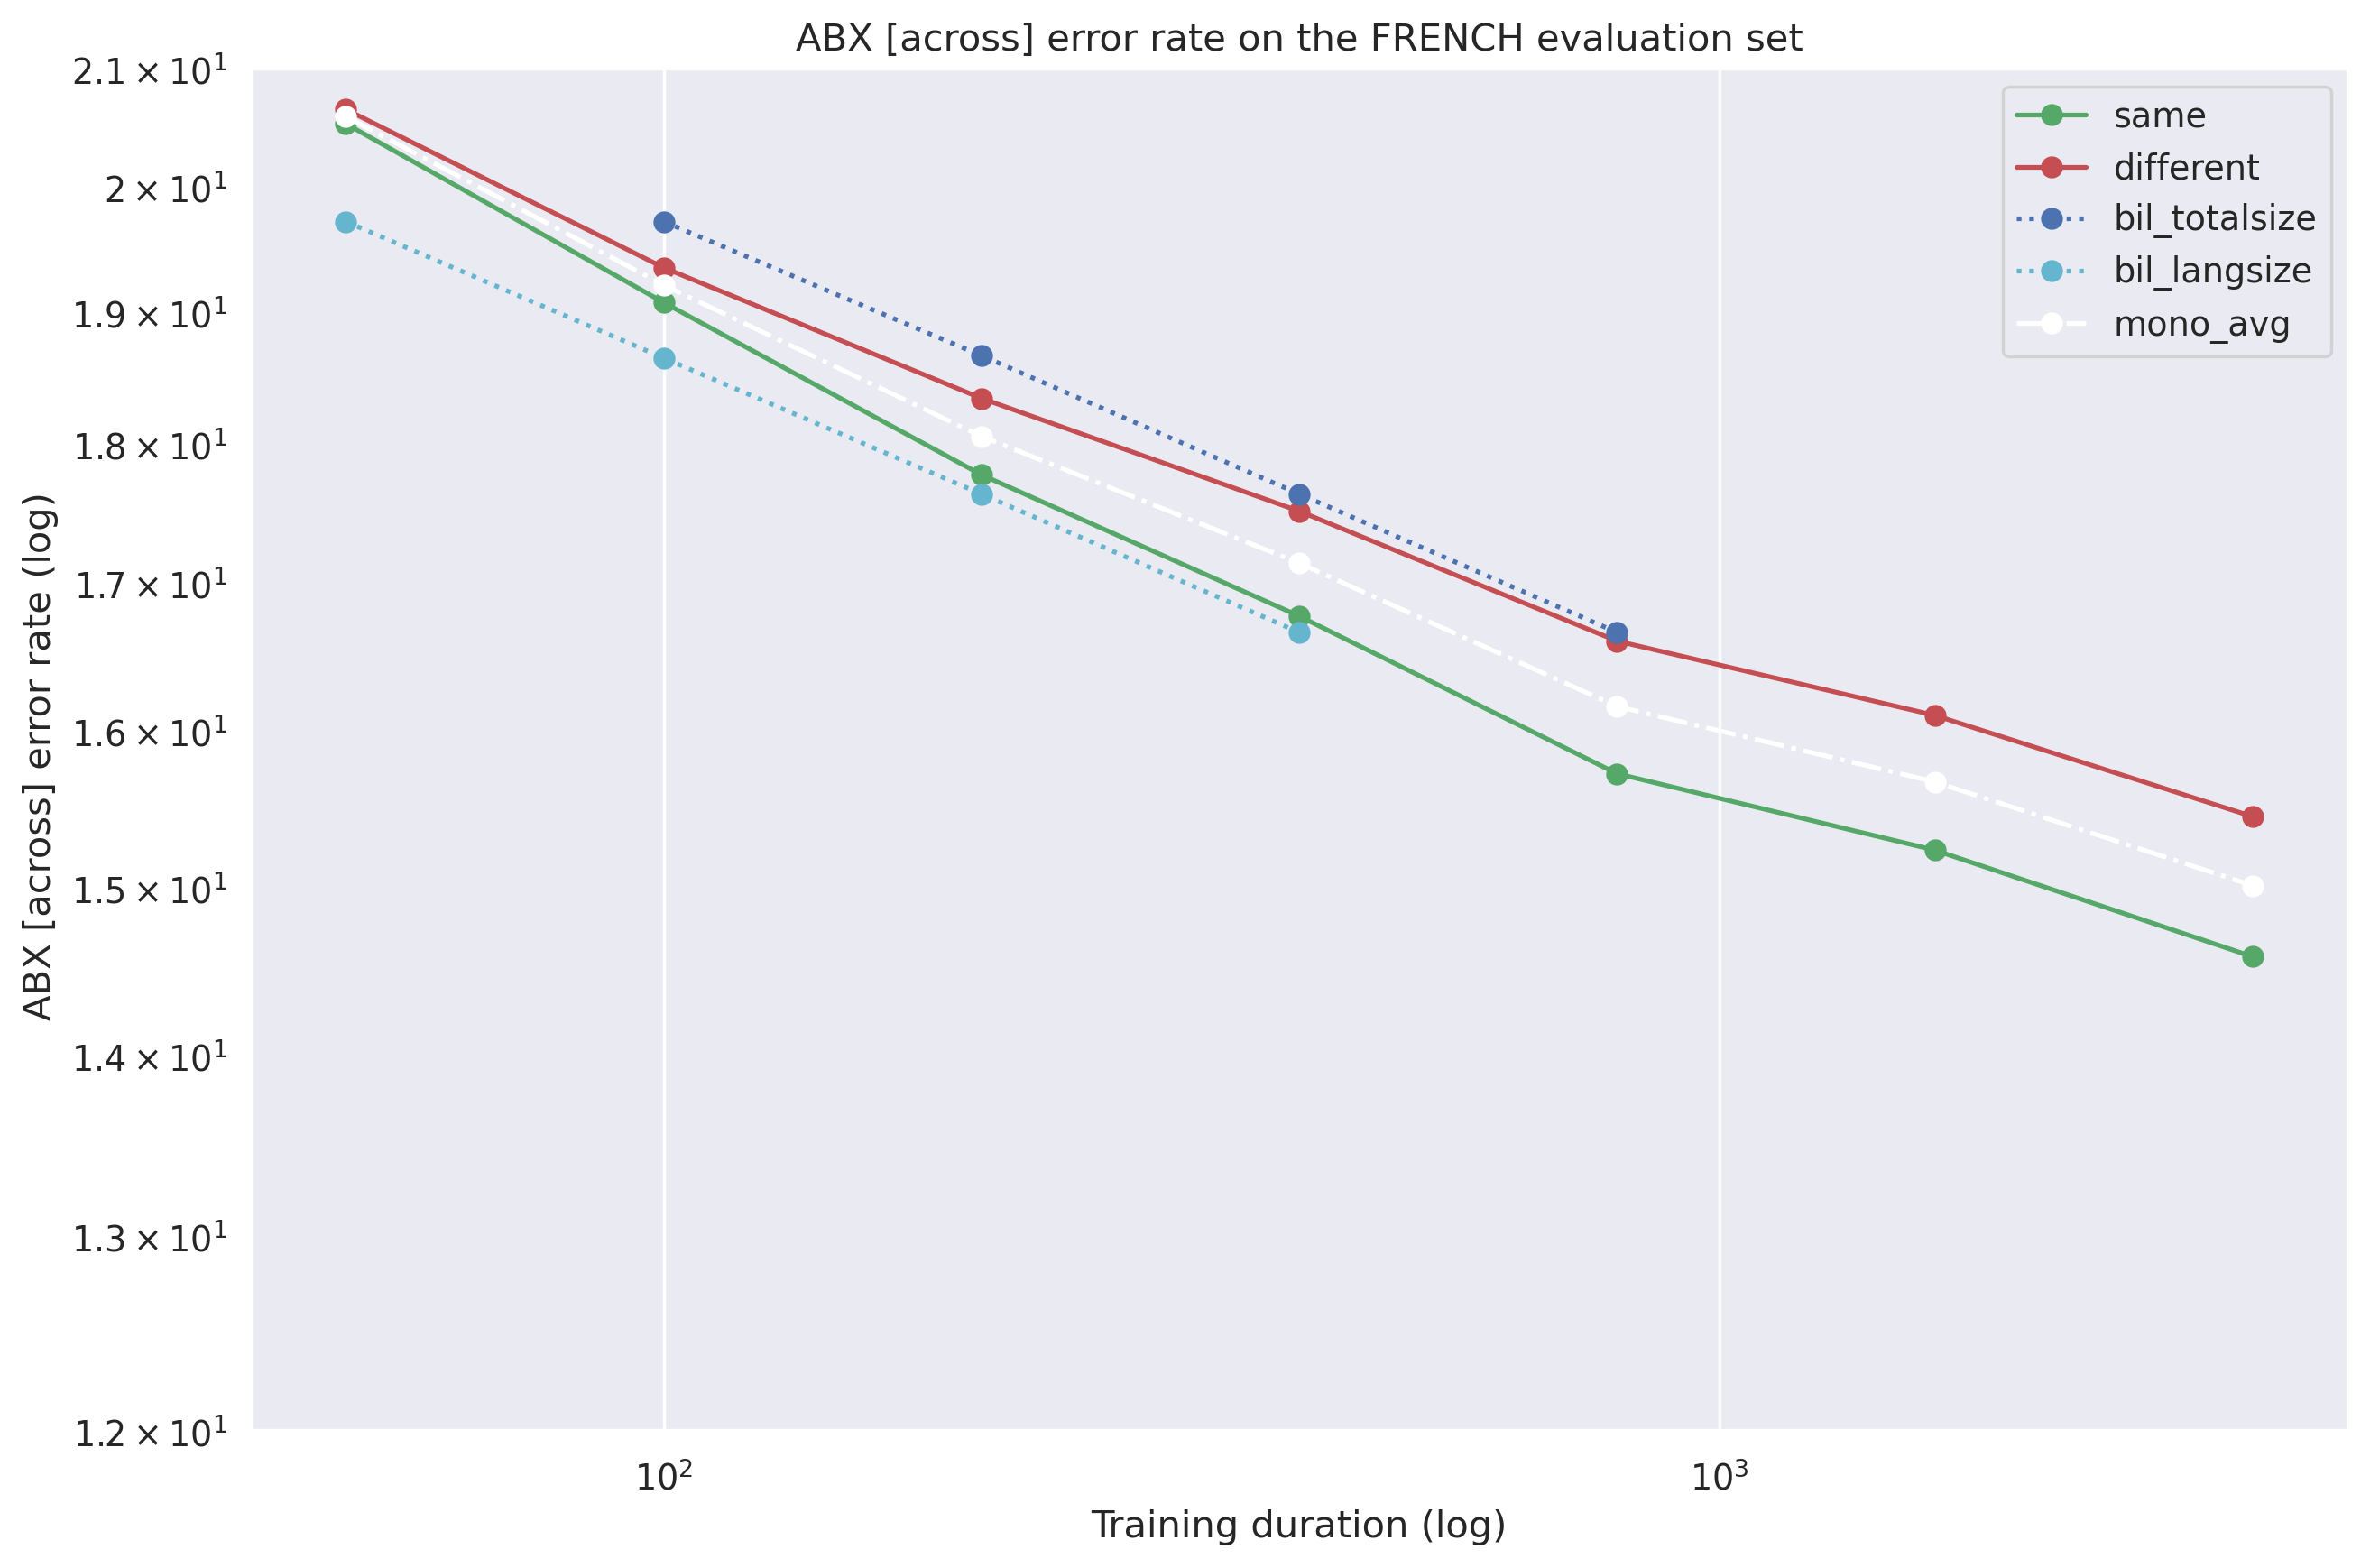

In [26]:
l="fr"
df_tmp = df_across[df_across["eval_lang"]==l].groupby(by="size").mean()
#df_tmp = df_tmp[['same', 'different']].plot(style = style_dict, loglog=True)
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
plt.title("ABX [across] error rate on the FRENCH evaluation set")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [across] error rate (log) ")
plt.ylim([12,21])


### D6. Developmental [across] ABX  on the English test set (original and QuickFix) - LogLog

(12, 21)

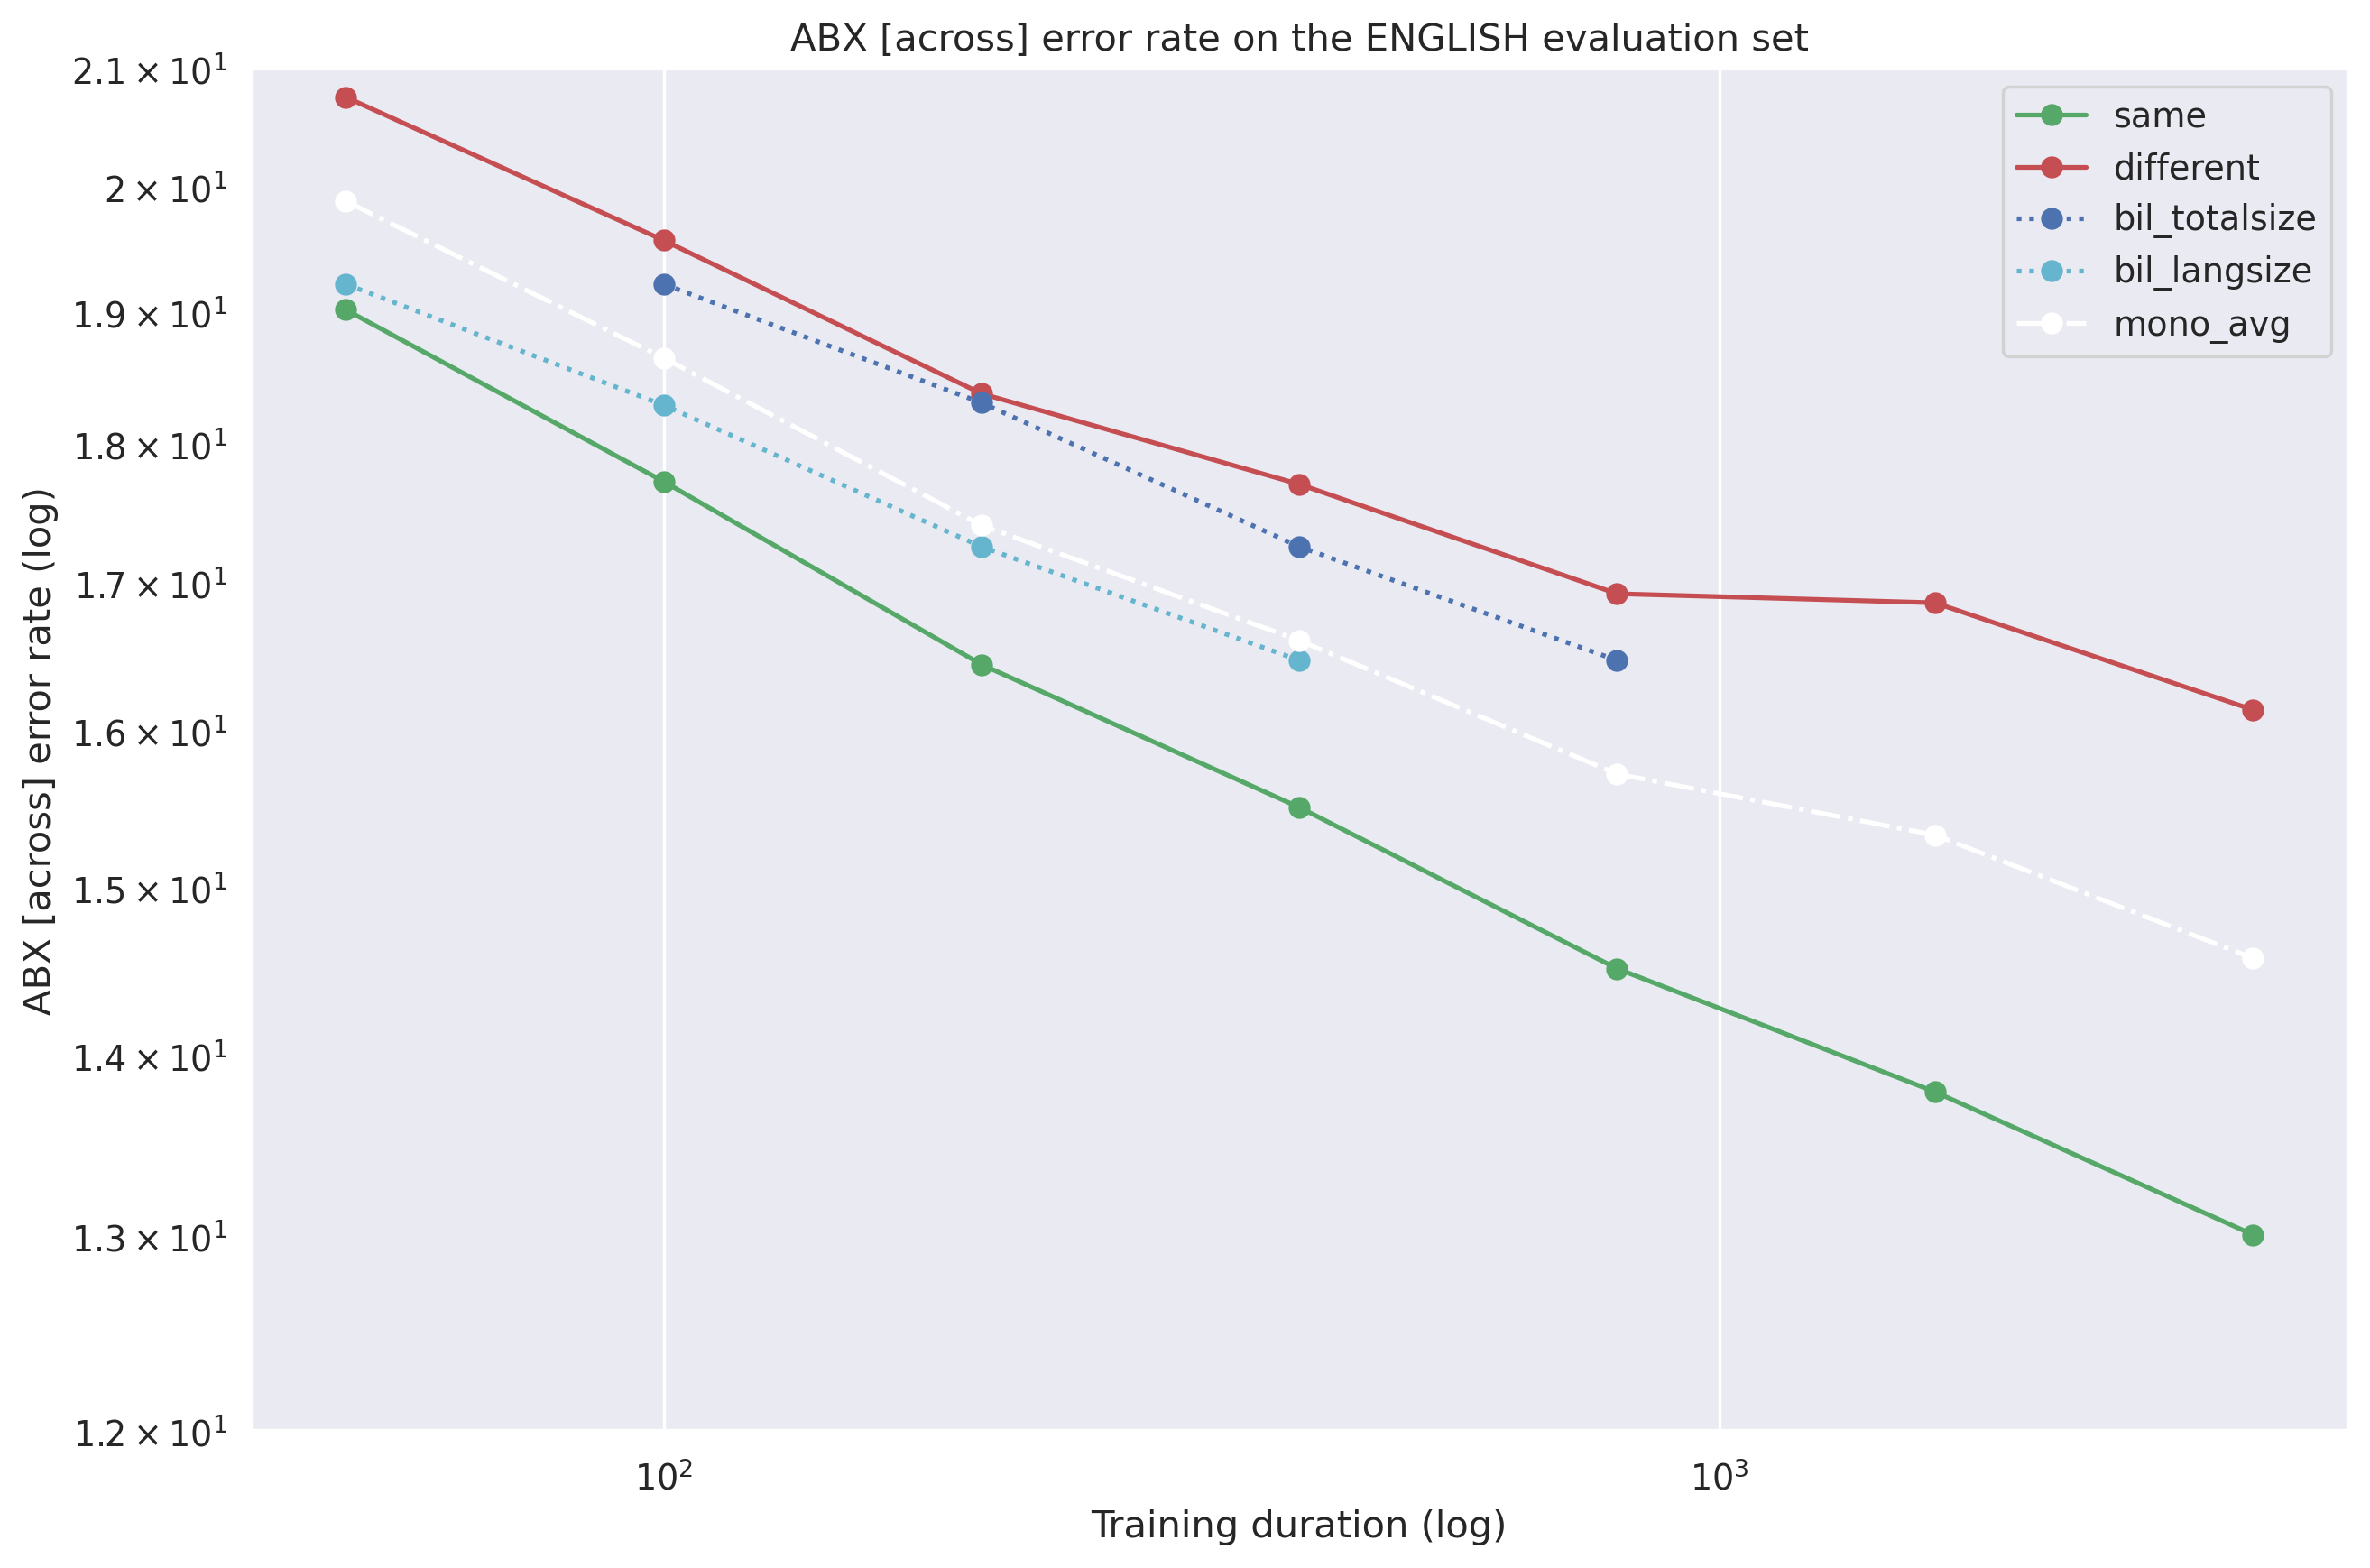

In [27]:
l="en"
df_tmp = df_across[df_across["eval_lang"]==l].groupby(by="size").mean()
#df_tmp = df_tmp[['same', 'different']].plot(style = style_dict, loglog=True)
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)

plt.title("ABX [across] error rate on the ENGLISH evaluation set")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [across] error rate (log)")
plt.ylim([12,21])

###  Calculating Relative Advantage per data doubling :
Eg There is a **x** improvement when we double the data

In [28]:
l="fr"
df = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df

en_model   fr_model  bil_totalsize_A  bil_totalsize_B       same  \
size                                                                      
50    15.103841  15.274519              NaN              NaN  15.274519   
100   14.289648  14.293849        14.750261        14.698934  14.293849   
200   13.601602  13.315064        14.046034        14.029719  13.315064   
400   13.043336  12.633563        13.368820        13.237951  12.633563   
800   12.327646  11.966870        12.600265        12.658065  11.966870   
1600  12.040206  11.559099              NaN              NaN  11.559099   
3200  11.552946  10.958823              NaN              NaN  10.958823   

      different  bil_langsize  bil_totalsize   mono_avg  
size                                                     
50    15.103841     14.724597            NaN  15.189180  
100   14.289648     14.038139      14.724597  14.291748  
200   13.601602     13.303385      14.062893  13.458333  
400   13.043336     12.629165      13.303385  12.838450  
800   12.327646           NaN      12.629165  12.147258  
1600  12.040206           NaN            NaN  11.799653  
3200  11.552946           NaN            NaN  11.255885

In [29]:
df = df_within.groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -5.564645178322768
different -4.316344876854399
bil_langsize -4.8080571332933095
bil_totalsize -4.807083349181014


In [30]:
df = df_across.groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -5.819738644581832
different -4.403302434004595
bil_langsize -5.248315291098184
bil_totalsize -5.248159219189405


In [31]:
l="fr"
df = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -5.3773216807802795
different -4.362611382217046
bil_langsize -4.988000974290062
bil_totalsize -4.987566726447804


In [32]:
l="en"
df = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -5.763320785821041
different -4.2712493683893795
bil_langsize -4.627897132383706
bil_totalsize -4.626292197092679


In [33]:
l="fr"
df = df_across[df_across["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -5.533165996339039
different -4.721144239397987
bil_langsize -5.4708497149043405
bil_totalsize -5.4708245257922


In [34]:
l="en"
df = df_across[df_across["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -6.132381078252557
different -4.089165783494153
bil_langsize -5.0204226280870365
bil_totalsize -5.0201304078212
